In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import math
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# pd.set_option('display.max_row', None)
# pd.set_option('display.max_columns', None)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

import matplotlib as mpl
#그래프의 한글을 더욱 선명하게 출력 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 시각화 기본 설정
plt.style.use('seaborn')
# plt.rcParams['font.family']='NanumBarunGothic'
sns.set(font_scale = 1.5)

import missingno as msno
import warnings
warnings.filterwarnings('ignore')


# 1. 데이터 불러오기

In [ ]:
url = 'https://raw.githubusercontent.com/BoHye0202/CS-Daily-Assignment/main/n1-Project/vgames2.csv'
df = pd.read_csv(url)
df

Unnamed: 0  ... Other_Sales
0               1  ...           0
1               2  ...        0.01
2               3  ...           0
3               4  ...           0
4               5  ...        0.04
...           ...  ...         ...
16593       16594  ...        0.01
16594       16595  ...           0
16595       16596  ...        0.13
16596       16597  ...        0.03
16597       16598  ...        0.01

[16598 rows x 10 columns]

## 1-1. Null Data Check

1. describe()로 확인하면 숫자형밖에 확인이 되지 않기 때문에 다른 방식으로 확인
2. null데이터의 갯수를 전체에 대한 평균으로 나타냈습니다.

### Null
#### 3가지 feature에 대해 nan값이 존재
- Year	     Percent of NaN value: 1.63%
- Genre   	 Percent of NaN value: 0.30%
- Publisher	 Percent of NaN value: 0.35%

#### 결과
- Year의 Nan값이 제일 많았고, Genre와 Publisher에도 Nan값이 있었다
- Year, Genre, Publisher를 제외한 다른 feature에는 Nan값이 없다

In [ ]:
# data type 및 null값 확인
df.info()
print('\n')

# null값을 percentage로 확인
for col in df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(msg)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


column: Unnamed: 0	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:   Platform	 Percent of NaN value: 0.00%
column:       Year	 Percent of NaN value: 1.63%
column:      Genre	 Percent of NaN value: 0.30%
column:  Publisher	 Percent of NaN value: 0.35%
column:   NA_Sales	 Percent of NaN 

Text(0.5, 1.0, 'Bar plot')

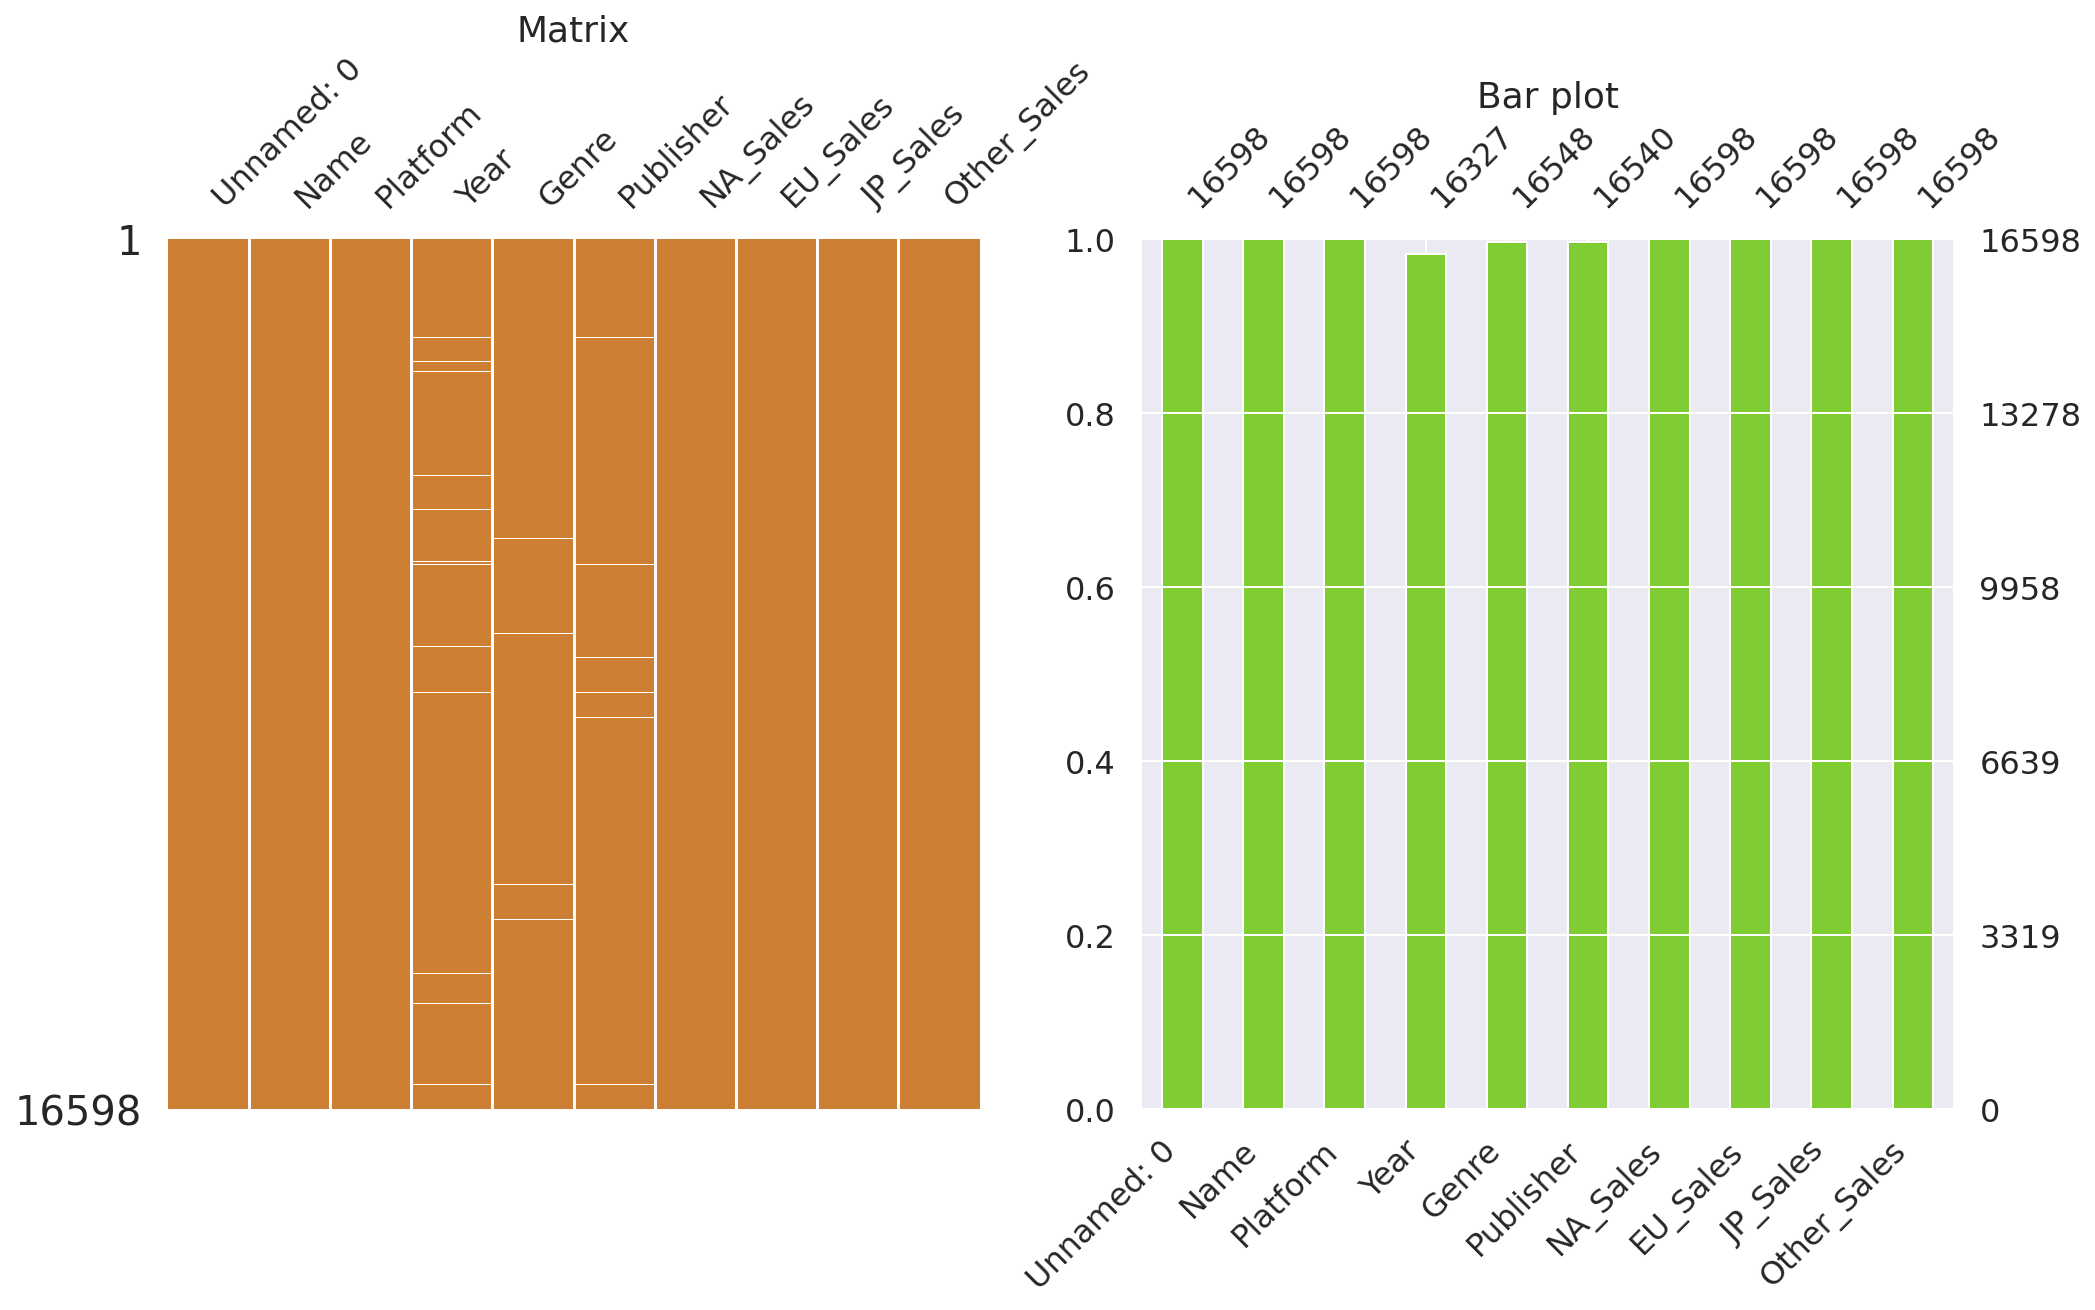

In [ ]:
# Null Data 시각화로 확인하기

f, ax = plt.subplots(1,2, figsize = (16,8))
msno.matrix(df=df.iloc[:,:], color=(0.8,0.5,0.2), ax=ax[0]);
ax[0].set_title('Matrix')

msno.bar(df=df.iloc[:,:], color=(0.5,0.8,0.2), ax=ax[1]);
ax[1].set_title('Bar plot')

## 1-2. Goal
### Step 1. EDA & Feature Engineering
#### Sales (Numerical Data)
- 나라별 매출액 Data Type 변환 및 처리
- 나라별 매출액을 총합한 'Total' 열 추가
- 나라별 매출액에 따른 시장 점유율 분석
- 나라별 매출액 평균 분석

#### Unnamed (Categorical Data)
- 의미없는 데이터로 간주하여 제거

#### Name (Categorical Data)
- index로 간주

#### Platform (Categorical Data)
- Null Data 없음
- Platform별 출시된 게임 개수 확인
- Platform별 출시된 게임 매출액 확인

#### Year  (Categorical Data)
- discrete한 categorical data
- Null Data 처리
- Outlier Data 처리
- 연도별 출시된 게임 개수 확인
- 연도별 출시된 게임 매출액 확인

#### Genre  (Categorical Data)
- Null Data 처리
- 장르별 출시된 게임 개수 확인
- 장르별 출시된 게임 매출액 확인

#### Publisher  (Categorical Data)
- Null Data 처리
- 게임회사별 출시된 게임 개수 확인
- 게임회사별 출시된 게임 매출액 확인

#### Data 최종정리
**Categorical Data**
- Name, Platform, Genre, Publisher, Year이 모두 동일한 중복되는 데이터가 있다면 나라별 매출액을 합치기 (중복제거)

### Step 2. Hypothesis
#### One-Sample T-Test
- [표본집단의 평균, 특정한 값] : 같을 것이다
- [북미 매출액의 평균, 전세계 매출액의 평균의 절반]
- [4개 장르의 매출액 평균, 전장르 매출액의 평균]

#### Two-Sample T-Test
- [표본집단 A, 표본집단 B] : 같을 것이다
- [Adventure 평균매출액, Racing 평균매출액]
- [DS 평균매출액, PS2 평균매출액]

#### One-Sample Chi-Test
- [표본집단의 분포,  예상] : 동일할 것이다
- [플랫폼별, 

#### Two-Sample Chi-Test
- [표본집단 A의 분포, 표본집단 B의 분포] : 연관이 있다
- [제작회사, 게임장르]

### Step 3. Analysis
### Step 4. PCA
### Step 5. K-means Clustering



# 2. EDA & Feature Engineering

In [ ]:
df.head()

Unnamed: 0  ... Other_Sales
0           1  ...           0
1           2  ...        0.01
2           3  ...           0
3           4  ...           0
4           5  ...        0.04

[5 rows x 10 columns]

## 2-1. [Target Label] Sales
### STEP 1
  - 현재 문자열 데이터이며, 서수형으로 변경
    - object type을 float형으로 변환

    **< Data Type >**
    - NA_Sales: object -> float
    - EU_Sales: object -> float
    - JP_Sales: object -> float
    - Other_Sales: object -> float

  - How To?
    1. 매출액이 소수점 둘째자리까지 적혀있고 값의 기준은 M이다
    2. 0K(M), 0M(M), 0(M)의 값을 처리해야 한다
    3. 위 두가지 사실을 바탕으로 0K, 0M의 값은 소수점 3째자리의 값을 가지는 값으로 판단하여 3000(K)과 3000000(K)으로 통일
      ex. 0k(M) = 0.005 k(M) = 5000(K), 0M(M) = 0.005 M(M) = 5000 (M) = 5000000(K)
    4. 위 두가지 사실을 바탕으로 0(M)값은 소수점 3째자리의 값을 가지는 값으로 판단하여 0.005 * K(K) = 5(K) 으로 통일하였다
    5. 매출액의 기준이 M에서 K로 바꿨으므로 0K, 0M, 0이 아닌 데이터에도 *K를 하였다

#### ※ 0K, 0M, 0의 값을 0.003K, 0.003M, 0.003으로 설정한 이유
-  매출액의 data type을 float으로 모두 변환 후,
  1.  0.01~0.1: 0.03의 값을 가졌다.
  2. 1~10 : 3
  3. 10~100: 33
  ```
  total = 0
  len = 0
  for i in df['EU']:
    if i<0.1 and i>=0.01:
      total+=i
      len+=1
  print(total/len) # 0.035
  ```

### STEP 2
  - NA_Sales	/ EU_Sales / JP_Sales /	Other_Sales
  - 매출액 데이터는 4가지가 있으며, 4개의 합으로 Total Sales를 생성




### (1). Data Type 변환

In [ ]:
def Unit(money):
  if '0K' == money:
    return float(money.replace('0K','3000'))
  elif '0M' == money:
    return float(money.replace('0M','3000000'))
  elif 'K' in money:
    return float(float(money.replace('K',''))*1000000)
  elif 'M' in money:
    return float(float(money.replace('M',''))*1000000000)
  elif '0' == money:
    return float(money.replace('0','3'))
  else:
    return float(money)*1000
    
df['NA'] = df['NA_Sales'].apply(Unit)
df['EU'] = df['EU_Sales'].apply(Unit)
df['JP'] = df['JP_Sales'].apply(Unit)
df['Other'] = df['Other_Sales'].apply(Unit)
df

Unnamed: 0                                            Name  ...     JP  Other
0               1                    Candace Kane's Candy Factory  ...   3.00   3.00
1               2                                  The Munchables  ...   3.00  10.00
2               3  Otome wa Oanesama Boku ni Koi Shiteru Portable  ...  20.00   3.00
3               4                Deal or No Deal: Special Edition  ...   3.00   3.00
4               5       Ben 10 Ultimate Alien: Cosmic Destruction  ...   3.00  40.00
...           ...                                             ...  ...    ...    ...
16593       16594                         Ice Age 2: The Meltdown  ...   3.00  10.00
16594       16595                     Rainbow Islands: Revolution  ...   3.00   3.00
16595       16596                                        NBA 2K16  ...  30.00 130.00
16596       16597                     Toukiden: The Age of Demons  ... 250.00  30.00
16597       16598                        The King of Fighters '95  ... 160.00  10.00

[16598 rows x 14 columns]

###  (2) 각 지역을 모두 합친 새로운 'Total' Feature 만들기

In [ ]:
df['Total'] = df['EU']+df['JP']+df['NA']+df['Other']
df.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis =1, inplace=True)
df.head()

Unnamed: 0                                            Name  ... Other  Total
0           1                    Candace Kane's Candy Factory  ...  3.00  49.00
1           2                                  The Munchables  ... 10.00 186.00
2           3  Otome wa Oanesama Boku ni Koi Shiteru Portable  ...  3.00  29.00
3           4                Deal or No Deal: Special Edition  ...  3.00  49.00
4           5       Ben 10 Ultimate Alien: Cosmic Destruction  ... 40.00 253.00

[5 rows x 11 columns]

## 2-2. Unnamed
- 매출액에 영향을 미치지 않는 feature
- 필요없는 데이터 feature이기 때문에 제거


In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
df.head()

Name Platform  ...  Other  Total
0                    Candace Kane's Candy Factory       DS  ...   3.00  49.00
1                                  The Munchables      Wii  ...  10.00 186.00
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  ...   3.00  29.00
3                Deal or No Deal: Special Edition       DS  ...   3.00  49.00
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  ...  40.00 253.00

[5 rows x 10 columns]

## 2-3. Name
- 매출액에 영향을 미치지 않을 것 같지만, 결과를 확인하는 데 도움이 되기 때문에 남겨둠 (데이터 요소별로 구분 가능)

In [ ]:
# 게임 명칭이 겹치는 게임들이 있다
# 명칭이 겹치는 게임의 다른 요소들(플랫폼, 출시연도 등)이 모두 일치할지 아닐지는 모른다 -> null값을 featrue별로 처리한 후 확인하여 정리
df['Name'].value_counts()

Need for Speed: Most Wanted                                          12
FIFA 14                                                               9
LEGO Marvel Super Heroes                                              9
Ratatouille                                                           9
Madden NFL 07                                                         9
                                                                     ..
Jonny Moseley Mad Trix                                                1
Far Cry Vengeance                                                     1
Simple DS Series Vol. 42: The Haioku Byoutou                          1
Winning Post 3                                                        1
Gekiatsu!! Pachi Game Tamashi Max: Evangelion 7 x Seimei no Kodou     1
Name: Name, Length: 11493, dtype: int64

In [ ]:
df.sort_values(by=['Name', 'Year'])

Name Platform  ...  Other   Total
12910                              '98 Koshien       PS  ...  30.00  400.00
15930               .hack//G.U. Vol.1//Rebirth      PS2  ...   3.00  179.00
7132              .hack//G.U. Vol.2//Reminisce      PS2  ...  30.00  233.00
10647  .hack//G.U. Vol.2//Reminisce (jp sales)      PS2  ...   3.00  169.00
13148            .hack//G.U. Vol.3//Redemption      PS2  ...   3.00  179.00
...                                        ...      ...  ...    ...     ...
13964                             uDraw Studio      Wii  ... 200.00 2453.00
3062              uDraw Studio: Instant Artist     X360  ...   3.00   26.00
15021             uDraw Studio: Instant Artist      Wii  ...  20.00  193.00
3562                wwe Smackdown vs. Raw 2006      PS2  ... 410.00 3003.00
215               ¡Shin Chan Flipa en colores!       DS  ...   3.00  149.00

[16598 rows x 10 columns]

##	2-4. Platform
- 문자열 데이터이며, 카테고리 데이터이다
- 플랫폼 카테고리별 매출액 확인이 가능
- 플랫폼 카테고리 -> 서수형 -> one-hot encoding

In [ ]:
platform = list(df['Platform'].unique())
print('Platform의 종류: ',platform)
print('Platform의 개수: ', len(platform))

G_plat_cnt= df['Platform'].value_counts()
print('각 Platform별로 지원되는 게임의 수: ')
G_plat_cnt

Platform의 종류:  ['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB', 'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64', 'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']
Platform의 개수:  31
각 Platform별로 지원되는 게임의 수: 


DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

##	2-5. Year
- 서수형 데이터이며, 카테고리 데이터이다
- Nan값이 있다
- Outlier


### (1) Nan과 Outlier 처리
- Nan
  
  Year이 Nan일 때, 해당 플랫폼의 연도의 최빈값을 Year로 지정
  1. Platform에는 nan값이 없다
  2. Year-Platform의 관계를 보면, 해당 platform의 게임들이 나오는 시기가 몰려있다
  **즉, 해당 플래폼이 인기있는 시기(연도들)이 있다. 따라서 그 연도들 중 가장 게임이 많이 출시된 해를 선택**

- Outlier
  1. 데이터 처리 전, 네자리 수의 연도를 갖는 값에서 최솟값은 1980년
  2. 데이터 처리 전, 네자리 수의 연도를 갖는 값에서 최댓값은 2020년
  3. 따라서 **연도 Feature의 범위가 1980~2020년이라고 가정** 하였다
  4. [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0] + 2000
    - +2000을 해줌으로써 가정한 범위안에 들어오도록 하였다
  5. [86.0, 94.0, 95.0, 96.0, 97.0, 98.0] + 1900
    - +1900을 해줌으로써 가정한 범위안에 들어오도록 하였다

In [ ]:
# outlier -> 1980~2020년 범위 안으로 수정

year_list = list(df['Year'].unique())
print('Year의 리스트: ', sorted(year_list))

def Year(year):
  if math.isnan(year)==True:
    pass
  else:
    if year<50:
      year+=2000
      return int(year)
    elif year>50 and year<=100:
      year+=1900
      return int(year)
    else:
      return int(year)

df['Year'] = df['Year'].apply(Year)
print('통일시킨 Year의 리스트: ', sorted(list(df['Year'].unique())))

Year의 리스트:  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 86.0, 94.0, 95.0, 96.0, 97.0, 98.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, nan, 2016.0, 2017.0, 2020.0]
통일시킨 Year의 리스트:  [1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, nan, 2016.0, 2017.0, 2020.0]


In [ ]:
pd.crosstab(df['Year'], df['Platform'], margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
y_p = pd.crosstab(df['Year'], df['Platform'], margins=True)
y_p = y_p[:-1][:]
# y_p = y_p.reset_index()

In [ ]:
# Nan값 채우기
# Year이 Nan일 때, 해당 플랫폼의 연도의 최빈값을 Year로 지정

def Year_nan(K):
  a,b = K['Year'], K['Platform']
  if math.isnan(a)==True:
    res = y_p[b][:-1].max()
    res = (y_p[y_p[b]==res])
    res = res.index.values[0]
    return res
  else:
    return a

df['Year'] = df.apply(Year_nan, axis=1)
df

Name Platform  ...  Other  Total
0                        Candace Kane's Candy Factory       DS  ...   3.00  49.00
1                                      The Munchables      Wii  ...  10.00 186.00
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  ...   3.00  29.00
3                    Deal or No Deal: Special Edition       DS  ...   3.00  49.00
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  ...  40.00 253.00
...                                               ...      ...  ...    ...    ...
16593                         Ice Age 2: The Meltdown       GC  ...  10.00 203.00
16594                     Rainbow Islands: Revolution      PSP  ...   3.00  19.00
16595                                        NBA 2K16      PS3  ... 130.00 790.00
16596                     Toukiden: The Age of Demons      PSV  ...  30.00 380.00
16597                        The King of Fighters '95       PS  ...  10.00 176.00

[16598 rows x 10 columns]

In [ ]:
print('원본데이터(df)의 year에서 nan값을 가지는 데이터의 수: ', df['Year'].isnull().sum())
df['Year'] = df['Year'].astype('int')

원본데이터(df)의 year에서 nan값을 가지는 데이터의 수:  0


##	2-6. Genre
- 문자열 데이터이며, 카테고리 데이터이다
- 장르별 매출액 확인이 가능
- 장르별 카테고리 -> 서수형
- Nan값이 있다: 가장 많은 장르카테고리로 채우기 (50개)
  1.  ['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter', nan]
  2. Nan을 모두 액션으로 해도 매출액에 크게 영향을 주지 않는다는 것을 확인

### (1) Nan 처리

In [ ]:
# Nan값 채우기: Action
print('Genre의 nan값의 개수: ', df['Genre'].isnull().sum())
check = df[df['Genre']=='NaN']
check

df['Genre'].fillna('Action', inplace=True)
df.info()
df

Genre의 nan값의 개수:  50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       16598 non-null  object 
 1   Platform   16598 non-null  object 
 2   Year       16598 non-null  int64  
 3   Genre      16598 non-null  object 
 4   Publisher  16540 non-null  object 
 5   NA         16598 non-null  float64
 6   EU         16598 non-null  float64
 7   JP         16598 non-null  float64
 8   Other      16598 non-null  float64
 9   Total      16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


Name Platform  ...  Other  Total
0                        Candace Kane's Candy Factory       DS  ...   3.00  49.00
1                                      The Munchables      Wii  ...  10.00 186.00
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  ...   3.00  29.00
3                    Deal or No Deal: Special Edition       DS  ...   3.00  49.00
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  ...  40.00 253.00
...                                               ...      ...  ...    ...    ...
16593                         Ice Age 2: The Meltdown       GC  ...  10.00 203.00
16594                     Rainbow Islands: Revolution      PSP  ...   3.00  19.00
16595                                        NBA 2K16      PS3  ... 130.00 790.00
16596                     Toukiden: The Age of Demons      PSV  ...  30.00 380.00
16597                        The King of Fighters '95       PS  ...  10.00 176.00

[16598 rows x 10 columns]

##	2-7. Publisher
- 문자열 데이터이며 겹치는 카테고리가 있는지 확인
- Publisher가 매출액에 영향을 미치는지 확인
- Nan값이 있다

### (1) Nan 처리

In [ ]:
# Nan값 채우기
print('Publisher의 nan값의 개수: ', df['Publisher'].isnull().sum())

# Nan 채우기 - 가장 많이 Publisher한 'Electronic Arts'
df['Publisher'].fillna('Electronic Arts', inplace=True)
df.info()
df

Publisher의 nan값의 개수:  58
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       16598 non-null  object 
 1   Platform   16598 non-null  object 
 2   Year       16598 non-null  int64  
 3   Genre      16598 non-null  object 
 4   Publisher  16598 non-null  object 
 5   NA         16598 non-null  float64
 6   EU         16598 non-null  float64
 7   JP         16598 non-null  float64
 8   Other      16598 non-null  float64
 9   Total      16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


Name Platform  ...  Other  Total
0                        Candace Kane's Candy Factory       DS  ...   3.00  49.00
1                                      The Munchables      Wii  ...  10.00 186.00
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  ...   3.00  29.00
3                    Deal or No Deal: Special Edition       DS  ...   3.00  49.00
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  ...  40.00 253.00
...                                               ...      ...  ...    ...    ...
16593                         Ice Age 2: The Meltdown       GC  ...  10.00 203.00
16594                     Rainbow Islands: Revolution      PSP  ...   3.00  19.00
16595                                        NBA 2K16      PS3  ... 130.00 790.00
16596                     Toukiden: The Age of Demons      PSV  ...  30.00 380.00
16597                        The King of Fighters '95       PS  ...  10.00 176.00

[16598 rows x 10 columns]

## 최종정리

In [ ]:
du = df[df[['Name','Year','Platform','Genre','Publisher']].duplicated()] # 중복값 출력
print(du.shape)
du

(2, 10)


Name Platform  Year  ...    JP Other  Total
8717                Madden NFL 13      PS3  2012  ...  3.00  3.00  19.00
9184  Wii de Asobu: Metroid Prime      Wii  2009  ... 20.00  3.00  29.00

[2 rows x 10 columns]

In [ ]:
print(df.shape)
name = df.groupby(['Name','Year','Platform','Genre','Publisher']).sum()
name = name.sort_values(by=['Name'])
name = name.reset_index()
print(name.shape) # (16276, )
df = name

(16598, 10)
(16596, 10)


1. 총 16598개의 데이터를 가지고 있었다
2. 그 중 카테고리 데이터(Name, Year, Platform, Genre, Publisher)로 묶어서 결과를 보니 16596개의 데이터를 가지고 있었다
  - 매출액 데이터 NA, EU, JP, Other, Total은 카테고리 데이터가 모두 일치하면 합쳐서 하나로 정리된다

즉, 16598개의 데이터 중에 2(16598-16596)개의 데이터는 Name, year, Platform, Genre가 모두 같다는 의미이다 (중복되는 데이터 처리)

In [ ]:
df.describe()

Year            NA  ...        Other         Total
count 16596.00      16596.00  ...     16596.00      16596.00
mean   2006.39    4906266.75  ...    460590.47    8685910.02
std       5.86  128044998.16  ...  10149376.25  145835592.24
min    1980.00          3.00  ...         3.00         12.00
25%    2003.00          3.00  ...         3.00         69.00
50%    2007.00         80.00  ...        10.00        193.00
75%    2010.00        250.00  ...        40.00        573.00
max    2020.00 9630000000.00  ... 590000000.00 9630006750.00

[8 rows x 6 columns]

In [ ]:
df

Name  Year  ...  Other   Total
0                                  '98 Koshien  1998  ...  30.00  400.00
1                   .hack//G.U. Vol.1//Rebirth  2006  ...   3.00  179.00
2                 .hack//G.U. Vol.2//Reminisce  2006  ...  30.00  233.00
3      .hack//G.U. Vol.2//Reminisce (jp sales)  2006  ...   3.00  169.00
4                .hack//G.U. Vol.3//Redemption  2007  ...   3.00  179.00
...                                        ...   ...  ...    ...     ...
16591                             uDraw Studio  2010  ... 200.00 2453.00
16592             uDraw Studio: Instant Artist  2011  ...  20.00  193.00
16593             uDraw Studio: Instant Artist  2011  ...   3.00   26.00
16594               wwe Smackdown vs. Raw 2006  2002  ... 410.00 3003.00
16595             ¡Shin Chan Flipa en colores!  2007  ...   3.00  149.00

[16596 rows x 10 columns]

### 문자열과 숫자값 카테고리 나누기

In [ ]:
# 카테고리로 나누어지는 문자열과 연속값을 나타내는 숫자값 나눠놓기
# Function to find categorical and non-categorical features

def cat_finder(pg):
    string = []
    num = []
    cols = list(pg.columns)
    for col in cols:
        t = pg[col].dtype #returns the type of the feature
        if (t=='O'):
            string.append(col)
        else :
            num.append(col)
      
    return (string, num)

# Using the function above
string, num = cat_finder(df)
print("\nCategorical Features:\n", string)
print("\nContinuous Features:\n", num)


Categorical Features:
 ['Name', 'Platform', 'Genre', 'Publisher']

Continuous Features:
 ['Year', 'NA', 'EU', 'JP', 'Other', 'Total']


#### Continuous Data

In [ ]:
df_con = df[['NA', 'EU', 'JP', 'Other', 'Total']]
df_con

NA      EU     JP  Other   Total
0      150.00  100.00 120.00  30.00  400.00
1        3.00    3.00 170.00   3.00  179.00
2      110.00   90.00   3.00  30.00  233.00
3        3.00    3.00 160.00   3.00  169.00
4        3.00    3.00 170.00   3.00  179.00
...       ...     ...    ...    ...     ...
16591 1670.00  580.00   3.00 200.00 2453.00
16592   80.00   90.00   3.00  20.00  193.00
16593   10.00   10.00   3.00   3.00   26.00
16594 1570.00 1020.00   3.00 410.00 3003.00
16595    3.00    3.00 140.00   3.00  149.00

[16596 rows x 5 columns]

#### Category Data

In [ ]:
df_ca = df[['Name', 'Platform', 'Genre', 'Publisher', 'Year']]
df_ca

Name  ...  Year
0                                  '98 Koshien  ...  1998
1                   .hack//G.U. Vol.1//Rebirth  ...  2006
2                 .hack//G.U. Vol.2//Reminisce  ...  2006
3      .hack//G.U. Vol.2//Reminisce (jp sales)  ...  2006
4                .hack//G.U. Vol.3//Redemption  ...  2007
...                                        ...  ...   ...
16591                             uDraw Studio  ...  2010
16592             uDraw Studio: Instant Artist  ...  2011
16593             uDraw Studio: Instant Artist  ...  2011
16594               wwe Smackdown vs. Raw 2006  ...  2002
16595             ¡Shin Chan Flipa en colores!  ...  2007

[16596 rows x 5 columns]

# 3. Hypothesis
### Categorical Features:
 ['Name', 'Platform', 'Genre', 'Publisher', ' Year']

### Continuous Features:
 ['NA', 'EU', 'JP', 'Other', 'Total']

In [ ]:
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import random
from itertools import combinations

## 3-1. One-Sample T-Test
### [표본집단의 평균, 특정한 값]

1. 나라별 매출액 평균 == 전세계 매출액 평균의 절반 !? 
- 표본집단: 북미의 매출 평균
- 특정한 값: 전세계 매출액 평균의 절반

2. 장르별 매출액 평균 == 전장르 매출액의 평균!?
- 표본집단: 전세계 Action장르 매출액의 평균
- 특정한 값: 전세계 전장르 매출액의 평균

#### 북미 매출액 = 전세계 매출액의 절반
 북미는 땅이 넓으니까 전세계 매출액의 평균의 절반과 비슷할 거라고 생각되어 다음과 같이 가정하였다.

A = NA / EU / JP / Other 
- 귀무가설: A나라에서 팔린 모든 게임의 매출액의 평균은 전세계 매출액 평균의 절반일 것이다
- 대립가설: A나라에서 팔린 모든 게임의 매출액의 평균은 전세계 매출액 평균의 절반이 아닐 것이다


In [ ]:
df_c = df[['NA','EU','JP','Other','Total']]
df_c

NA      EU     JP  Other   Total
0      150.00  100.00 120.00  30.00  400.00
1        3.00    3.00 170.00   3.00  179.00
2      110.00   90.00   3.00  30.00  233.00
3        3.00    3.00 160.00   3.00  169.00
4        3.00    3.00 170.00   3.00  179.00
...       ...     ...    ...    ...     ...
16591 1670.00  580.00   3.00 200.00 2453.00
16592   80.00   90.00   3.00  20.00  193.00
16593   10.00   10.00   3.00   3.00   26.00
16594 1570.00 1020.00   3.00 410.00 3003.00
16595    3.00    3.00 140.00   3.00  149.00

[16596 rows x 5 columns]

In [ ]:
st = (df_c['Total'].mean())/2
print('[특정한 값] 전세계 매출액의 평균은 %.2f이다' %st)
l = ['NA','EU','JP','Other']
print('국가별 내가 정한 매출액 평균액(%.2f)에 대한 가설검정 시행\n' %st)
for i in l:
  t,p = stats.ttest_1samp(df_c[i], st)
  print('\n-------------------------------------------------------------------------')
  print('%s 국가의 매출액 평균과 전세계 매출액 평균의 절반값에 대한 가설검정' %i)
  print('%s 국가의 t-test값: %.3f' %(i,t))
  print('%s 국가의 p-value값: %.3f' %(i,p))
  if p<=0.05:
    print('p-value값이 %.3f이므로 귀무가설 기각, 대안가설 채택' %p)
  elif p>=0.1:
    print('p-value값이 %.3f이므로 귀무가설 채택, 대안가설 기각' %p)
  else:
    print('p-value값이 %.3f이므로 애매하다' %p)
  print('-------------------------------------------------------------------------\n')
print('\n')

[특정한 값] 전세계 매출액의 평균은 4342955.01이다
국가별 내가 정한 매출액 평균액(4342955.01)에 대한 가설검정 시행


-------------------------------------------------------------------------
NA 국가의 매출액 평균과 전세계 매출액 평균의 절반값에 대한 가설검정
NA 국가의 t-test값: 0.567
NA 국가의 p-value값: 0.571
p-value값이 0.571이므로 귀무가설 채택, 대안가설 기각
-------------------------------------------------------------------------


-------------------------------------------------------------------------
EU 국가의 매출액 평균과 전세계 매출액 평균의 절반값에 대한 가설검정
EU 국가의 t-test값: -5.490
EU 국가의 p-value값: 0.000
p-value값이 0.000이므로 귀무가설 기각, 대안가설 채택
-------------------------------------------------------------------------


-------------------------------------------------------------------------
JP 국가의 매출액 평균과 전세계 매출액 평균의 절반값에 대한 가설검정
JP 국가의 t-test값: -9.026
JP 국가의 p-value값: 0.000
p-value값이 0.000이므로 귀무가설 기각, 대안가설 채택
-------------------------------------------------------------------------


-------------------------------------------------------------------------
Other 국가의 매출액 평균과 전세계 매출액 평균의 절반값

**실제 결과**


In [ ]:
me = list(df[['NA','EU','JP','Other','Total']].mean())
print('북미의 실제 평균매출액 - 전세계 실제 평균매출액의 절반: %.f - %.f' %(me[0],me[-1]/2))
print('유럽의 실제 평균매출액 - 전세계 실제 평균매출액의 절반: %.f - %.f' %(me[1],me[-1]/2))
print('일본의 실제 평균매출액 - 전세계 실제 평균매출액의 절반: %.f - %.f' %(me[2],me[-1]/2))
print('나머지 나라의 실제 평균매출액 - 전세계 실제 평균매출액의 절반: %.f - %.f' %(me[3],me[-1]/2))

북미의 실제 평균매출액 - 전세계 실제 평균매출액의 절반: 4906267 - 4342955
유럽의 실제 평균매출액 - 전세계 실제 평균매출액의 절반: 2105237 - 4342955
일본의 실제 평균매출액 - 전세계 실제 평균매출액의 절반: 1213816 - 4342955
나머지 나라의 실제 평균매출액 - 전세계 실제 평균매출액의 절반: 460590 - 4342955


### 장르별 매출액 평균 = 전장르 매출액 평균

장르별로 출시된 **게임의 개수**를 보니 액션과 스포츠 장르를 제외하고 비슷한 비율이였다.

장르별로 출시된 게임의 매출액도 개수와 비례할 것이라고 생각하였다.
즉, 장르별 평균 매출액인 전체 평균 매출액과 비슷하지 않을까? 생각하였다

따라서 이 사실을 확인하기 위해 다음과 같은 One-Sample T-Test를 시행했다

- 귀무가설: 각 나라의 특정 장르의 평균매출은 전장르의 평균매출일 것이다.
- 대립가설: 각 나라의 특정 장르의 평균매출은 전장르의 평균매출이 아닐 것이다

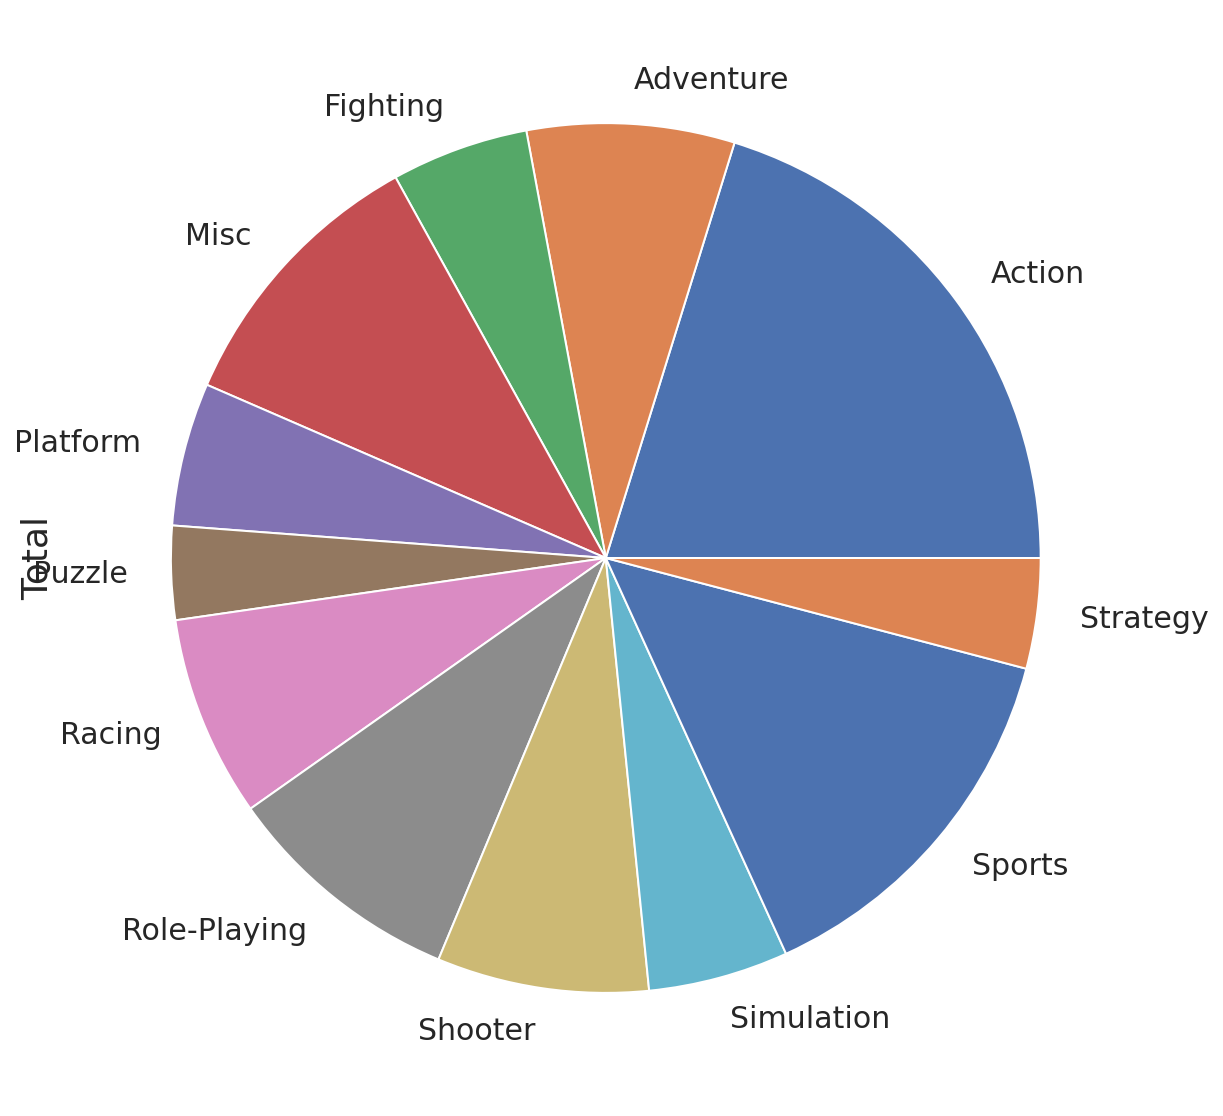

In [ ]:
Gen = df.groupby('Genre').count()
Gen = Gen['Total']
Gen.index.names = ['Genre']

plt.rcParams['figure.figsize'] = [20, 10]
plt.ylabel('')
Gen.plot(kind='pie',fontsize = 15);

In [ ]:
df_con2 = df[['Genre','NA', 'EU', 'JP', 'Other', 'Total']]
df_g = df_con2
df_con2 = df_con2.set_index('Genre')
df_con2

NA      EU     JP  Other   Total
Genre                                             
Sports        150.00  100.00 120.00  30.00  400.00
Role-Playing    3.00    3.00 170.00   3.00  179.00
Role-Playing  110.00   90.00   3.00  30.00  233.00
Role-Playing    3.00    3.00 160.00   3.00  169.00
Role-Playing    3.00    3.00 170.00   3.00  179.00
...              ...     ...    ...    ...     ...
Misc         1670.00  580.00   3.00 200.00 2453.00
Misc           80.00   90.00   3.00  20.00  193.00
Misc           10.00   10.00   3.00   3.00   26.00
Fighting     1570.00 1020.00   3.00 410.00 3003.00
Platform        3.00    3.00 140.00   3.00  149.00

[16596 rows x 5 columns]

그룹별 평균

In [ ]:
df_g = df_g.groupby(df_g['Genre']).mean()
df_g

NA         EU         JP      Other       Total
Genre                                                               
Action       7997878.63 2220130.98  440001.73  406625.07 11064636.41
Adventure     600864.92  162556.41   67238.65  225807.81  1056467.79
Fighting     1605929.87 1683722.19 1589255.17  597450.03  5476357.26
Misc         2483518.06 1640270.95  266505.42  267064.98  4657359.41
Platform     5905476.79 8620129.48  904015.45  598495.28 16028117.00
Puzzle        744163.18  714631.70   10486.38   91728.87  1561010.14
Racing       9621358.54 1646209.75  242225.35  340373.16 11850166.81
Role-Playing 1087205.53 1093859.13 7943593.70 1102543.73 11227202.10
Shooter      9558969.33 4766881.02   55128.53  573153.81 14954132.69
Simulation   3759749.65 1283378.39 1486793.28   91377.27  6621298.59
Sports       5179352.51 1642475.61  635113.71  524848.17  7981790.00
Strategy     1570715.64  185366.16 1533900.95  477976.54  3767959.29

'전세계의 전체매출액 평균값이 장르별 평균과 비슷하다'는 가설에 대해 그룹별 가설검정을 시행

In [ ]:
total_mean = list(df_g.mean())
print('NA의 전장르 평균: %.3f' %total_mean[0])
print('EU의 전장르 평균: %.3f' %total_mean[1])
print('JP의 전장르 평균: %.3f' %total_mean[2])
print('Other의 전장르 평균: %.3f' %total_mean[3])
print('Total의 전장르 평균: %.3f' %total_mean[4])

NA의 전장르 평균: 4176265.221
EU의 전장르 평균: 2138300.982
JP의 전장르 평균: 1264521.527
Other의 전장르 평균: 441453.727
Total의 전장르 평균: 8020541.456


Total에서의 그룹별 가설검정 시행

In [ ]:
l = df_g.index
print('전세계의 게임장르별 가설검정 시행\n')
for i in l:
  t,p = stats.ttest_1samp(df_con2.loc[i]['Total'],total_mean[4])
  print('그룹 %s와 전체그룹의 평균의 가설검정' %i)
  print('그룹 %s의 t-test값: %.3f' %(i,t))
  print('그룹 %s의 p-value값: %.3f' %(i,p))
  if p<=0.05:
    print('p-value값이 %.3f이므로 귀무가설 기각, 대안가설 채택' %p)
  elif p>=0.1:
    print('p-value값이 %.3f이므로 귀무가설 채택, 대안가설 기각' %p)
  else:
    print('p-value값이 %.3f이므로 애매하다' %p)
  print('------------------------------------------')
print('\n')

전세계의 게임장르별 가설검정 시행

그룹 Action와 전체그룹의 평균의 가설검정
그룹 Action의 t-test값: 0.833
그룹 Action의 p-value값: 0.405
p-value값이 0.405이므로 귀무가설 채택, 대안가설 기각
------------------------------------------
그룹 Adventure와 전체그룹의 평균의 가설검정
그룹 Adventure의 t-test값: -21.192
그룹 Adventure의 p-value값: 0.000
p-value값이 0.000이므로 귀무가설 기각, 대안가설 채택
------------------------------------------
그룹 Fighting와 전체그룹의 평균의 가설검정
그룹 Fighting의 t-test값: -1.214
그룹 Fighting의 p-value값: 0.225
p-value값이 0.225이므로 귀무가설 채택, 대안가설 기각
------------------------------------------
그룹 Misc와 전체그룹의 평균의 가설검정
그룹 Misc의 t-test값: -2.321
그룹 Misc의 p-value값: 0.020
p-value값이 0.020이므로 귀무가설 기각, 대안가설 채택
------------------------------------------
그룹 Platform와 전체그룹의 평균의 가설검정
그룹 Platform의 t-test값: 1.423
그룹 Platform의 p-value값: 0.155
p-value값이 0.155이므로 귀무가설 채택, 대안가설 기각
------------------------------------------
그룹 Puzzle와 전체그룹의 평균의 가설검정
그룹 Puzzle의 t-test값: -7.765
그룹 Puzzle의 p-value값: 0.000
p-value값이 0.000이므로 귀무가설 기각, 대안가설 채택
------------------------------------------
그룹 Racing와 전

## 3-2. Two-Sample T-Test
### [표본집단 A와 표본집단 B]

1. Adventure의 평균 매출액 == Racing 평균 매출액 !? 
- 표본집단 A: Adventure의 평균 매출액
- 표본집단 B: Racing 평균 매출액

2. DS Platform의 매출액 평균 ==  PS2 Platform 매출액 평균!?
- 표본집단 A: DS Platform 매출액의 평균
- 표본집단 B: PS2 Platform 매출액의 평균

### Adventure의 평균 매출액 = Racing의 평균 매출액!?

모든 게임에 대하여 장르별 게임 수를 확인한 결과 Adventure 1280개, Racing 1243로 가장 많았다

두 장르 게임의 수가 비슷하기 때문에 두 게임의 매출평균액도 비슷할 것이라고 생각했다

- 귀무가설: Adventure 장르의 매출평균액은 Racing장르의 매출평균액과 같다
- 대립가설: Adventure 장르의 매출평균액은 Racing장르의 매출평균액과 같지 않다

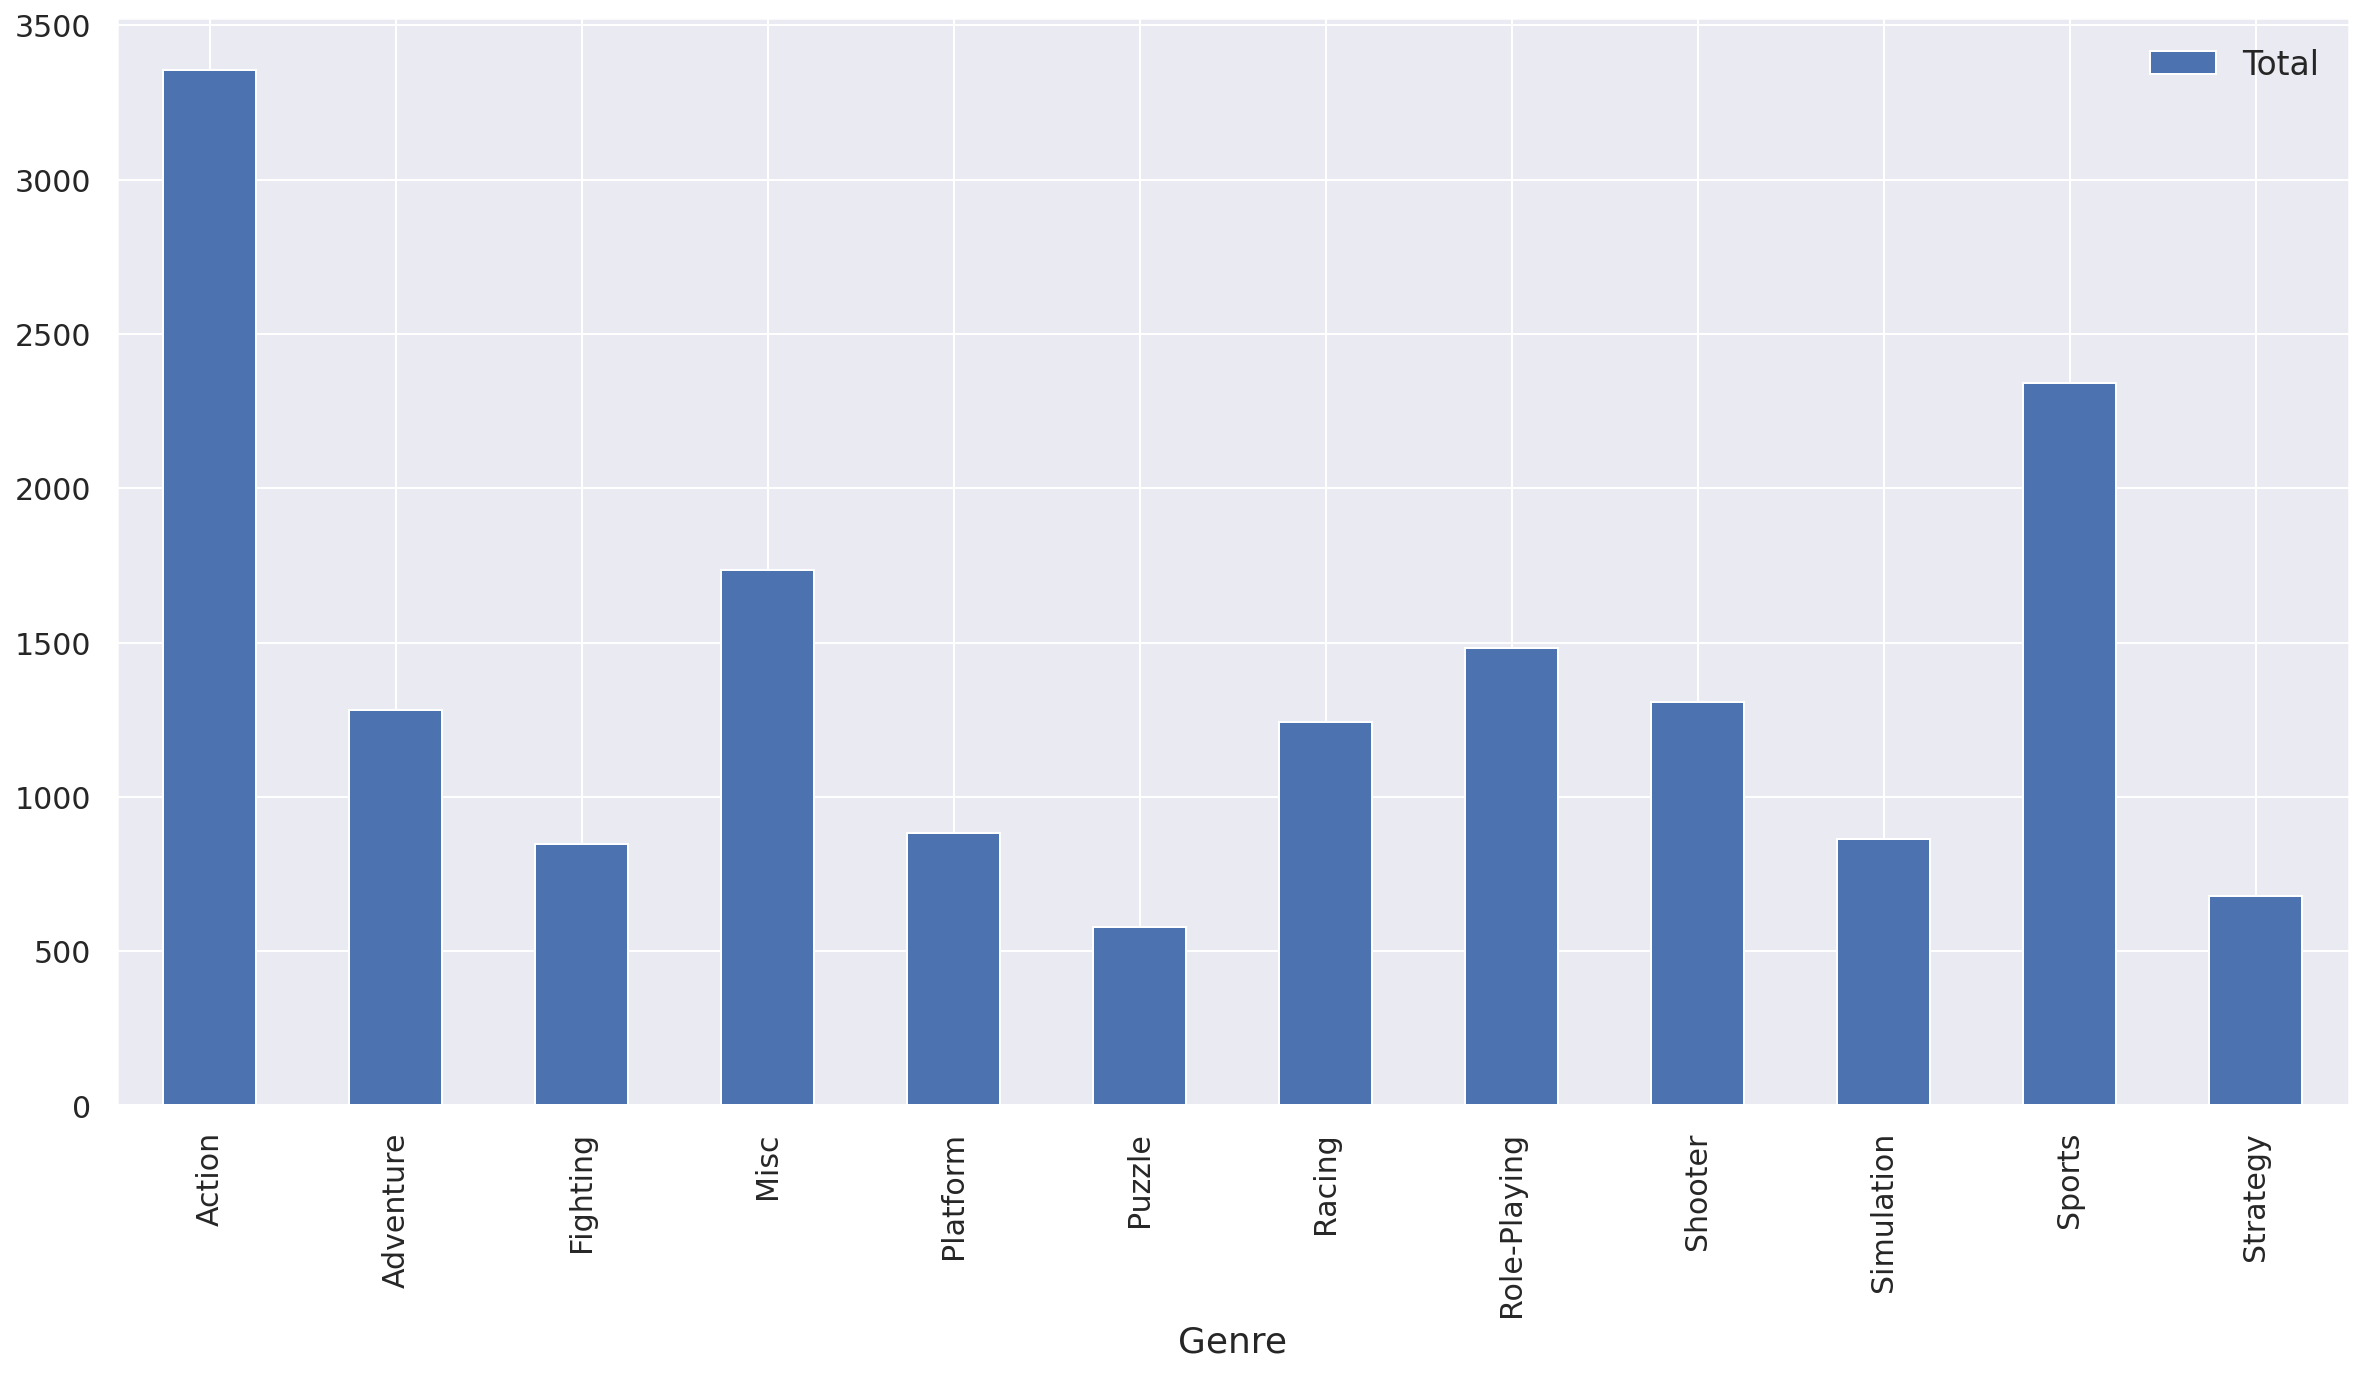

In [ ]:
Gen = df.groupby('Genre').count()
Gen = Gen[['Total']]
Gen.index.names = ['Genre']

plt.rcParams['figure.figsize'] = [20, 10]
Gen.plot(kind='bar',fontsize = 15);

In [ ]:
Adv = df_con2[df_con2.index=='Adventure']
Rac = df_con2[df_con2.index=='Racing']

In [ ]:
l = list(Adv.columns)
for i in l:
  tAR, pAR = stats.ttest_ind(Adv[i],Rac[i])
  print('Adventure-Racing: %s 국가에 대한 결과' %(i))
  print('t-value: %.3f \tp-value: %.3f' %(tAR, pAR))
  if pAR<=0.05:
     print('p-value값이 %.3f이므로 귀무가설 기각, 대안가설 채택\n' %pAR)
  elif pAR>=0.1:
    print('p-value값이 %.3f이므로 귀무가설 채택, 대안가설 기각\n' %pAR)
  else:
    print('p-value값이 %.3f이므로 애매하다\n' %pAR)

Adventure-Racing: NA 국가에 대한 결과
t-value: -1.802 	p-value: 0.072
p-value값이 0.072이므로 애매하다

Adventure-Racing: EU 국가에 대한 결과
t-value: -2.234 	p-value: 0.026
p-value값이 0.026이므로 귀무가설 기각, 대안가설 채택

Adventure-Racing: JP 국가에 대한 결과
t-value: -0.835 	p-value: 0.404
p-value값이 0.404이므로 귀무가설 채택, 대안가설 기각

Adventure-Racing: Other 국가에 대한 결과
t-value: -0.396 	p-value: 0.692
p-value값이 0.692이므로 귀무가설 채택, 대안가설 기각

Adventure-Racing: Total 국가에 대한 결과
t-value: -2.126 	p-value: 0.034
p-value값이 0.034이므로 귀무가설 기각, 대안가설 채택



### DS의 평균 매출액 = PS2의 평균 매출액!?

Platform별로 지원되는 게임의 개수를 확인한 결과, DS와 PS2가 거의 같은 값으로 다양한 게임을 지원하고 있었다.

- DS      2163
- PS2     2161

이를 토대로 2개의 Platform의 매출액이 같지 않을까? 생각하게 되어 two -sample t-test를 시행하여 확인하였다.

- 귀무가설: DS플랫폼의 평균 매출액과 PS2플랫폼의 평균 매출액은 같다
- 대립가설: DS플랫폼의 평균 매출액과 PS2플랫폼의 평균 매출액은 같지 않다

In [ ]:
df_p = df[['Platform','NA',"EU",'JP','Other','Total']]
df_p = df_p.set_index('Platform')
df_p

NA      EU     JP  Other   Total
Platform                                      
PS        150.00  100.00 120.00  30.00  400.00
PS2         3.00    3.00 170.00   3.00  179.00
PS2       110.00   90.00   3.00  30.00  233.00
PS2         3.00    3.00 160.00   3.00  169.00
PS2         3.00    3.00 170.00   3.00  179.00
...          ...     ...    ...    ...     ...
Wii      1670.00  580.00   3.00 200.00 2453.00
Wii        80.00   90.00   3.00  20.00  193.00
X360       10.00   10.00   3.00   3.00   26.00
PS2      1570.00 1020.00   3.00 410.00 3003.00
DS          3.00    3.00 140.00   3.00  149.00

[16596 rows x 5 columns]

In [ ]:
DS = df_p[df_p.index=='DS']
PS = df_p[df_p.index=='PS2']

In [ ]:
l = list(PS.columns)
for i in l:
  tDP, pDP = stats.ttest_ind(DS[i],PS[i])
  print('DS-PS2: %s 국가에 대한 결과' %(i))
  print('t-value: %.3f \tp-value: %.3f' %(tDP, pDP))
  if pDP<=0.05:
     print('p-value값이 %.3f이므로 귀무가설 기각, 대안가설 채택\n' %pDP)
  elif pDP>=0.1:
    print('p-value값이 %.3f이므로 귀무가설 채택, 대안가설 기각\n' %pDP)
  else:
    print('p-value값이 %.3f이므로 애매하다\n' %pDP)

DS-PS2: NA 국가에 대한 결과
t-value: -0.133 	p-value: 0.894
p-value값이 0.894이므로 귀무가설 채택, 대안가설 기각

DS-PS2: EU 국가에 대한 결과
t-value: -1.294 	p-value: 0.196
p-value값이 0.196이므로 귀무가설 채택, 대안가설 기각

DS-PS2: JP 국가에 대한 결과
t-value: 0.426 	p-value: 0.670
p-value값이 0.670이므로 귀무가설 채택, 대안가설 기각

DS-PS2: Other 국가에 대한 결과
t-value: -2.472 	p-value: 0.013
p-value값이 0.013이므로 귀무가설 기각, 대안가설 채택

DS-PS2: Total 국가에 대한 결과
t-value: -0.988 	p-value: 0.323
p-value값이 0.323이므로 귀무가설 채택, 대안가설 기각



## 3-3. T-Test 시각화

In [ ]:
import copy
dff = copy.copy(df)
dff

Name  Year  ...  Other   Total
0                                  '98 Koshien  1998  ...  30.00  400.00
1                   .hack//G.U. Vol.1//Rebirth  2006  ...   3.00  179.00
2                 .hack//G.U. Vol.2//Reminisce  2006  ...  30.00  233.00
3      .hack//G.U. Vol.2//Reminisce (jp sales)  2006  ...   3.00  169.00
4                .hack//G.U. Vol.3//Redemption  2007  ...   3.00  179.00
...                                        ...   ...  ...    ...     ...
16591                             uDraw Studio  2010  ... 200.00 2453.00
16592             uDraw Studio: Instant Artist  2011  ...  20.00  193.00
16593             uDraw Studio: Instant Artist  2011  ...   3.00   26.00
16594               wwe Smackdown vs. Raw 2006  2002  ... 410.00 3003.00
16595             ¡Shin Chan Flipa en colores!  2007  ...   3.00  149.00

[16596 rows x 10 columns]

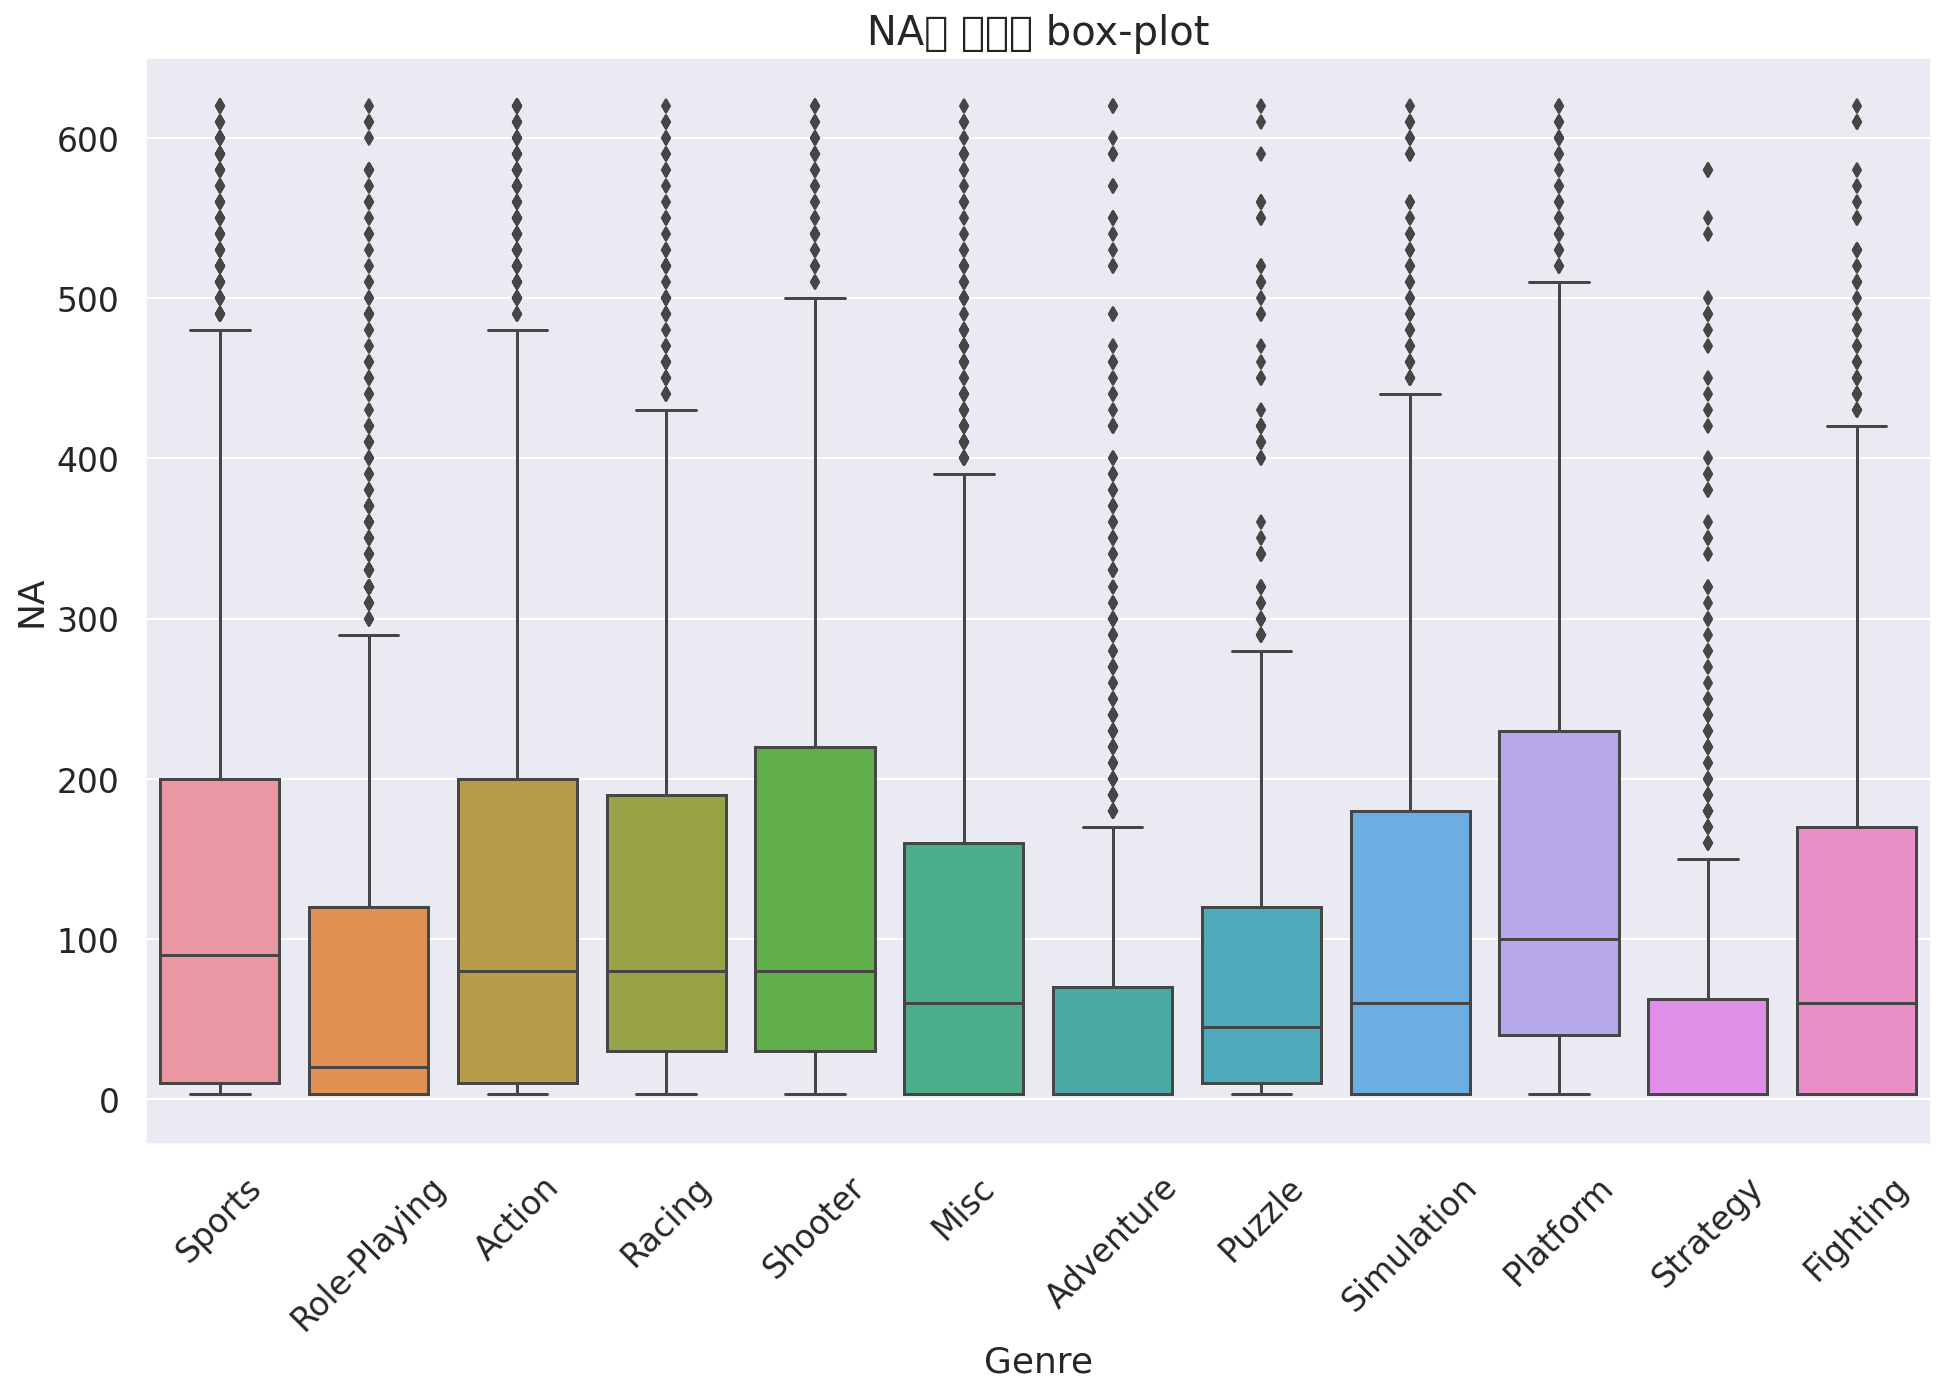

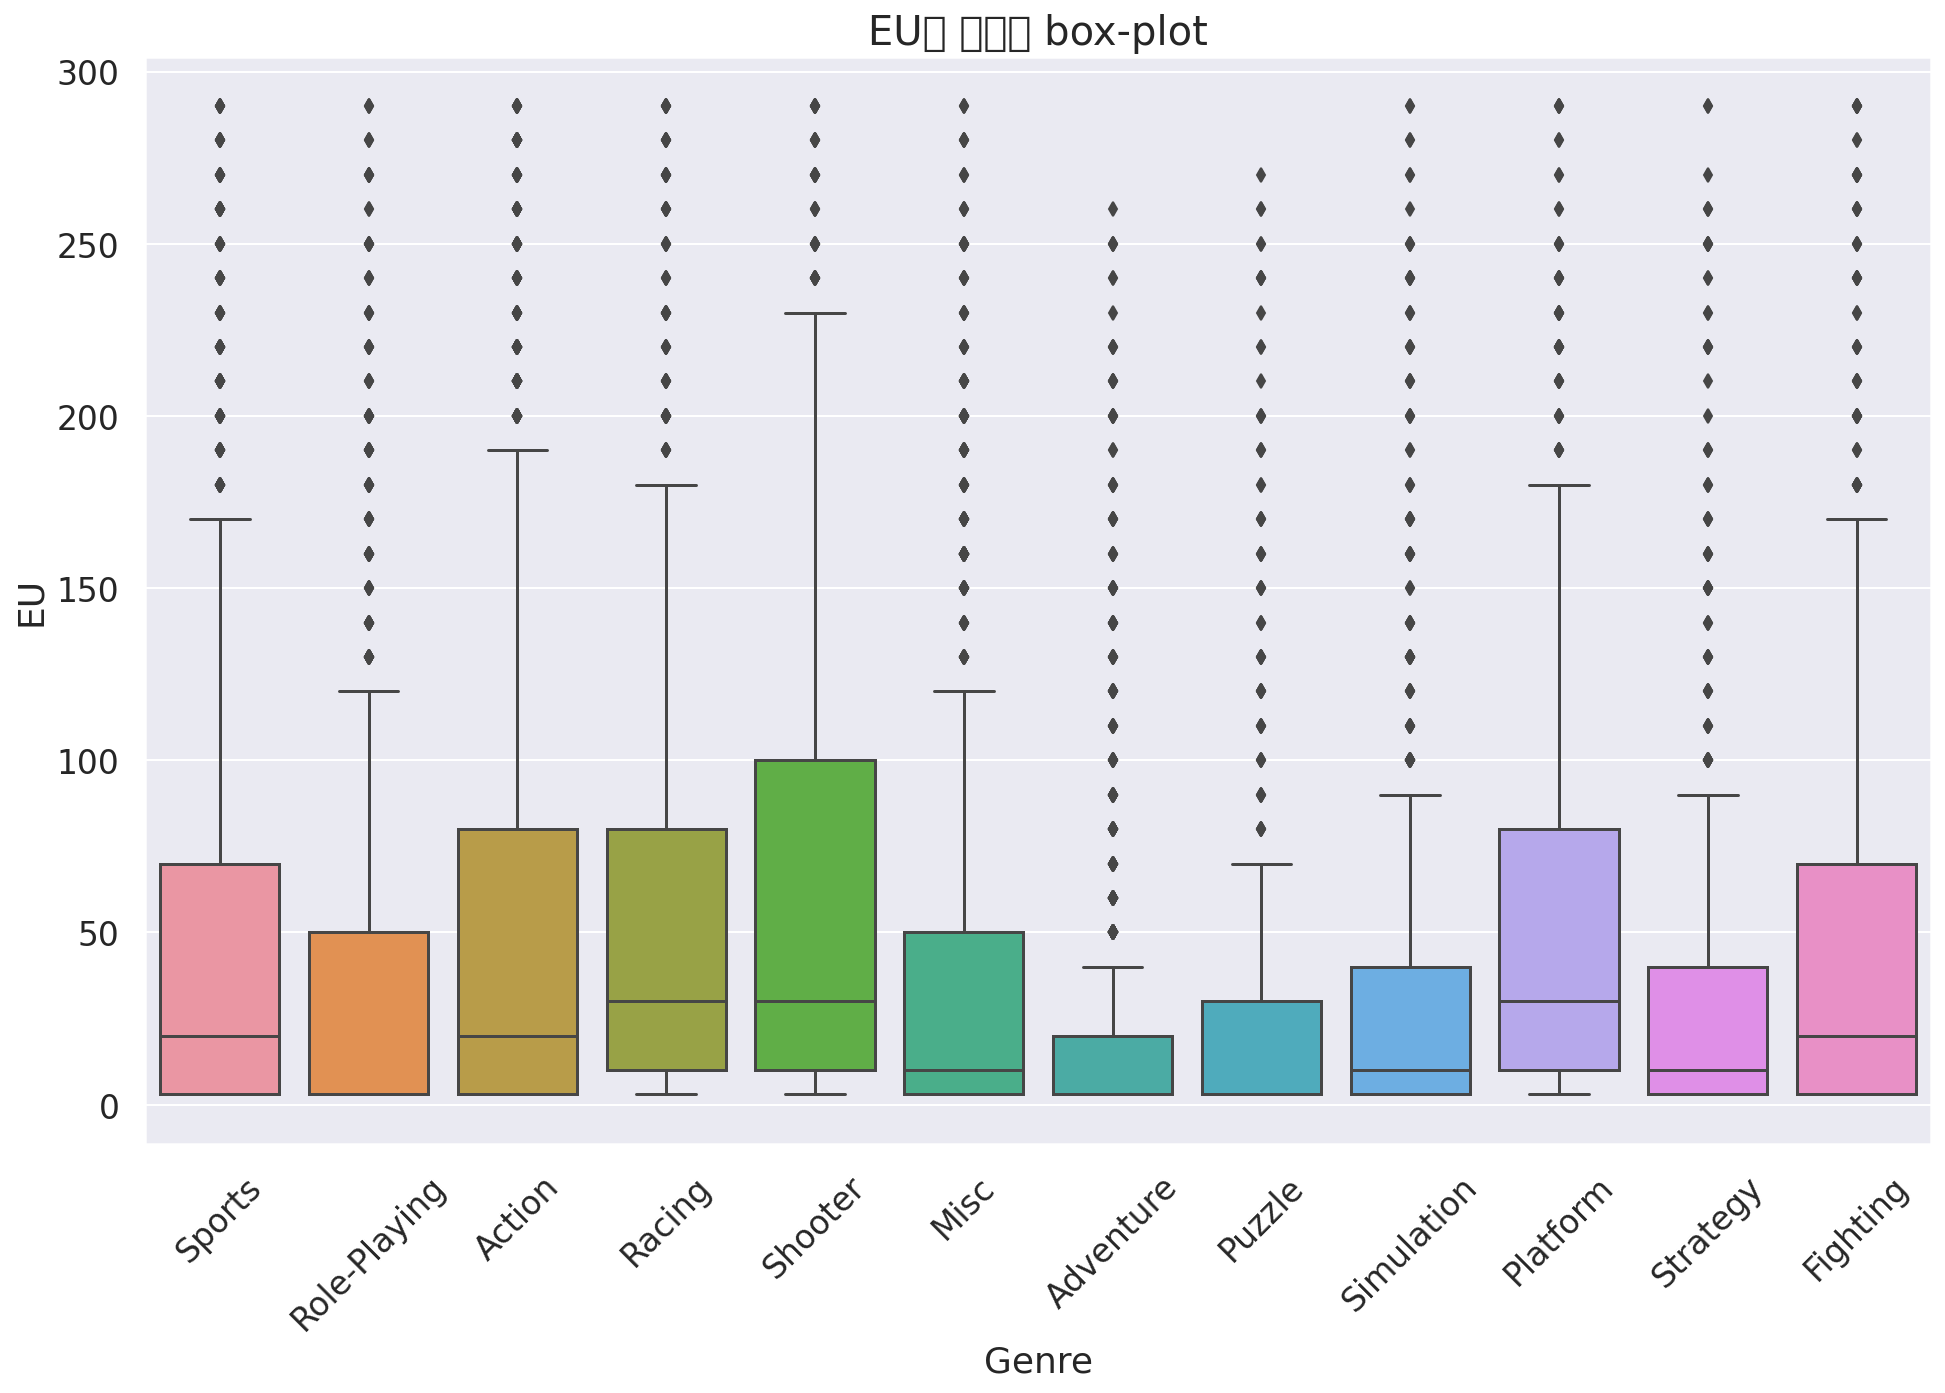

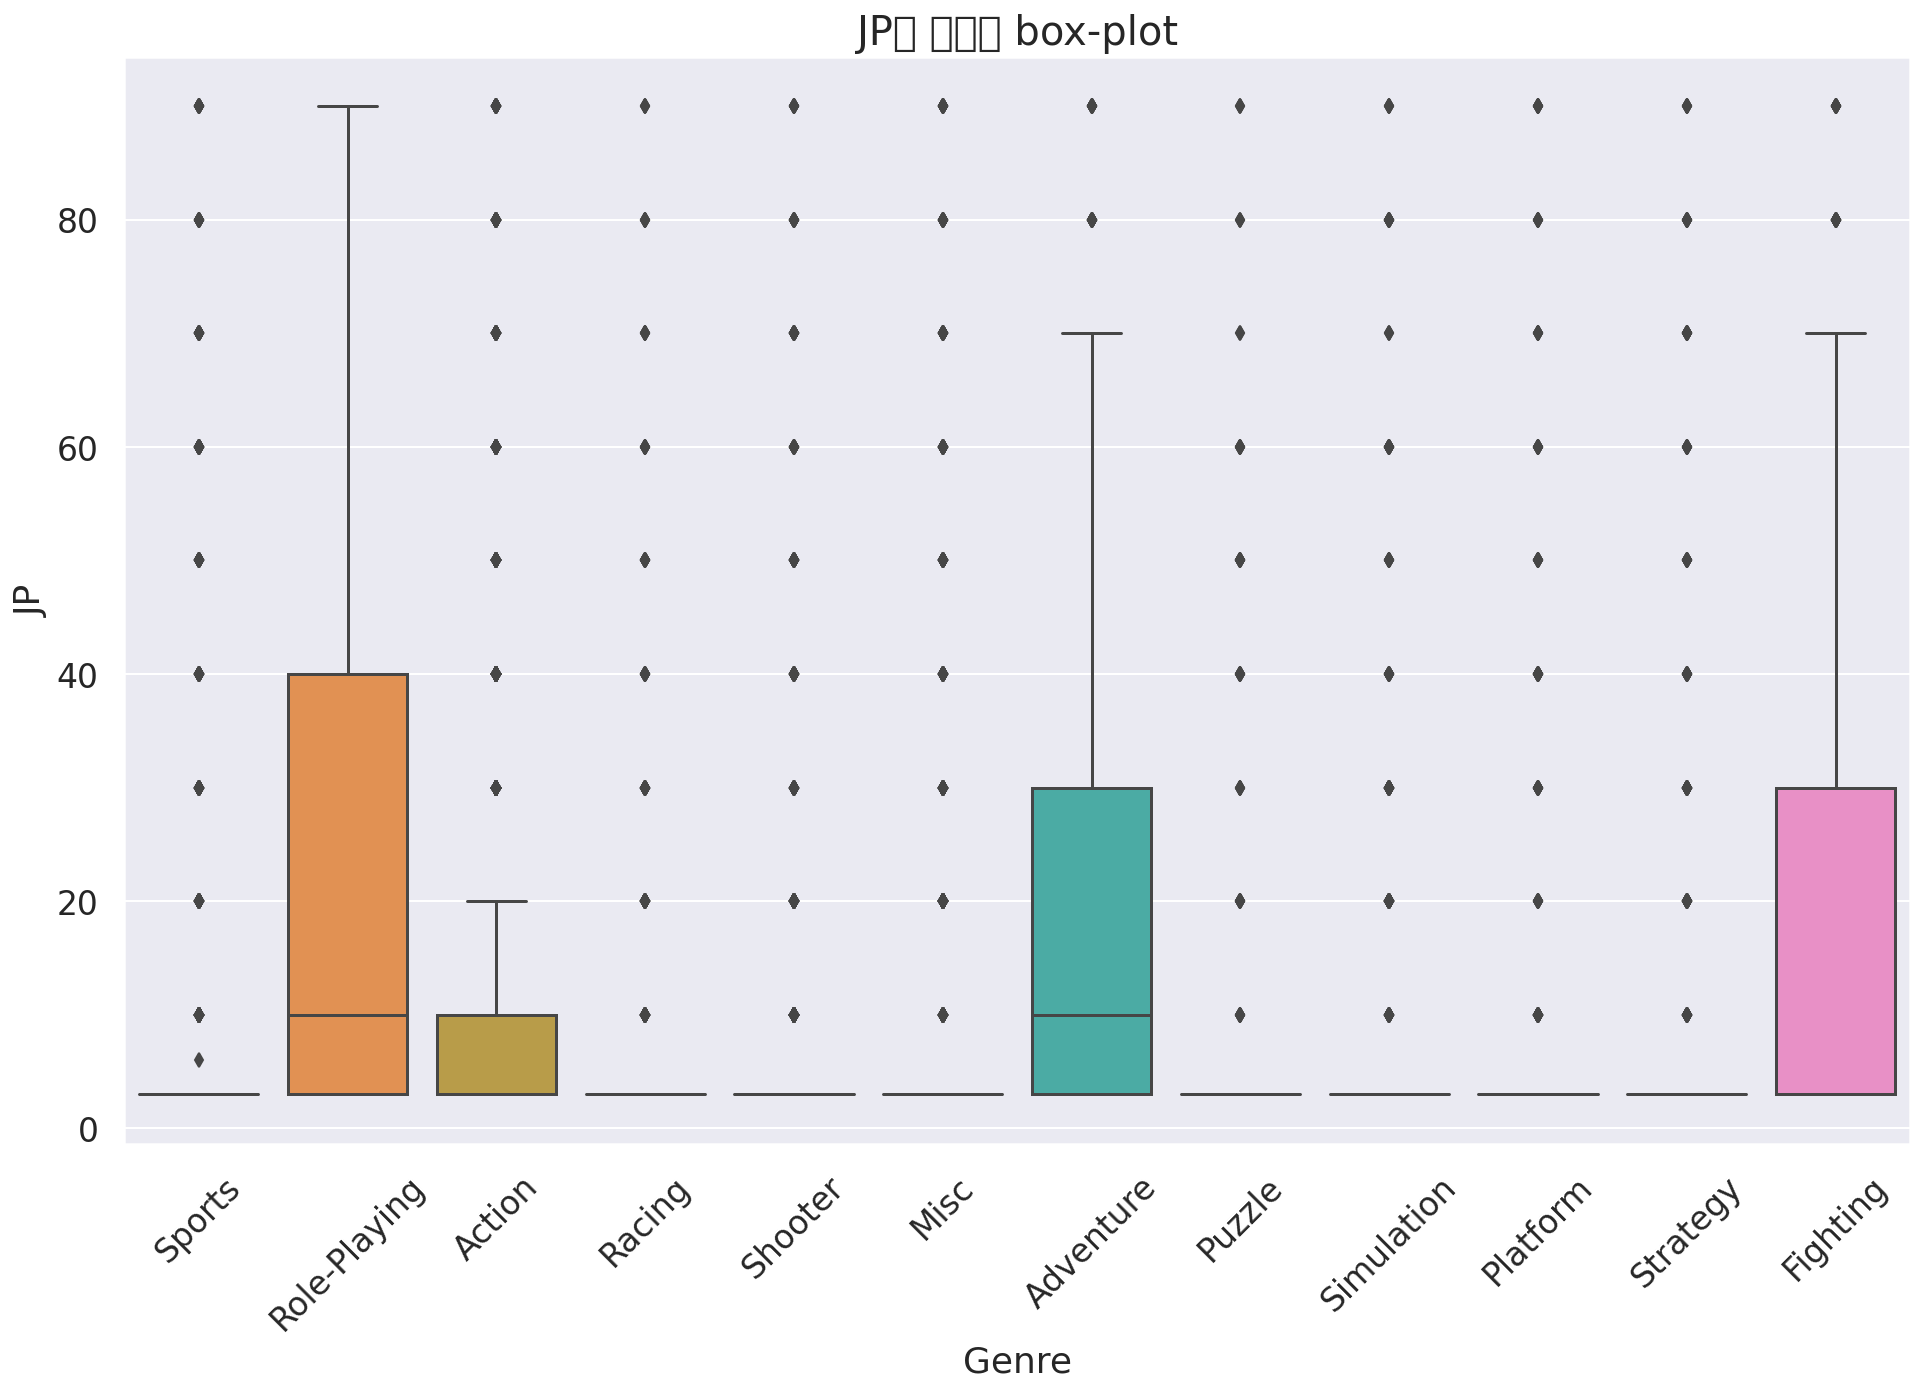

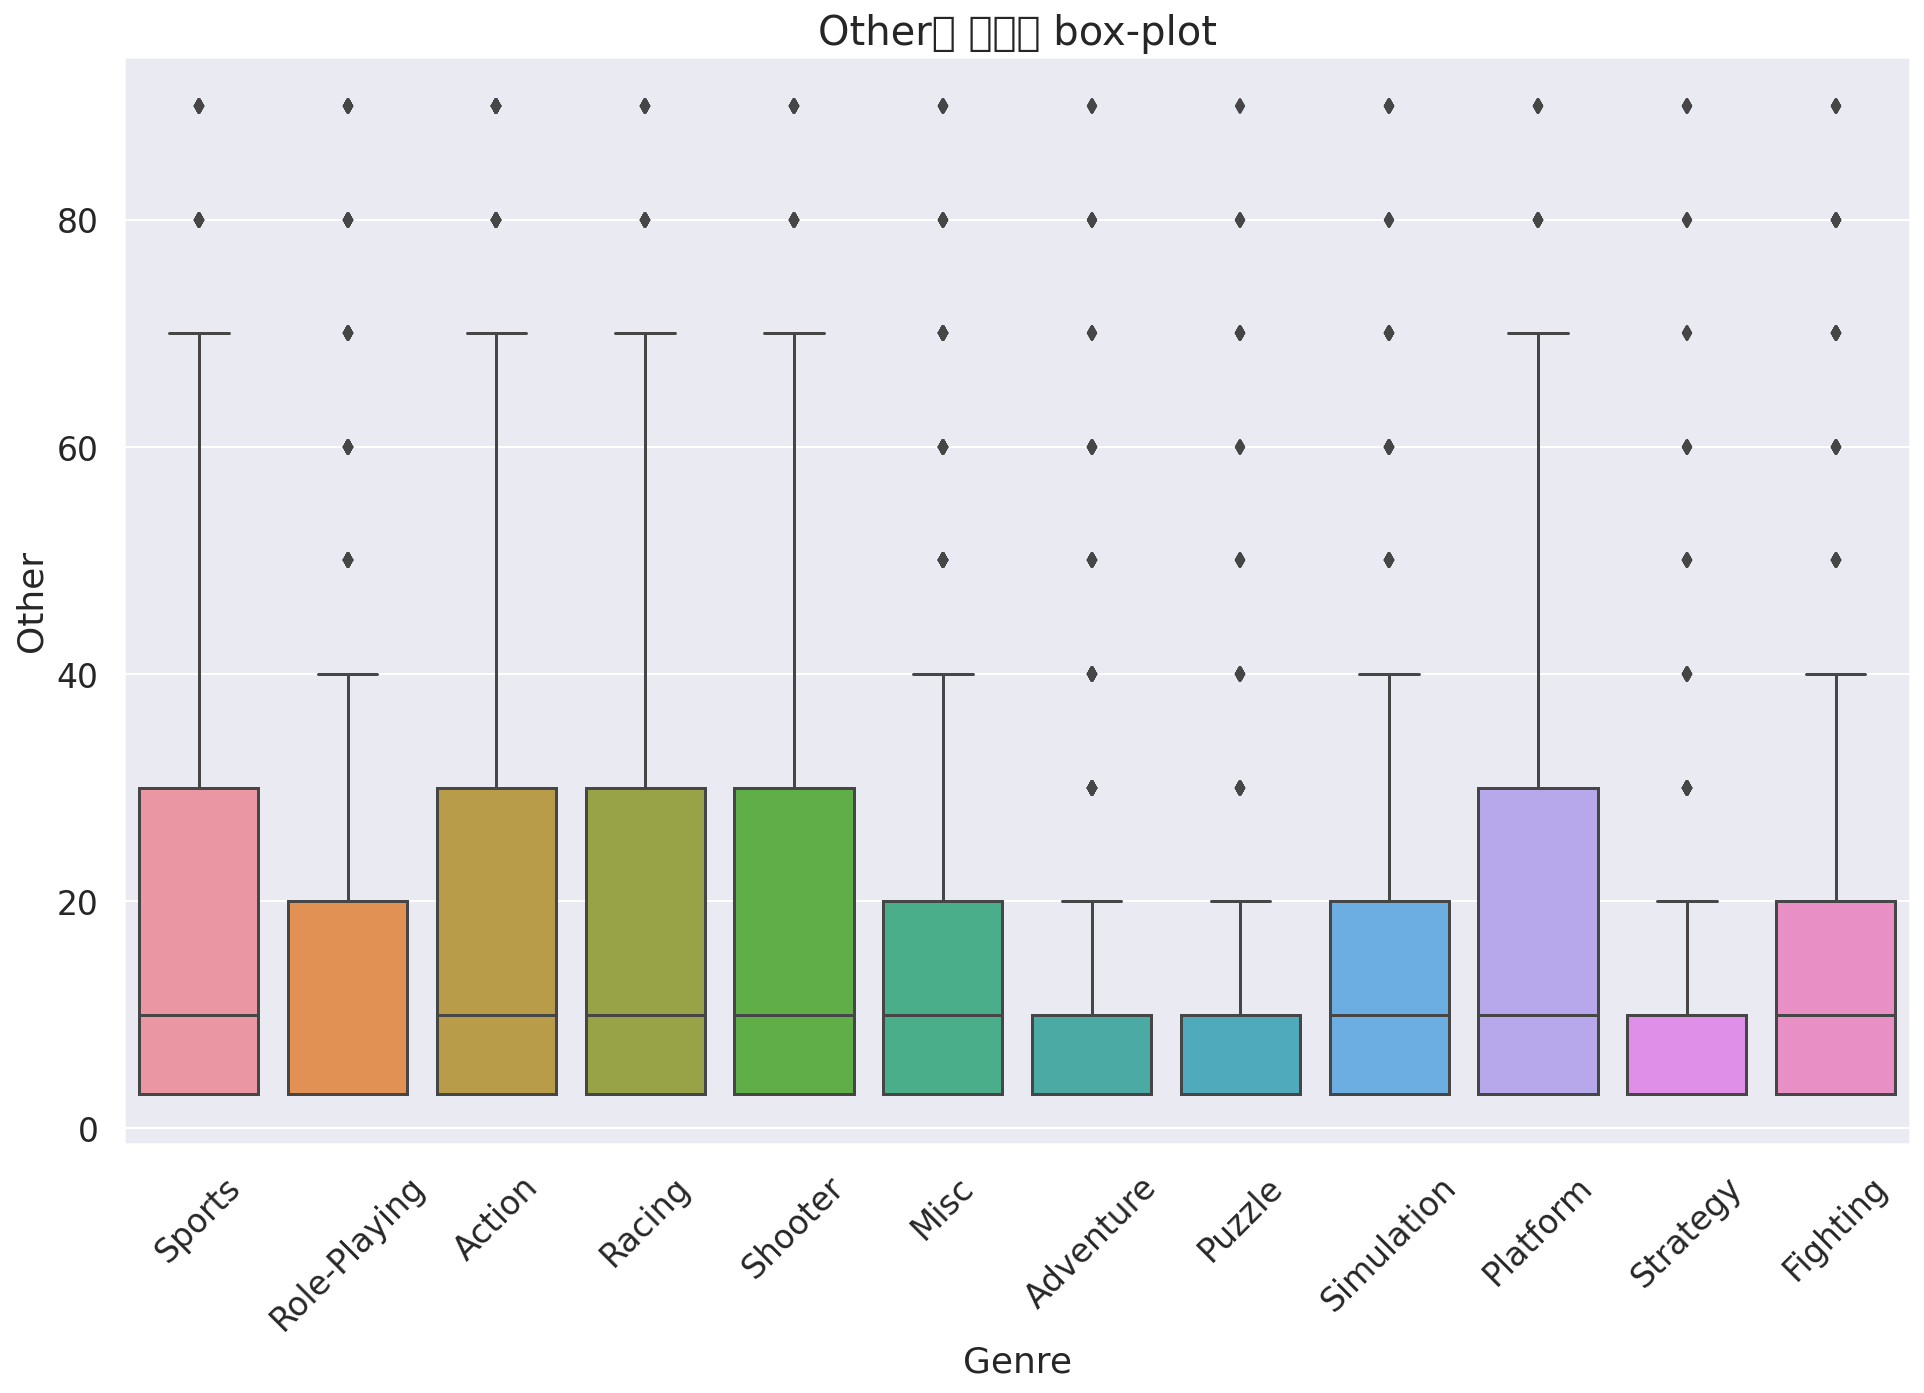

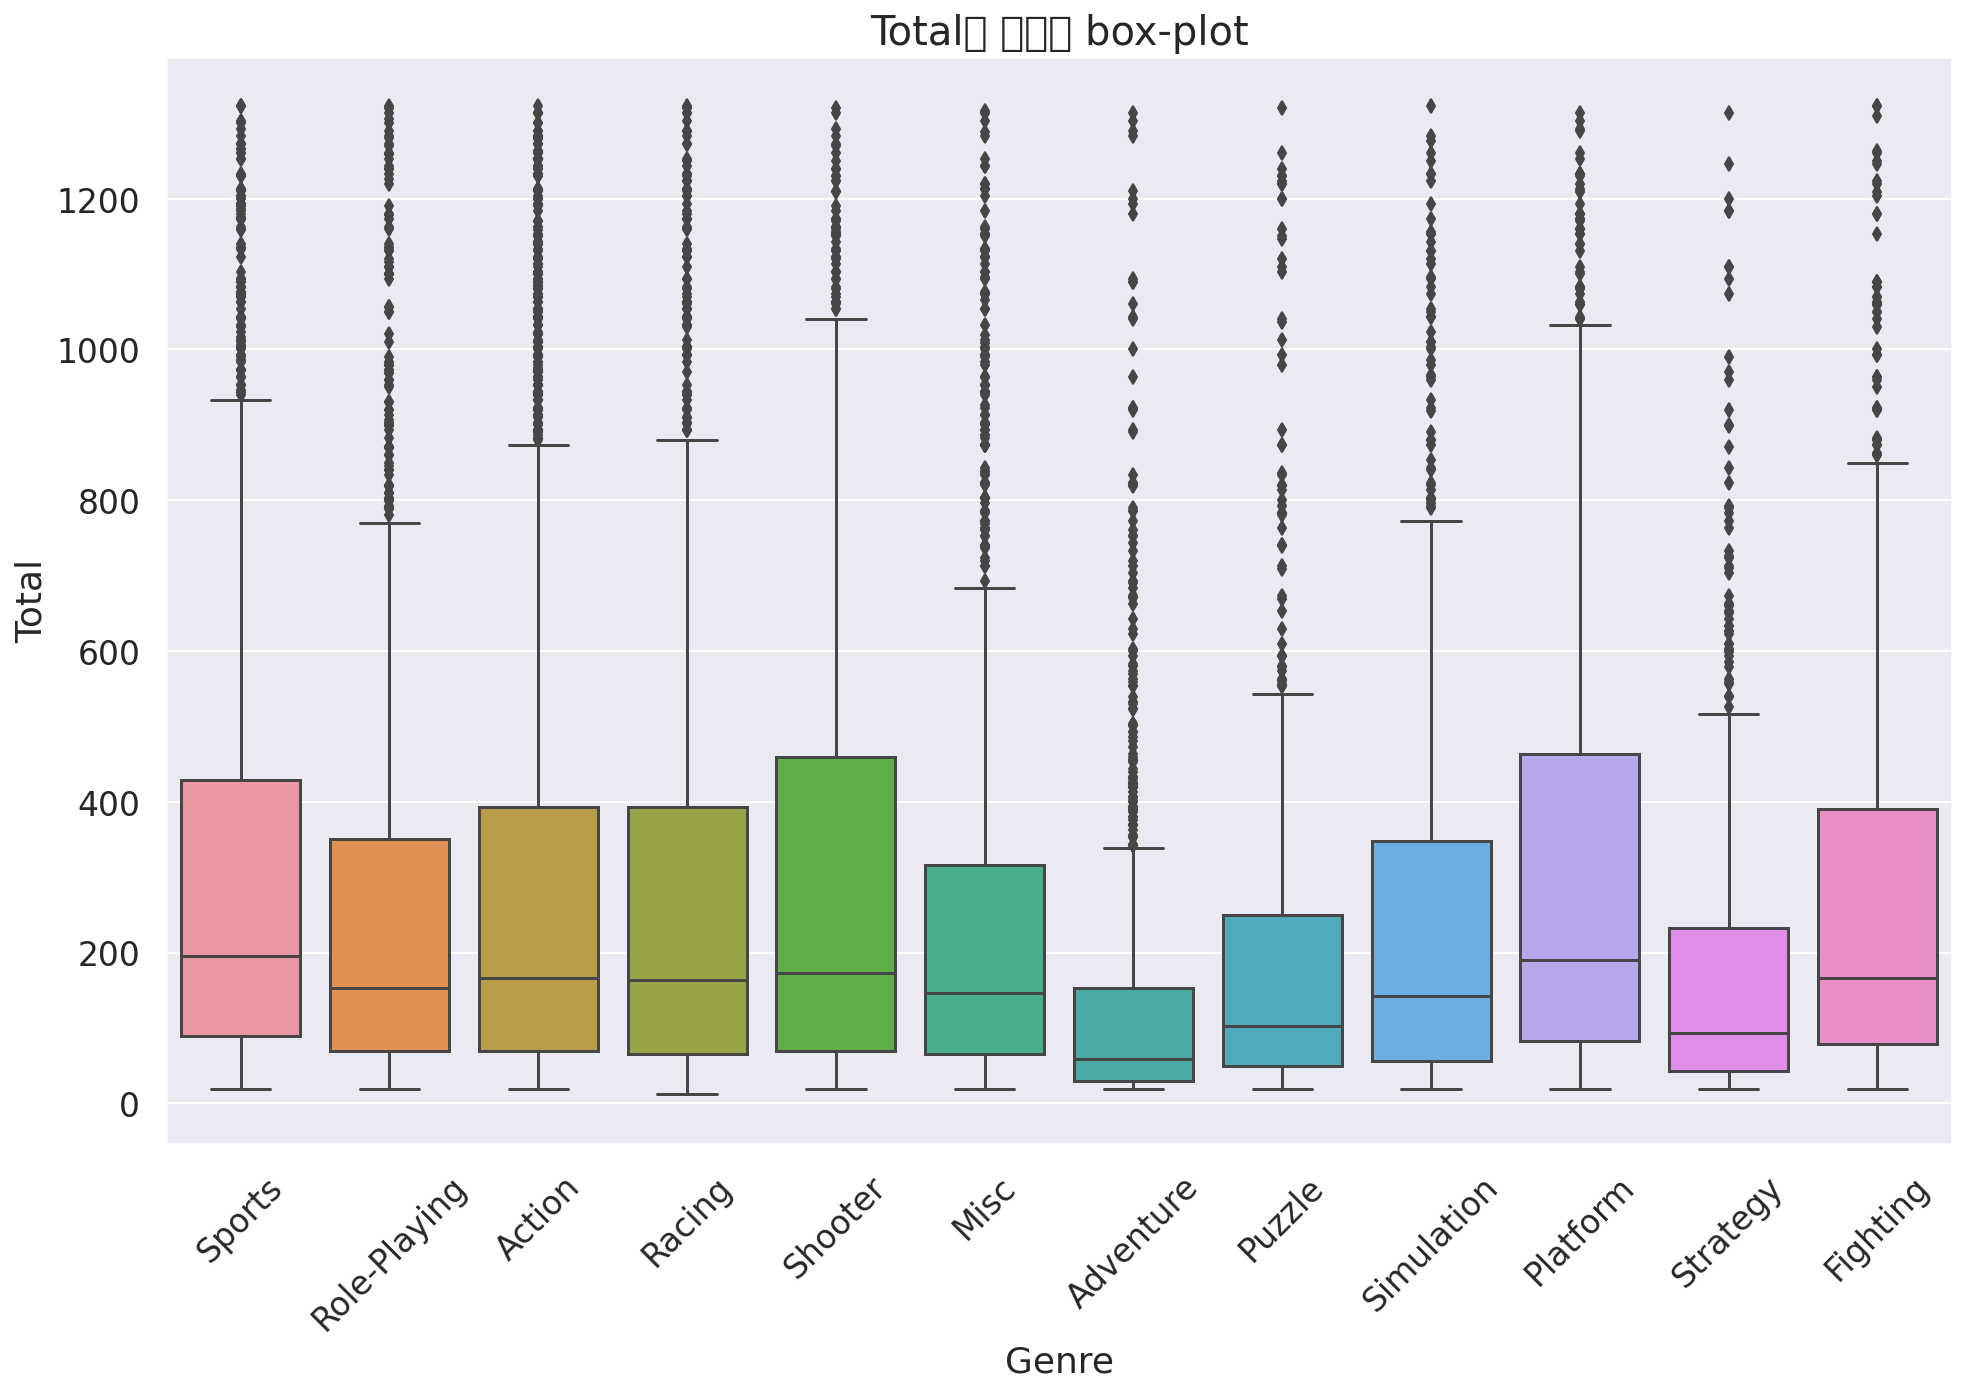

In [ ]:
def removeOutlier(x, column):
  # Q1, Q3 구하기
  q1 = x[column].quantile(0.25)
  q3 = x[column].quantile(0.75)

  # iqt(1QR 범위를 벗어난값 ~ 4QR 범위를 벗어난 값) - 알아서 지정해서 제거되는 이상치값 범위 정함
  iqt = 1.5 * (q3-q1)

  # 원래 데이터 복제
  y = x

  y[column][(y[column]>(q3+iqt)) | (y[column]<(q1-iqt))] = None
  y[column]

  return y

l = ['NA','EU','JP','Other','Total']

for i in l:
  # removeOutlier(dff, i).boxplot(column=i, by=['Genre'])
  plt.rcParams['figure.figsize'] = [16, 10]
  s =removeOutlier(dff, i)
  sns.boxplot(data = s,x='Genre',y=i)
  plt.title('%s의 장르별 box-plot'%i, fontsize=20)
  plt.xticks(rotation=45)
  plt.show();

## 3-4. 신뢰구간

In [ ]:
Rol = df_con2[df_con2.index=='Role-Playing']
Sho = df_con2[df_con2.index=='Shooter']
Ac = df_con2[df_con2.index=='Action']

Cnt = ['NA','EU','JP','Other','Total']

In [ ]:
def confidence_interval(data, confidence = 0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  
  # std / sqrt(n)
  stderr = stats.sem(data)

  # length_of_one_interval
  interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1) # ppf : inverse of cdf
  return (mean, mean - interval, mean + interval)

for i in Cnt:
  q, w, e = confidence_interval(Rol.loc[:,i])
  a, s, d = confidence_interval(Sho.loc[:,i])
  print('Confidence Interval - %s' %i)
  print('Role-Playing mean: %.2f\nRole-Playing CI: %.2f ~ %.2f' %(q,w,e))
  print('Shooter mean: %.2f\nShooter CI: %.2f ~ %.2f' %(a,s,d))
  print('\n')


for i in Cnt:
  q, w, e = confidence_interval(Ac.loc[:,i])
  a, s, d = confidence_interval(Sho.loc[:,i])
  print('Confidence Interval - %s' %i)
  print('Action mean: %.2f\nAction CI: %.2f ~ %.2f' %(q,w,e))
  print('Shooter mean: %.2f\nShooter CI: %.2f ~ %.2f' %(a,s,d))
  print('\n')

Confidence Interval - NA
Role-Playing mean: 1087205.53
Role-Playing CI: 91513.49 ~ 2082897.57
Shooter mean: 9558969.33
Shooter CI: -1617817.59 ~ 20735756.24


Confidence Interval - EU
Role-Playing mean: 1093859.13
Role-Playing CI: -560954.35 ~ 2748672.60
Shooter mean: 4766881.02
Shooter CI: 484156.09 ~ 9049605.96


Confidence Interval - JP
Role-Playing mean: 7943593.70
Role-Playing CI: 841283.53 ~ 15045903.87
Shooter mean: 55128.53
Shooter CI: -12558.62 ~ 122815.68


Confidence Interval - Other
Role-Playing mean: 1102543.73
Role-Playing CI: 1034.59 ~ 2204052.88
Shooter mean: 573153.81
Shooter CI: -19528.30 ~ 1165835.93


Confidence Interval - Total
Role-Playing mean: 11227202.10
Role-Playing CI: 3793864.05 ~ 18660540.14
Shooter mean: 14954132.69
Shooter CI: 2946768.44 ~ 26961496.95


Confidence Interval - NA
Action mean: 7997878.63
Action CI: 1043287.38 ~ 14952469.88
Shooter mean: 9558969.33
Shooter CI: -1617817.59 ~ 20735756.24


Confidence Interval - EU
Action mean: 2220130.98
Action

## 3-5. One-Sample Chi-Test
### [표본집단 A의 분포, 나의 예측]
수많은 게임들이 플랫폼을 이용해 즐길 수 있다.
따라서 플랫폼마다 다양하게 게임을 즐길 수 있도록 다양한 장르에 대해 출시가 되었을 것이라고 생각하였다.

**따라서, 플랫폼은 어떤 특정 장르의 게임을 위해 출시된 것이 아니라 플랫폼마다 다양한 장르의 게임으로 고른 분포로 출시되었을 것이라고 생각했다.**

- 귀무가설: 플랫폼의 게임 장르별 분포는 고를 것이다.
- 대립가설: 플랫폼의 게임 장르별 분포는 고르지 않을 것이다.

In [ ]:
df_ca.head(5)

Name Platform  ...           Publisher  Year
0                              '98 Koshien       PS  ...     Magical Company  1998
1               .hack//G.U. Vol.1//Rebirth      PS2  ...  Namco Bandai Games  2006
2             .hack//G.U. Vol.2//Reminisce      PS2  ...  Namco Bandai Games  2006
3  .hack//G.U. Vol.2//Reminisce (jp sales)      PS2  ...  Namco Bandai Games  2006
4            .hack//G.U. Vol.3//Redemption      PS2  ...  Namco Bandai Games  2007

[5 rows x 5 columns]

In [ ]:
GP = pd.crosstab(df_ca['Genre'],df_ca['Platform'])
GP

Platform      2600  3DO  3DS  DC   DS  GB  ...  WS  Wii  WiiU  X360   XB  XOne
Genre                                      ...                                
Action          62    0  183   3  347   6  ...   0  243    63   327  159    69
Adventure        2    1   37  11  239   5  ...   0   84     3    47   26    11
Fighting         2    0   14  12   36   0  ...   0   42     5    64   48     7
Misc             5    0   53   0  392   8  ...   0  278    21   126   46    15
Platform         9    0   28   2   92  19  ...   0   58    16    24   49     4
Puzzle          11    1   20   0  237  15  ...   0   54     4     7    7     0
Racing           6    0   11   6   67   2  ...   0   93     3   103  122    19
Role-Playing     0    0   85   4  200  21  ...   4   35     6    76   23    13
Shooter         24    0    7   3   42   1  ...   0   64    10   203  131    33
Simulation       1    1   30   1  284   5  ...   0   87     1    40   24     3
Sports          11    0   26  10  148   9  ...   0  261     8   220  168    36
Strategy         0    0   15   0   79   7  ...   2   25     3    28   21     3

[12 rows x 31 columns]

In [ ]:
l = list(GP.columns)
goren = []
for j in l:
  print('%s-%s: 플랫폼 %s' %(GP.index.name, GP.columns.name, j))
  x, p = chisquare(GP[j], axis=None)
  print('chi: %.3f\np-value: %.3f' %(x,p))
  if p>0.05:
    print('귀무가설을 기각할 수 없다. 따라서 플랫폼 %s의 %s는 고르게 분포했을 것이다' %(j,list(GP.index)))
    goren.append(j)
  else:
    print('귀무가설을 기각한다. 따라서 플랫폼 %s의 %s는 고르지 않게 분포했을 것이다' %(j,list(GP.index)))
  print('=================================================================================================================\n')

print('플랫폼 %s에서는 장르별로 게임이 고르게 출시되어 있다.' %goren[:])
print('위 플랫폼들의 분포는 나의 기대와 동일하다 - 귀무가설 채택, 대립가설 기각')

Genre-Platform: 플랫폼 2600
chi: 301.256
p-value: 0.000
귀무가설을 기각한다. 따라서 플랫폼 2600의 ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']는 고르지 않게 분포했을 것이다

Genre-Platform: 플랫폼 3DO
chi: 9.000
p-value: 0.622
귀무가설을 기각할 수 없다. 따라서 플랫폼 3DO의 ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']는 고르게 분포했을 것이다

Genre-Platform: 플랫폼 3DS
chi: 628.360
p-value: 0.000
귀무가설을 기각한다. 따라서 플랫폼 3DS의 ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']는 고르지 않게 분포했을 것이다

Genre-Platform: 플랫폼 DC
chi: 49.538
p-value: 0.000
귀무가설을 기각한다. 따라서 플랫폼 DC의 ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']는 고르지 않게 분포했을 것이다

Genre-Platform: 플랫폼 DS
chi: 900.395
p-value: 0.000
귀무가설을 기각한다. 따라서

## 3-6. Two-Sample Chi-Test
### [표본집단 A의 분포, 표본집단 B의 분포]
two sample Chi-squared test는 두 표본집단의 분포가 동일한지 확인할 때 사용한다. 

**즉, 두 표본집단이 연관이 있는지, 없는지를 확인할 수 있다.**

### (1) 게임제작회사와 게임장르에는 연관이 있을까?
많은 게임제작 회사들이 있지만 1,2위 회사들은 서로 경쟁하기 때문에 서로 비슷한 장르의 게임을 출시하지 않았을까? 생각하였다.

1. 가장 많은 게임을 제작한 회사 1위인 'Electronic Arts'와 2위인 'Activison'회사는 게임장르와 연관이 있는지 확인하고자 하였다.

2. 같은 수(184개)의 게임을 출시한 회사 D3Publisher와 Acclaim Entertainment의 게임장르와 연관

**따라서 두 회사의 게임장르에는 연관이 있지 않을까?'라는 생각을 확인하고자 했다.**
- 귀무가설: 두 회사가 출시한 게임들의 게임장르에는 연관이 있다
- 대립가설: 두 회사가 출시한 게임들의 게임장르에는 연관이 없다

In [ ]:
PG = pd.crosstab(df_ca['Genre'],df_ca['Publisher'])
PGot = PG[['Electronic Arts','Activision']]
PGda = PG[['D3Publisher','Acclaim Entertainment']]
PGda

Publisher     D3Publisher  Acclaim Entertainment
Genre                                           
Action                 54                     14
Adventure              31                      4
Fighting                3                     31
Misc                   32                      5
Platform               12                      5
Puzzle                 10                      9
Racing                  6                     44
Role-Playing            4                      1
Shooter                12                     17
Simulation              6                      0
Sports                 11                     52
Strategy                3                      2

In [ ]:
PGone = PG[['Destineer', 'DTP Entertainment']]
PGone = PGone[(PGone[:][:]>=1)]
PGone = PGone.dropna(axis=0)
# PGone = PGone.loc[['Simulation','Adventure']]
PGone = PGone.loc[['Action','Misc']]
PGone

Publisher  Destineer  DTP Entertainment
Genre                                  
Action          6.00               5.00
Misc            4.00               5.00

In [ ]:
chi, pvalue, dof, _ = stats.chi2_contingency(PGot, correction=False)
if pvalue>0.05:
  print('귀무가설을 기각할 수 없다. 따라서 %s 회사가 출시한 게임장르에는 연관이 있다' %list(PGot.columns))
else:
  print('귀무가설을 기각한다. 따라서 %s 회사가 출시한 게임장르에는 연관이 없다' %list(PGot.columns))

chi, pvalue, dof, _ = stats.chi2_contingency(PGda, correction=False)
if pvalue>0.05:
  print('귀무가설을 기각할 수 없다. 따라서 %s 회사가 출시한 게임장르에는 연관이 있다' %list(PGda.columns))
else:
  print('귀무가설을 기각한다. 따라서 %s 회사가 출시한 게임장르에는 연관이 없다'%list(PGda.columns))

chi, pvalue, dof, _ = stats.chi2_contingency(PGone, correction=False)
if pvalue>0.05:
  print('귀무가설을 기각할 수 없다. 따라서 %s 회사가 출시한 게임장르에는 연관이 있다'%list(PGone.columns))
else:
  print('귀무가설을 기각한다. 따라서 %s 회사가 출시한 게임장르에는 연관이 없다'%list(PGone.columns))

귀무가설을 기각한다. 따라서 ['Electronic Arts', 'Activision'] 회사가 출시한 게임장르에는 연관이 없다
귀무가설을 기각한다. 따라서 ['D3Publisher', 'Acclaim Entertainment'] 회사가 출시한 게임장르에는 연관이 없다
귀무가설을 기각할 수 없다. 따라서 ['Destineer', 'DTP Entertainment'] 회사가 출시한 게임장르에는 연관이 있다


### (2) 연도별로 인기있는 장르의 게임은 연관이 있을까?
시대마다 트렌드가 달라지기 때문에 연도별로 인기있는 장르의 게임 사이에는 연관이 있지 않을까?라는 생각이 들었다.

따라서 2개의 게임장르가 출시연도와 관련이 있는지 확인하고자 하였다.

- 귀무가설: 게임장르와 게임 출시연도는 연관이 있다.
- 대립가설: 게임장르와 게임 출시연도는 연관이 없다.

In [ ]:
YG = pd.crosstab(df_ca['Year'],df_ca['Genre'])
l = list(YG.columns)
l = list(combinations(l,2))

for i in l:
  i = list(i)
  new = YG[i]
  new = new[(new[:][:]>=1)].dropna(axis=0)
  chi, pvalue, dof, _ = stats.chi2_contingency(new, correction=False)
  if pvalue>0.05:
    print('귀무가설을 기각할 수 없다. 따라서 %s 장르가 출시한 출시연도에는 연관이 있다' %list(new.columns))
  else:
    print('귀무가설을 기각한다. 따라서 %s 장르가 출시한 출시연도에는 연관이 없다' %list(new.columns))

귀무가설을 기각한다. 따라서 ['Action', 'Adventure'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Action', 'Fighting'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Action', 'Misc'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Action', 'Platform'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Action', 'Puzzle'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Action', 'Racing'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Action', 'Role-Playing'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Action', 'Shooter'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Action', 'Simulation'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Action', 'Sports'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Action', 'Strategy'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Adventure', 'Fighting'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Adventure', 'Misc'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Adventure', 'Platform'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Adventure', 'Puzzle'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Adventure', 'Racing'] 장르가 출시한 출시연도에는 연관이 없다
귀무가설을 기각한다. 따라서 ['Adv

### (3) 지원되는 플랫폼과 장르에는 연관이 있지 않을까?
게임을 지원하는 플랫폼이 매우 다양하지만 게임 플랫폼은 다양한 게임을 즐길수 있도록 다양한 장르의 게임을 지원할것이라는 생각이 들었다.
따라서 플랫폼과 게임 장르의 연관을 확인해보고자 하였다
- 귀무가설: 게임이 지원되는 2개의 플랫폼과 게임장르에는 연관이 없다
- 대립가설: 게임이 지원되는 2개의 플랫폼과 게임장르에는 연관이 있다.

In [ ]:
PlG = pd.crosstab(df_ca['Genre'],df_ca['Platform'])
l = list(PlG.columns)
l = list(combinations(l,2))
print(l)

[('2600', '3DO'), ('2600', '3DS'), ('2600', 'DC'), ('2600', 'DS'), ('2600', 'GB'), ('2600', 'GBA'), ('2600', 'GC'), ('2600', 'GEN'), ('2600', 'GG'), ('2600', 'N64'), ('2600', 'NES'), ('2600', 'NG'), ('2600', 'PC'), ('2600', 'PCFX'), ('2600', 'PS'), ('2600', 'PS2'), ('2600', 'PS3'), ('2600', 'PS4'), ('2600', 'PSP'), ('2600', 'PSV'), ('2600', 'SAT'), ('2600', 'SCD'), ('2600', 'SNES'), ('2600', 'TG16'), ('2600', 'WS'), ('2600', 'Wii'), ('2600', 'WiiU'), ('2600', 'X360'), ('2600', 'XB'), ('2600', 'XOne'), ('3DO', '3DS'), ('3DO', 'DC'), ('3DO', 'DS'), ('3DO', 'GB'), ('3DO', 'GBA'), ('3DO', 'GC'), ('3DO', 'GEN'), ('3DO', 'GG'), ('3DO', 'N64'), ('3DO', 'NES'), ('3DO', 'NG'), ('3DO', 'PC'), ('3DO', 'PCFX'), ('3DO', 'PS'), ('3DO', 'PS2'), ('3DO', 'PS3'), ('3DO', 'PS4'), ('3DO', 'PSP'), ('3DO', 'PSV'), ('3DO', 'SAT'), ('3DO', 'SCD'), ('3DO', 'SNES'), ('3DO', 'TG16'), ('3DO', 'WS'), ('3DO', 'Wii'), ('3DO', 'WiiU'), ('3DO', 'X360'), ('3DO', 'XB'), ('3DO', 'XOne'), ('3DS', 'DC'), ('3DS', 'DS'), ('3

In [ ]:
for i in l:
  i = list(i)
  new = PlG[i]
  new = new[(new[:][:]>=1)].dropna(axis=0)
  if new.size == 0:
    print('X: 두 플랫폼(%s)이 지원하는 게임의 공통된 장르가 하나도 없다. 따라서 두 플랫폼이 출시한 게임장르에 연관이 없다'%list(new.columns))
  else:
    chi, pvalue, dof, _ = stats.chi2_contingency(new, correction=False)
    if pvalue>0.05:
      print('O: 귀무가설을 기각할 수 없다. 따라서 %s 플랫폼이 출시한 장르에는 연관이 있다' %list(new.columns))
    else:
      print('X: 귀무가설을 기각한다. 따라서 %s 플랫폼이 출시한 장르에는 연관이 없다' %list(new.columns))

O: 귀무가설을 기각할 수 없다. 따라서 ['2600', '3DO'] 플랫폼이 출시한 장르에는 연관이 있다
X: 귀무가설을 기각한다. 따라서 ['2600', '3DS'] 플랫폼이 출시한 장르에는 연관이 없다
X: 귀무가설을 기각한다. 따라서 ['2600', 'DC'] 플랫폼이 출시한 장르에는 연관이 없다
X: 귀무가설을 기각한다. 따라서 ['2600', 'DS'] 플랫폼이 출시한 장르에는 연관이 없다
X: 귀무가설을 기각한다. 따라서 ['2600', 'GB'] 플랫폼이 출시한 장르에는 연관이 없다
X: 귀무가설을 기각한다. 따라서 ['2600', 'GBA'] 플랫폼이 출시한 장르에는 연관이 없다
X: 귀무가설을 기각한다. 따라서 ['2600', 'GC'] 플랫폼이 출시한 장르에는 연관이 없다
X: 귀무가설을 기각한다. 따라서 ['2600', 'GEN'] 플랫폼이 출시한 장르에는 연관이 없다
O: 귀무가설을 기각할 수 없다. 따라서 ['2600', 'GG'] 플랫폼이 출시한 장르에는 연관이 있다
X: 귀무가설을 기각한다. 따라서 ['2600', 'N64'] 플랫폼이 출시한 장르에는 연관이 없다
X: 귀무가설을 기각한다. 따라서 ['2600', 'NES'] 플랫폼이 출시한 장르에는 연관이 없다
X: 귀무가설을 기각한다. 따라서 ['2600', 'NG'] 플랫폼이 출시한 장르에는 연관이 없다
X: 귀무가설을 기각한다. 따라서 ['2600', 'PC'] 플랫폼이 출시한 장르에는 연관이 없다
X: 두 플랫폼(['2600', 'PCFX'])이 지원하는 게임의 공통된 장르가 하나도 없다. 따라서 두 플랫폼이 출시한 게임장르에 연관이 없다
X: 귀무가설을 기각한다. 따라서 ['2600', 'PS'] 플랫폼이 출시한 장르에는 연관이 없다
X: 귀무가설을 기각한다. 따라서 ['2600', 'PS2'] 플랫폼이 출시한 장르에는 연관이 없다
X: 귀무가설을 기각한다. 따라서 ['2600', 'PS3'] 플랫폼이 출시한 장르에는 연관이 없다
X: 귀무가설을 기각한다. 따라서 ['26

## 3-6. ANOVA

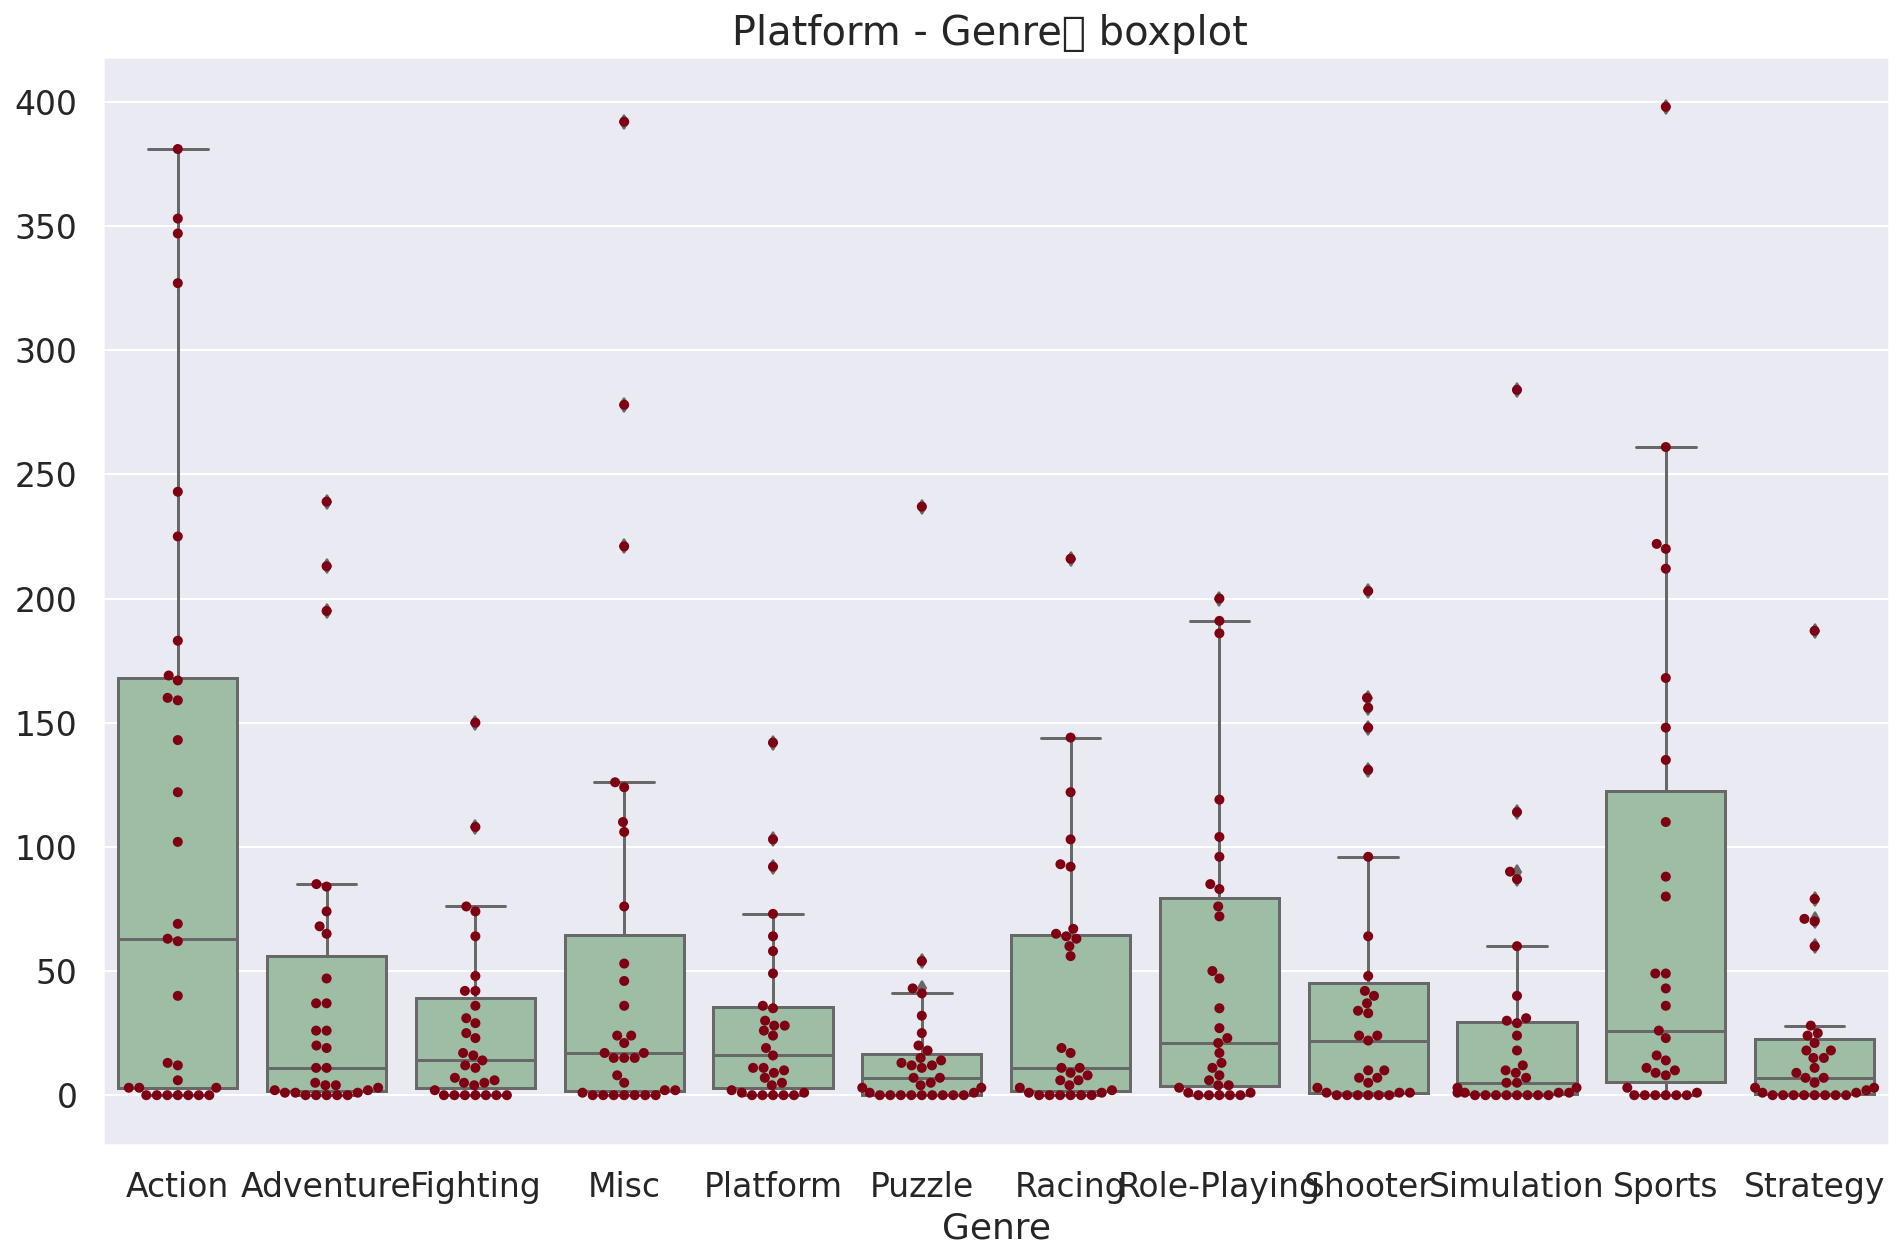

샘플데이터의 일원분산분석 결과 : F=4.4, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


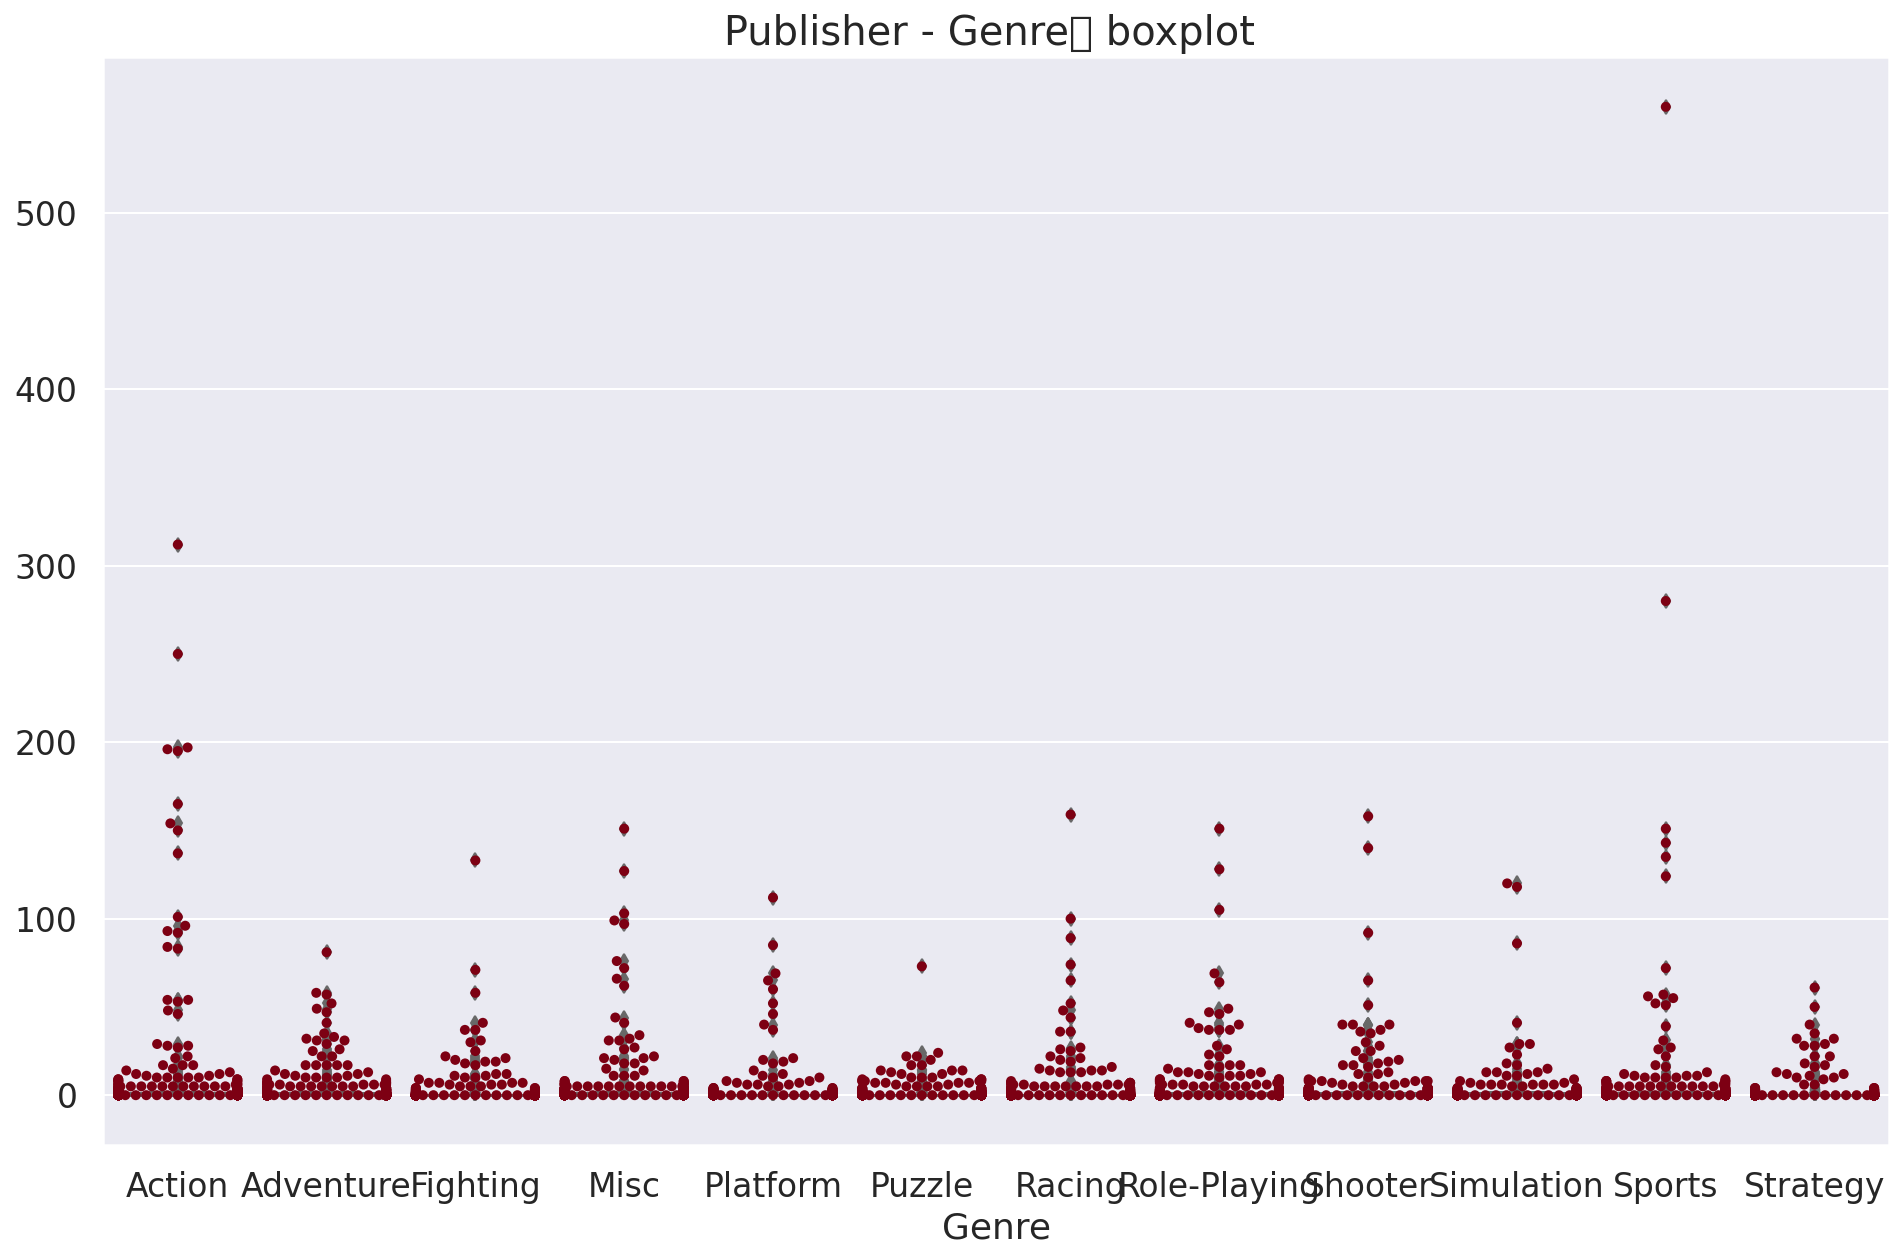

샘플데이터의 일원분산분석 결과 : F=5.4, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


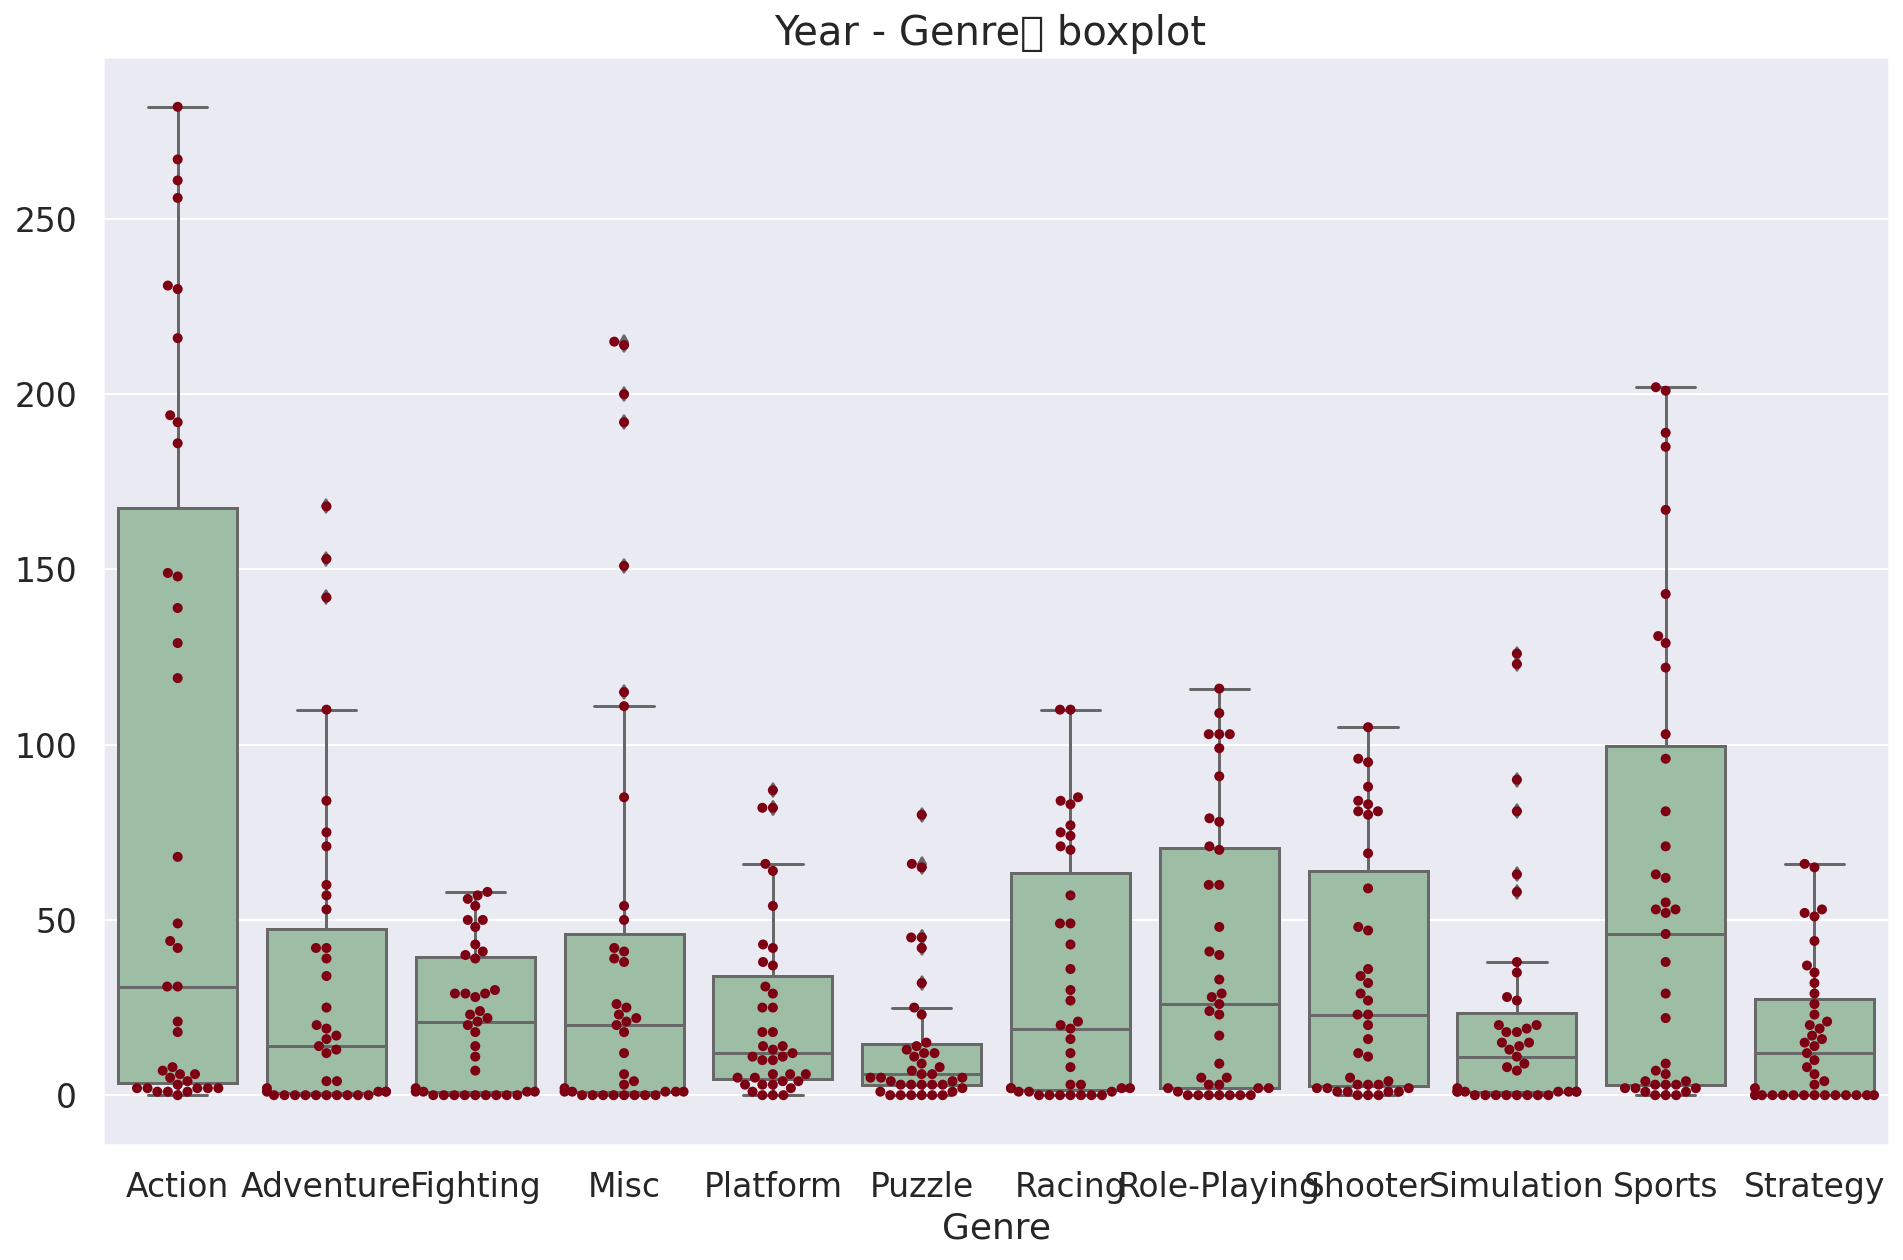

샘플데이터의 일원분산분석 결과 : F=7.1, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


In [ ]:
k = ['Platform','Publisher','Year']
PG = pd.crosstab(df_ca['Platform'],df_ca['Genre'])
PuG = pd.crosstab(df_ca['Publisher'],df_ca['Genre'])
YeG = pd.crosstab(df_ca['Year'],df_ca['Genre'])
l = [PG,PuG,YeG]
gg = ['Sports', 'Role-Playing', 'Action', 'Racing', 'Shooter', 'Misc', 'Adventure', 'Puzzle' ,'Simulation' ,'Platform' ,'Strategy', 'Fighting']
for i,x in zip(l,range(len(k))):
  plt.title("%s - Genre의 boxplot "%(k[x]), fontsize=20)
  bx = sns.boxplot(data=i,color='#99c2a2');
  bx = sns.swarmplot(data=i, color='#7d0013');
  plt.show();
  F_statistic, pVal = stats.f_oneway(i[gg[0]],i[gg[1]],i[gg[2]],i[gg[3]],i[gg[4]],i[gg[5]],i[gg[6]],i[gg[7]],i[gg[8]],i[gg[9]],i[gg[10]],i[gg[11]])
  print('샘플데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
  if pVal < 0.05:
      print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
      print('P-value값이 0.05보다 크므로 그룹의 평균값이 통계적으로 연관이 없다\n')

# 4. Conclusion

## 4-1. 지역에 따라 선호하는 게임 장르
  - 선호하는 게임이란?

  = 매출액이 높은 게임

### (1) 국가별 매출액 평균

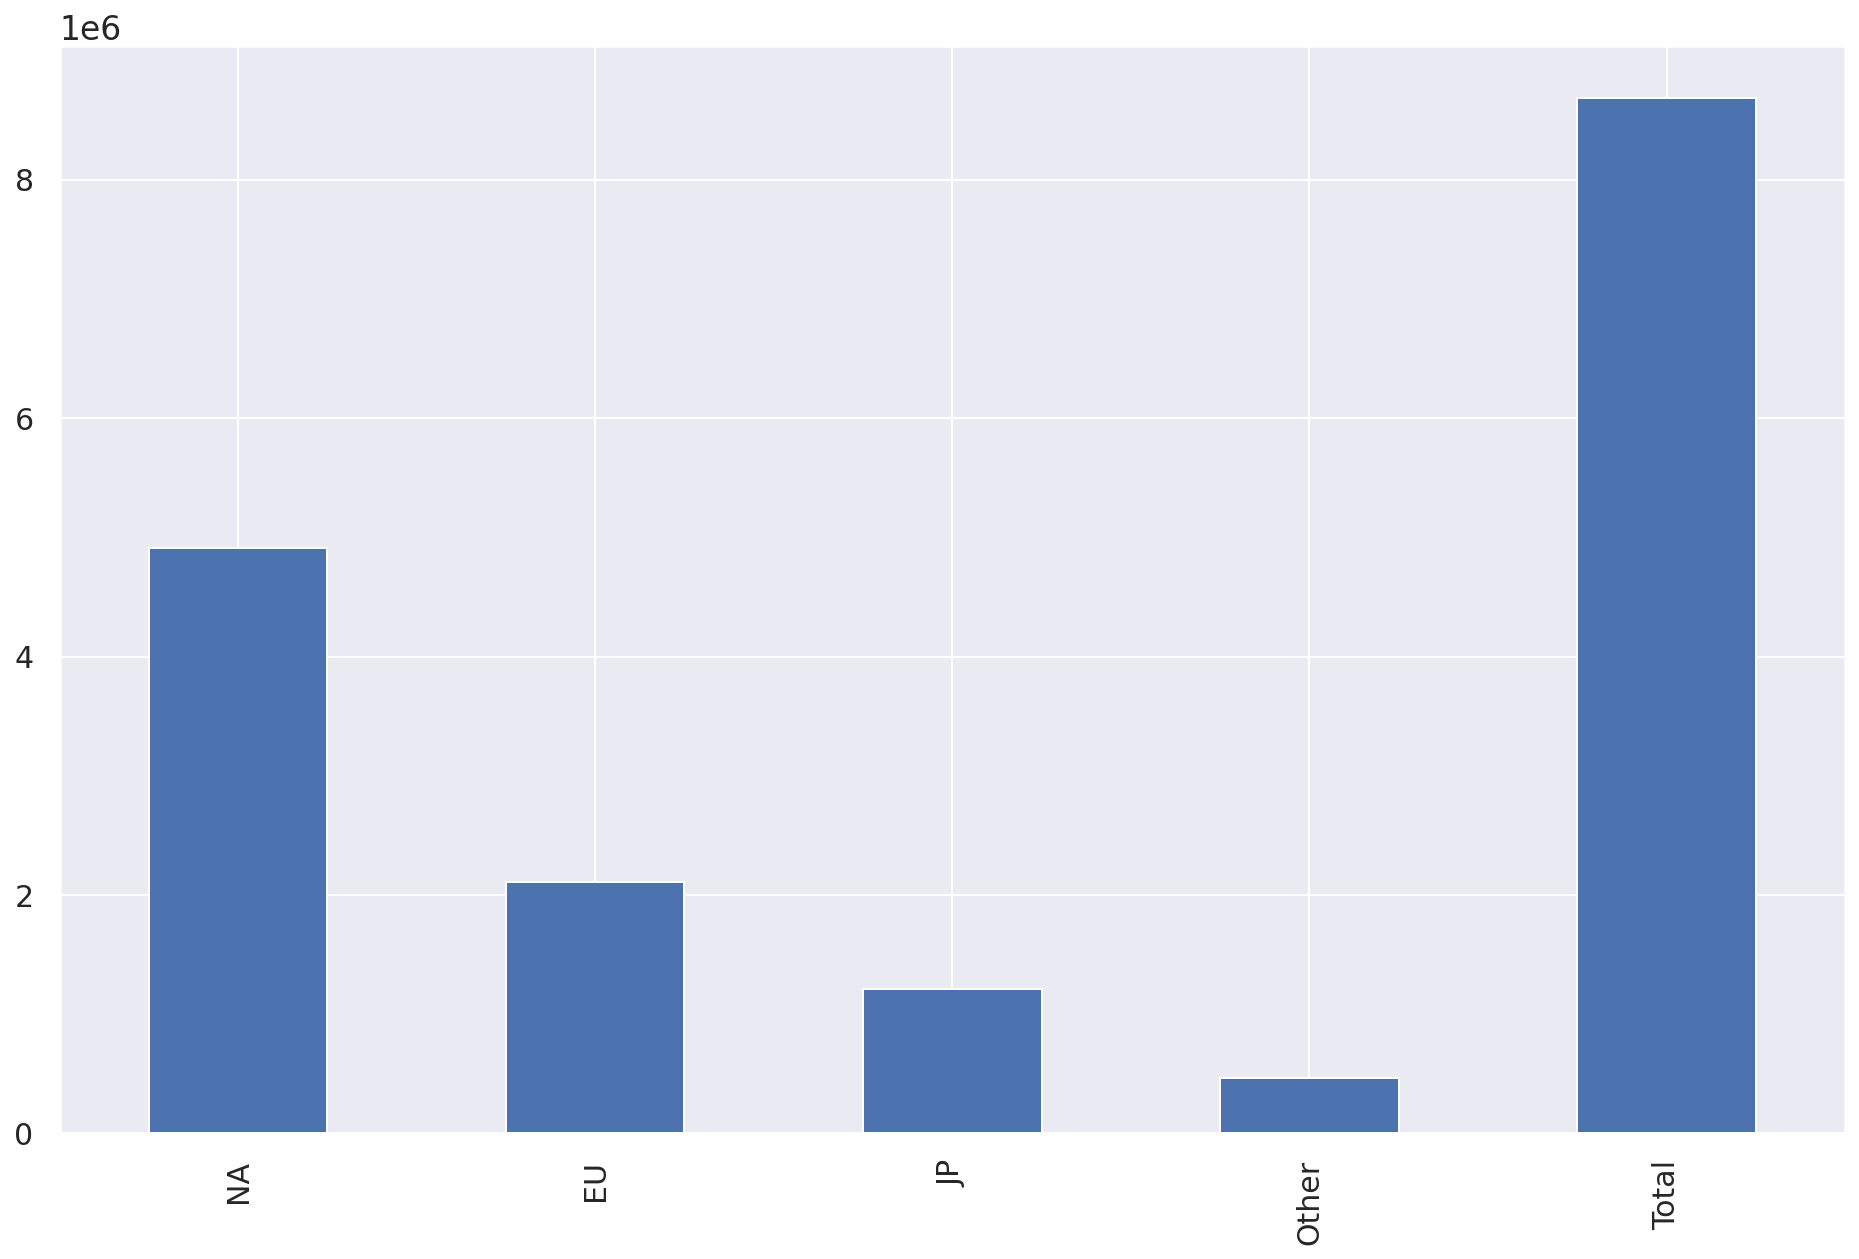

In [ ]:
Gen = df[['NA','EU','JP','Other','Total']].mean()

plt.rcParams['figure.figsize'] = [16, 10]
Gen.plot(kind='bar',fontsize = 15);

### (2) 지역별 매출액에 따른 시장점유율과 전체 매출액 확인

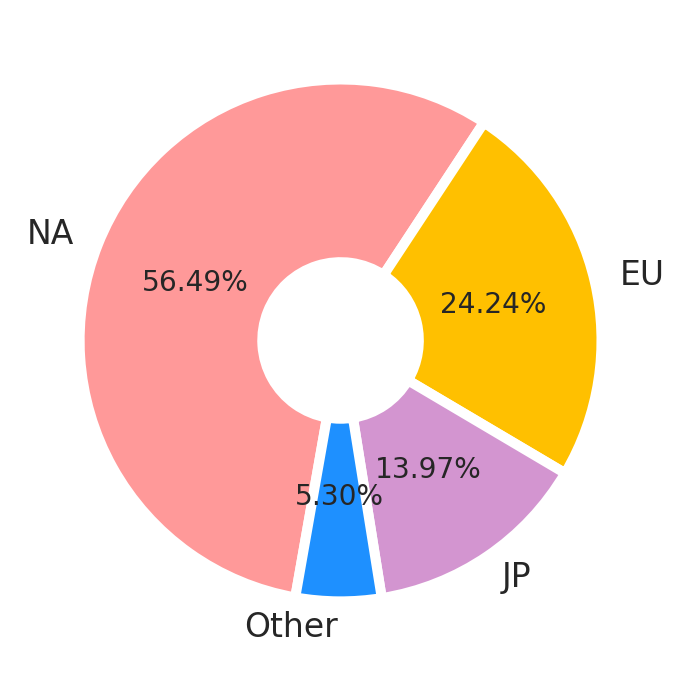

전세계의 매출액은 144151362681 달러이다
각 지역의 매출액 평균은 다음과 같다
NA:    $ 81424402949.00
EU:    $ 34938515285.00
JP:    $ 20144485059.00
Other: $  7643959388.00


전세계의 매출액 평균은 2171477.50 달러이다.
각 지역의 매출액 평균은 다음과 같다
NA:    $ 4906266.75
EU:    $ 2105237.12
JP:    $ 1213815.68
Other: $  460590.47


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(14,6))
mpl.rcParams['font.size'] = 14

nation_sum = [df['NA'].sum(), df['EU'].sum(), df['JP'].sum(), df['Other'].sum()]
nation_mean = [df['NA'].mean(), df['EU'].mean(), df['JP'].mean(), df['Other'].mean()]
labels = ['NA','EU','JP','Other']
colors = ['#ff9999', '#ffc000', '#d395d0', 'dodgerblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

ax.pie(nation_sum, labels=labels, autopct='%.2f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show();

print('전세계의 매출액은 %d 달러이다\n각 지역의 매출액 평균은 다음과 같다' %(sum(nation_sum)))
print('NA:    $ %.2f' %(nation_sum[0]))
print('EU:    $ %.2f' %(nation_sum[1]))
print('JP:    $ %.2f' %(nation_sum[2]))
print('Other: $  %.2f\n\n' %(nation_sum[3]))

print('전세계의 매출액 평균은 %.2f 달러이다.\n각 지역의 매출액 평균은 다음과 같다' %(np.mean(nation_mean)))
print('NA:    $ %.2f' %(nation_mean[0]))
print('EU:    $ %.2f' %(nation_mean[1]))
print('JP:    $ %.2f' %(nation_mean[2]))
print('Other: $  %.2f' %(nation_mean[3]))

### (3) 각 나라별 매출이 높았던 게임 장르 TOP3
- 각 나라별 매출액 총합을 장르별로 매겼습니다.
- 장르별로 매출액에 따른 순위를 매기고 Top3만 출력

In [ ]:
Country = df.groupby(['Genre']).sum()
Country_total = Country[['Total']].T
Country_total = Country_total.apply(np.argsort, axis=1)

Country = Country.drop(['Year','Total'], axis = 1).T
Country = Country.apply(np.argsort, axis=1)
Country

Genre  Action  Adventure  Fighting  Misc  ...  Shooter  Simulation  Sports  Strategy
NA          5          1        11     2  ...        6          10       8         0
EU         11          1         5     9  ...       10           8       0         4
JP          5          8         1     6  ...        2           0      10         7
Other       5          9         1    11  ...        8          10       0         7

[4 rows x 12 columns]

In [ ]:
C_rank = Country.columns[Country.values[:,::-1]]
C_rankT = Country_total.columns[Country_total.values[:,::-1]]
Country[['1순위','2순위','3순위']] = pd.DataFrame(C_rank[:,:3], index = Country.index)
Country_total[['1순위','2순위','3순위']] = pd.DataFrame(C_rankT[:,:3], index = Country_total.index)
Country = Country[['1순위','2순위','3순위']]
Country = Country.T
Country_total = Country_total[['1순위','2순위','3순위']]
Country_total = Country_total.T
Country = pd.concat([Country,Country_total],axis=1)
Country

NA        EU            JP         Other    Total
Genre                                                        
1순위     Action  Platform  Role-Playing  Role-Playing   Action
2순위    Shooter    Action        Sports        Action  Shooter
3순위     Sports   Shooter        Action        Sports   Sports

### (4) 각 나라별 선호하는 게임 장르 (시장점유율)
- NA의 가장 선호하는 게임은 Action -Shooter - Sports
- EU의 가장 선호하는 게임은 Platform - Action - Shooter
- JP의 가장 선호하는 게임은 Role_Playing - Sports - Action
- Other의 가장 선호하는 게임은 Role_Playing - Action - Sports 순이다

각 나라의 TOP3의 시장 점유율을 파악하고자 한다

In [ ]:
Country = df.groupby(['Genre']).sum()
print(Country.index)
Country = Country.drop(['Year'], axis = 1)
NA, EU, JP, Other = Country, Country, Country, Country

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')


In [ ]:
# NA : Action -Shooter - Sports
NA.loc['Others'] = NA.loc[['Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Simulation', 'Strategy']].sum()
NA = NA.loc[['Action','Shooter','Sports','Others'],['NA']]

# EU : Platform - Action - Shooter
EU.loc['Others'] = EU.loc[['Adventure', 'Fighting', 'Misc', 'Puzzle', 'Racing', 'Role-Playing', 'Simulation', 'Sports', 'Strategy']].sum()
EU = EU.loc[['Platform','Action','Shooter','Others'],['EU']]

# JP : Role_Playing - Sports - Action
JP.loc['Others'] = JP.loc[['Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Shooter', 'Simulation', 'Strategy']].sum()
JP = JP.loc[['Role-Playing', 'Sports','Action','Others'],['JP']]

# Other : Role_Playing - Action - Sports
Other.loc['Others'] = Other.loc[['Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Shooter', 'Simulation', 'Strategy']].sum()
Other = Other.loc[['Role-Playing','Action','Sports','Others'],['Other']]

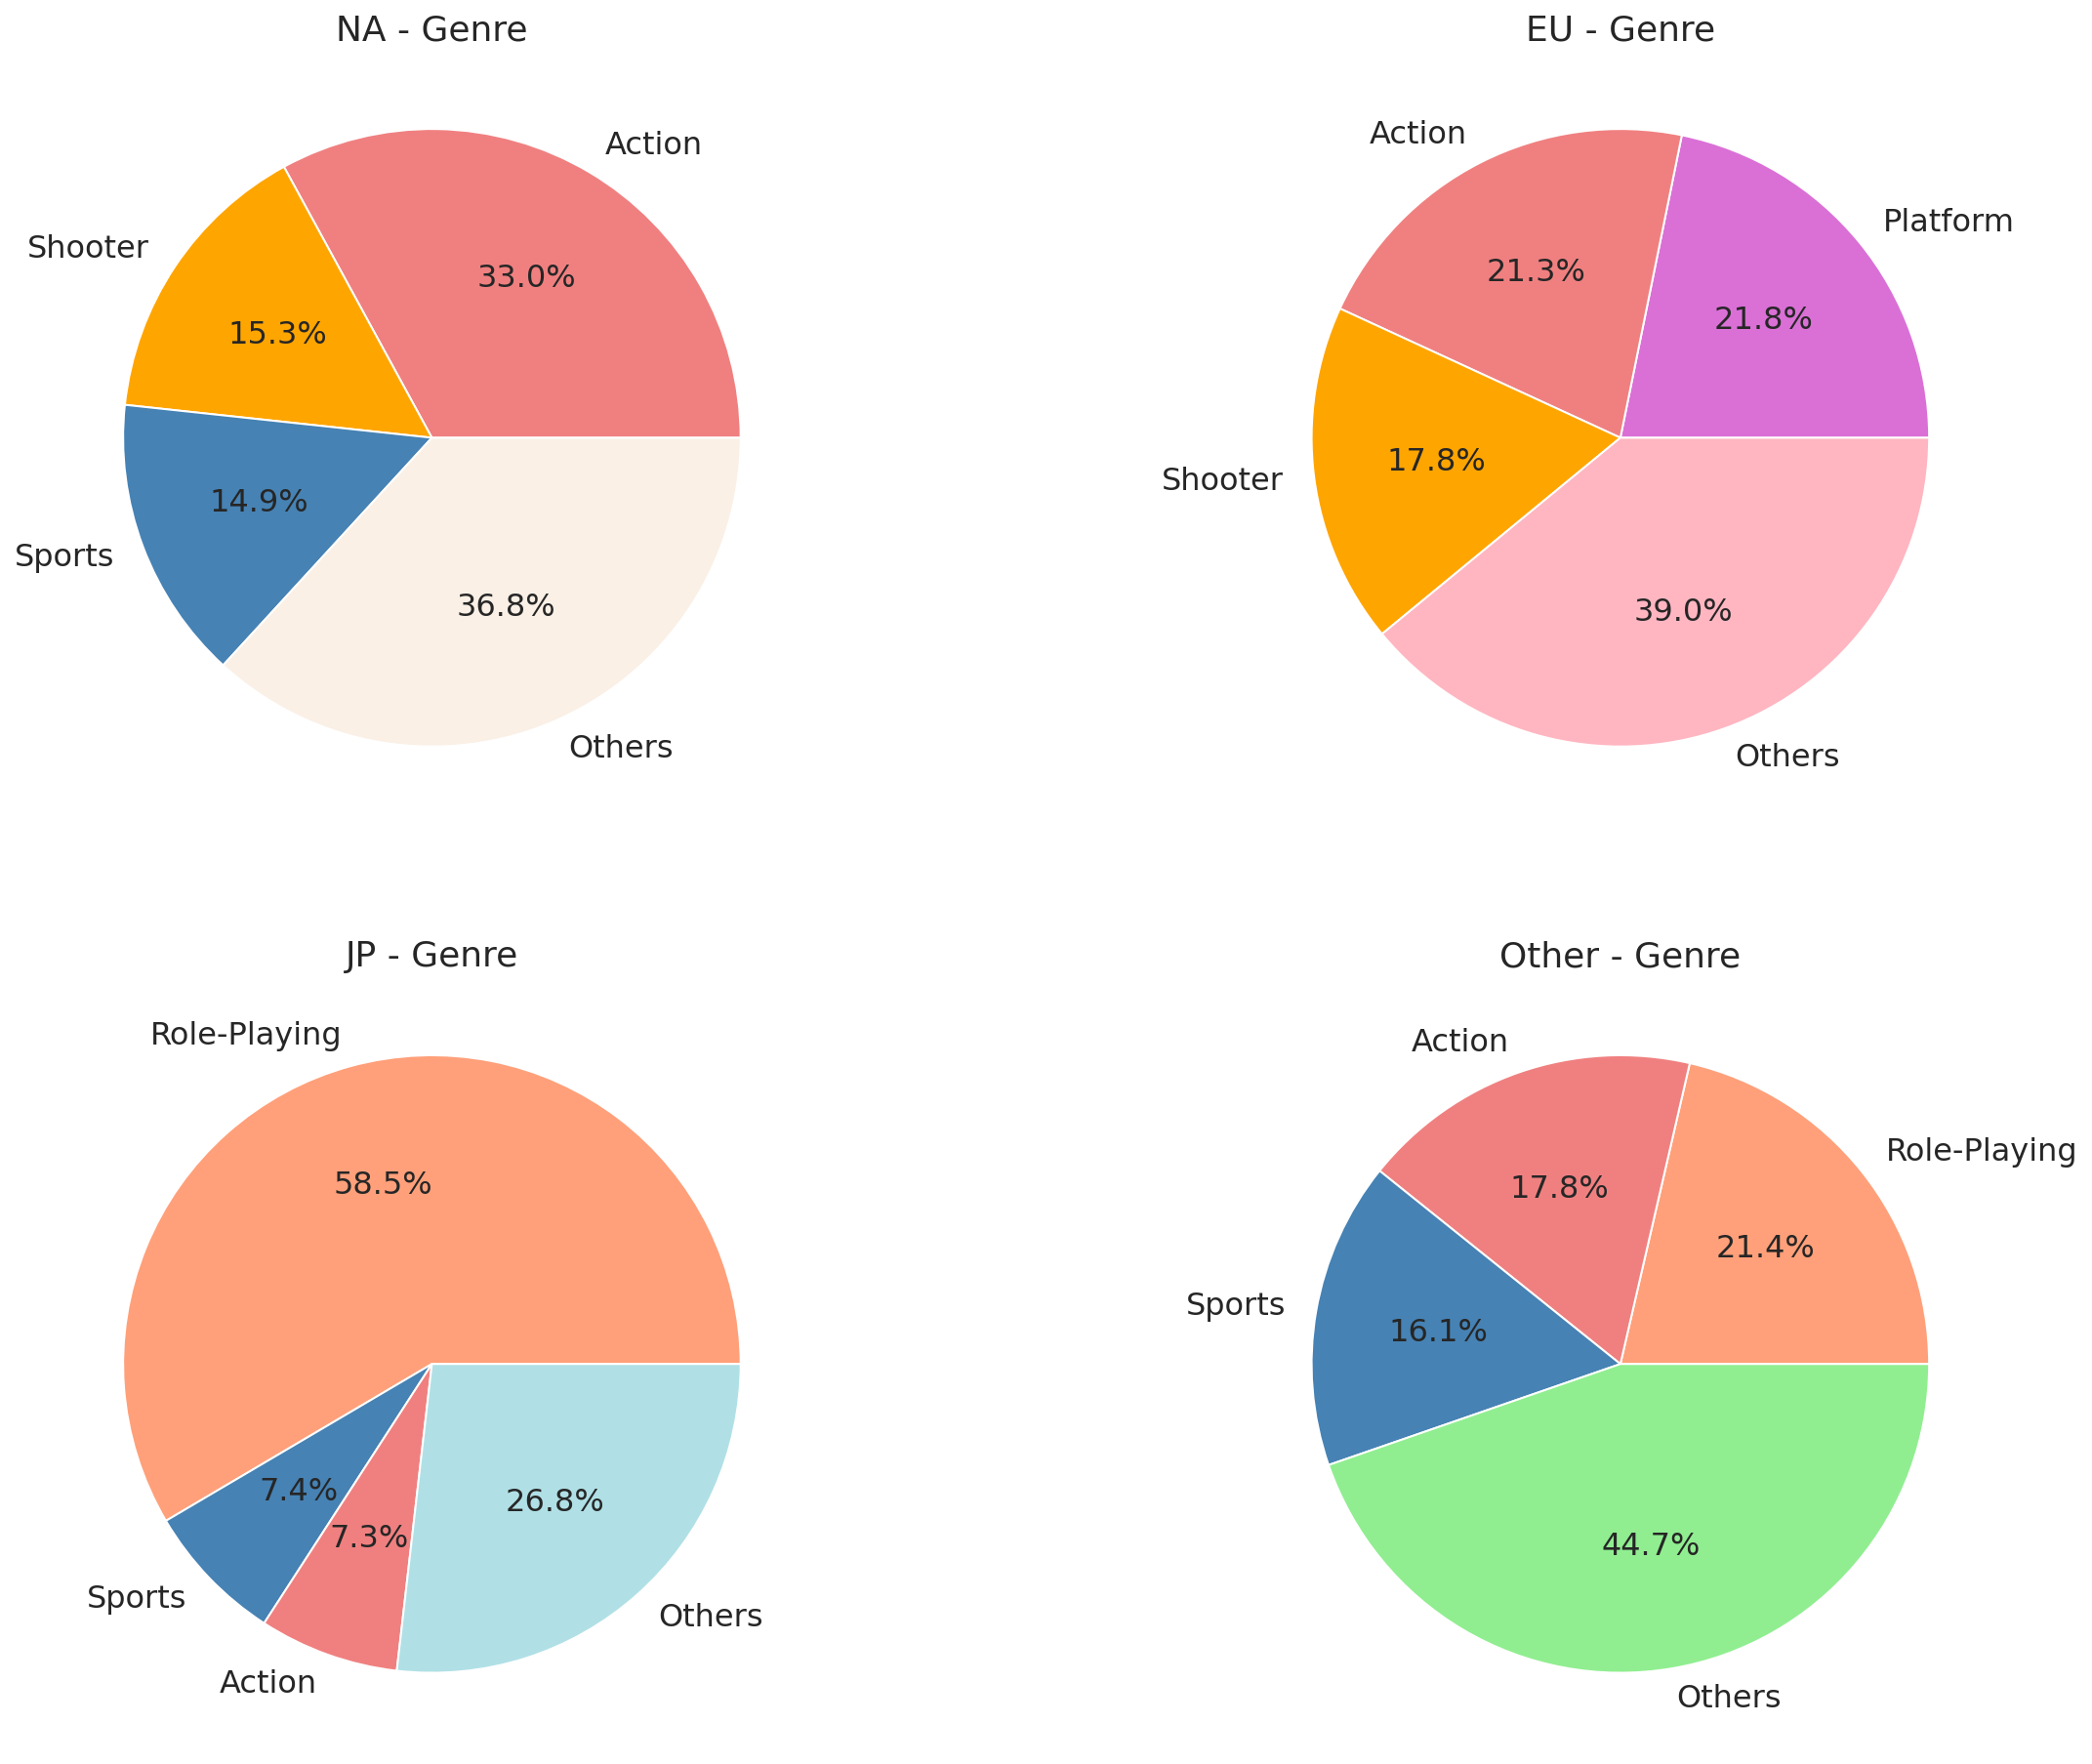

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(20, 16))

na = list(NA.index)
cna = ['lightcoral','orange','steelblue','linen']
ax[0][0].pie(NA, autopct='%1.1f%%',labels=na,textprops={'fontsize': 16},colors=cna)
ax[0][0].set_title('NA - Genre')

eu = list(EU.index)
ceu = ['orchid','lightcoral','orange','lightpink']
ax[0][1].pie(EU, autopct='%1.1f%%',labels=eu,textprops={'fontsize': 16},colors=ceu)
ax[0][1].set_title('EU - Genre')

jp = list(JP.index)
cjp = ['lightsalmon','steelblue','lightcoral','powderblue']
ax[1][0].pie(JP, autopct='%1.1f%%',labels=jp,textprops={'fontsize': 16},colors=cjp)
ax[1][0].set_title('JP - Genre')

other = list(Other.index)
cot = ['lightsalmon','lightcoral','steelblue','lightgreen']
ax[1][1].pie(Other, autopct='%1.1f%%',labels=other,textprops={'fontsize': 16},colors=cot)
ax[1][1].set_title('Other - Genre')

plt.show();

## 4-2. 연도별 게임 트렌드
  - 인기있는 게임이란?
   
   = 해당연도 매출이 높았다
   
   = 해당연도 게임트렌드였다
   
   ≠ 해당연도 출시된 게임의 수

### (1) 연도별 플랫폼별 매출액

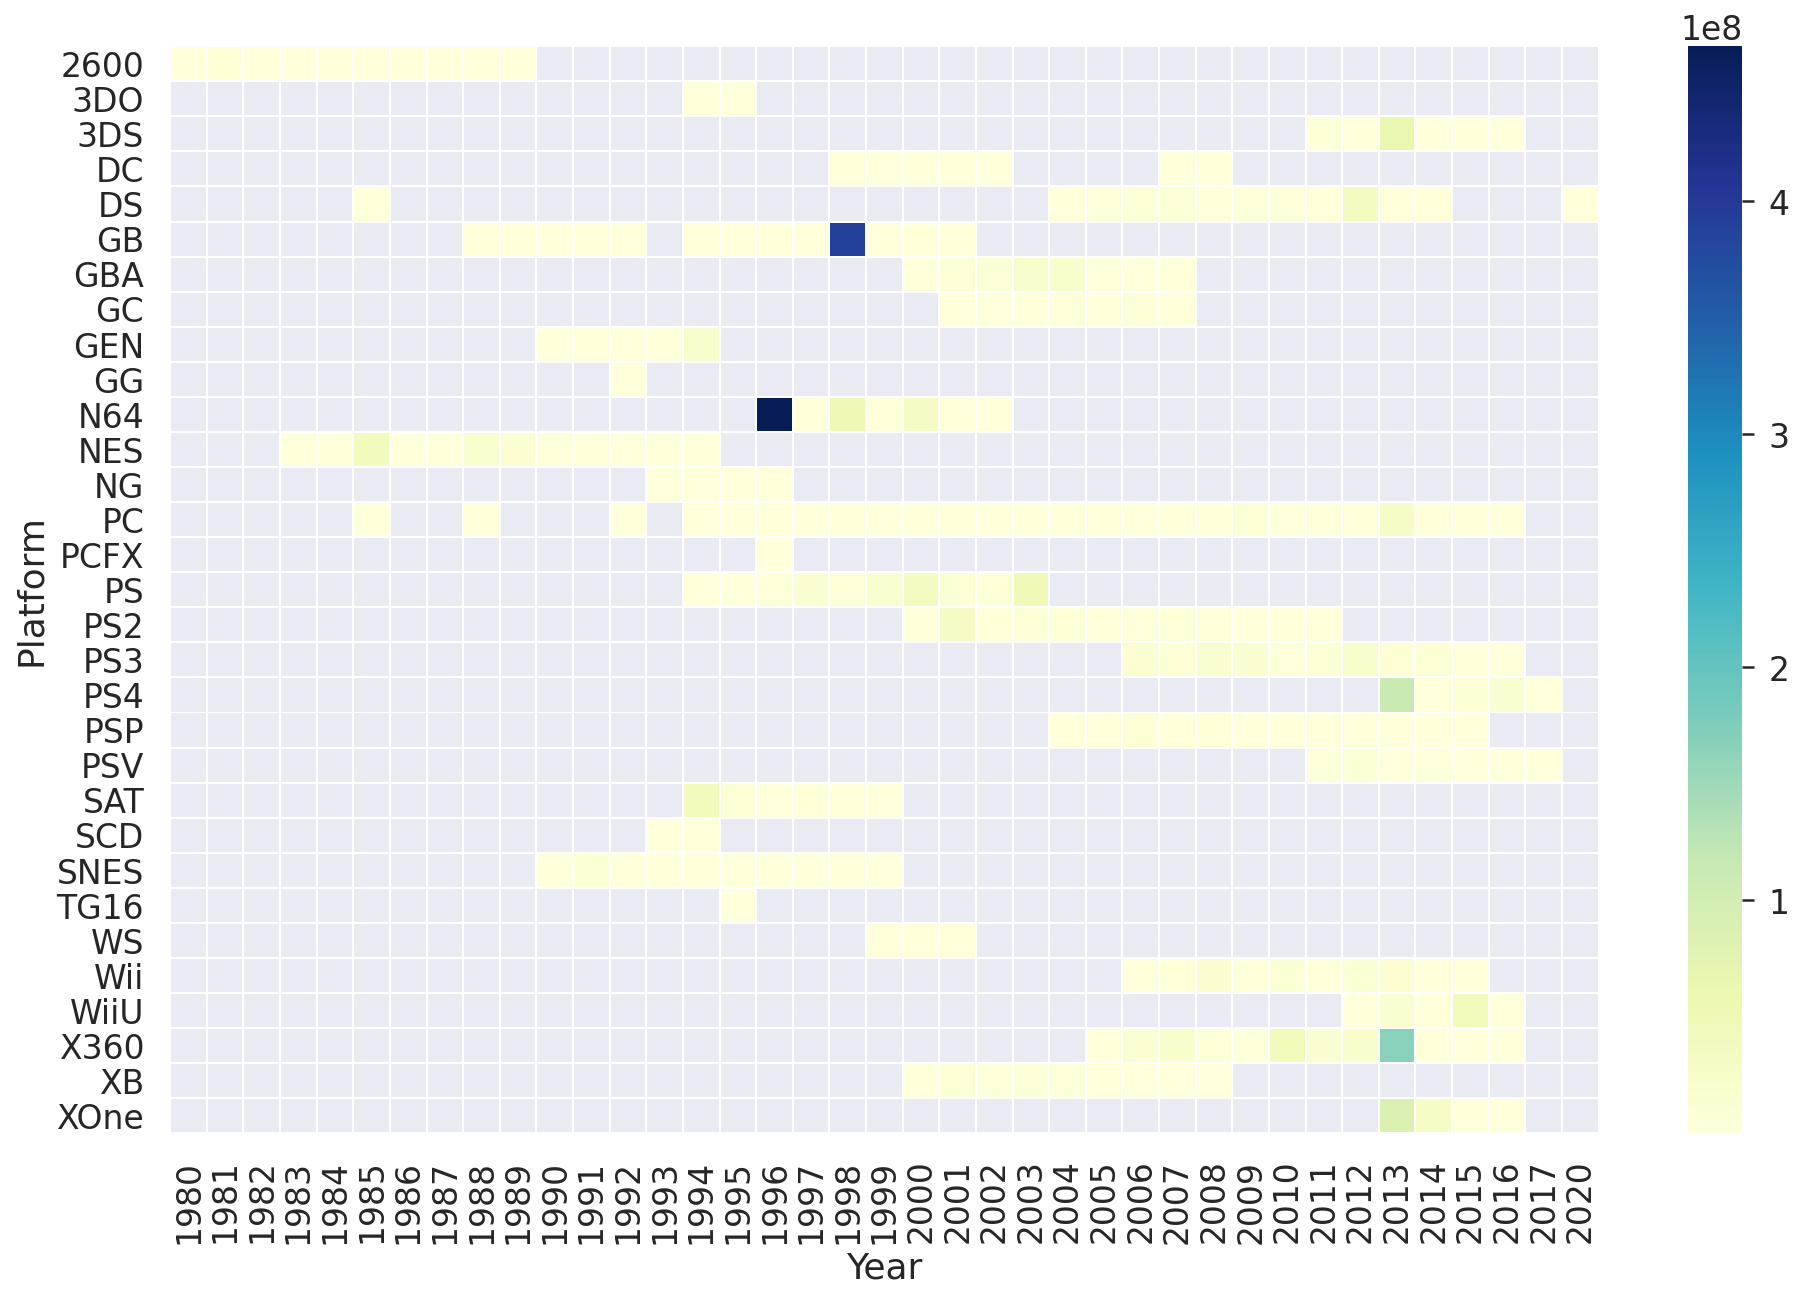

In [ ]:
year_Pl = pd.pivot_table(df, index = 'Platform', columns='Year', values='Total')
ax = sns.heatmap(year_Pl,linewidths=.5, cmap="YlGnBu")

- 게임을 지원하는 플랫폼 수명이 있다는 것을 알 수 있다.
- PC플랫폼으로 할 수 있는 게임을 가장 오랫동안 출시하고 있다
- 2000년대를 기준으로 그 이전에는 특정 플랫폼 몇개에서만 게임을 독점했다

### (2) 연도별 장르별 게임 출시 갯수

In [ ]:
GY = pd.crosstab(df['Genre'],df['Year'])
pd.crosstab(df['Genre'], df['Year'], margins=True).style.background_gradient(cmap='summer_r')

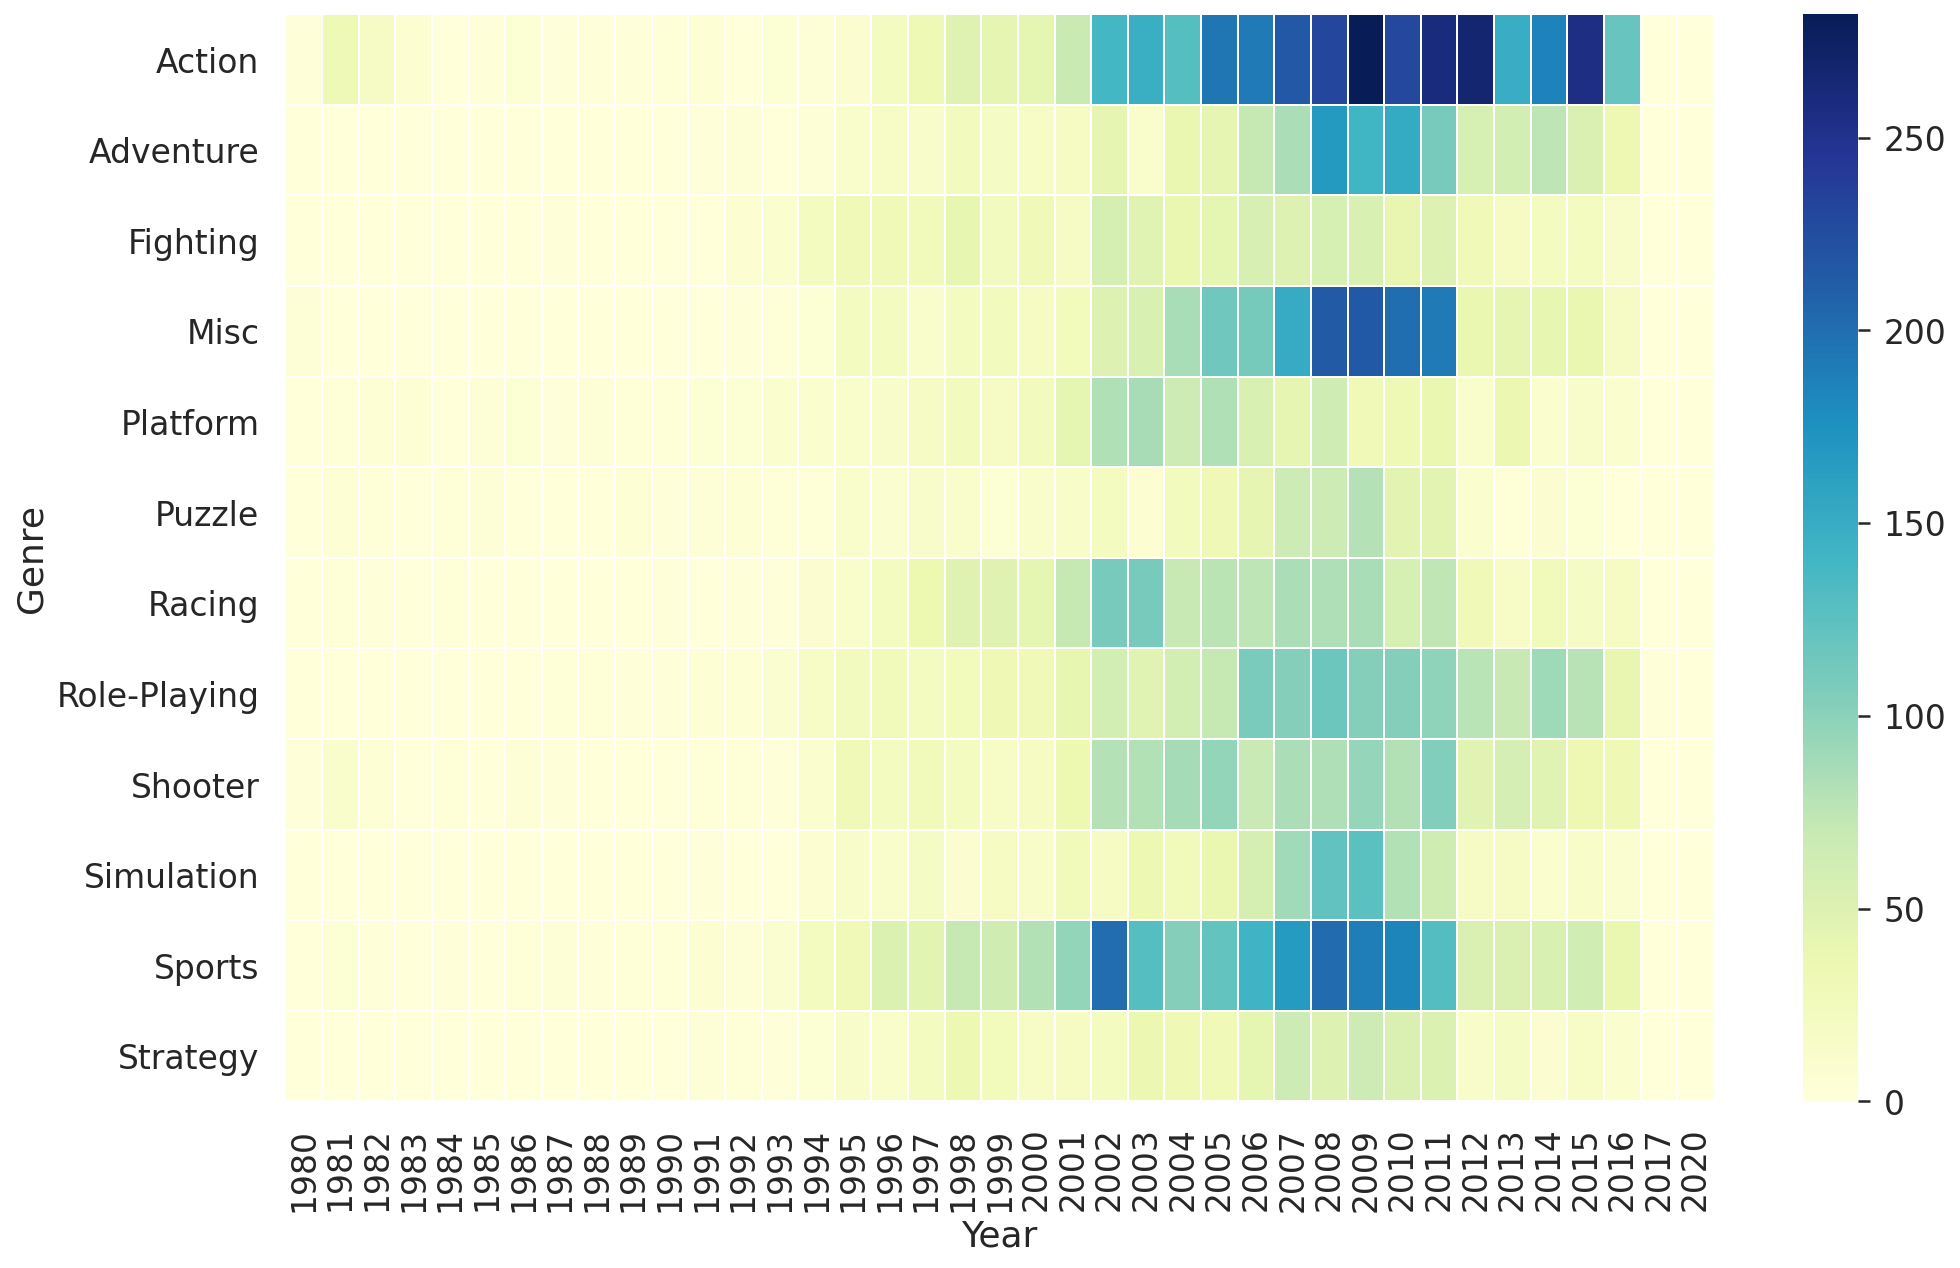

In [ ]:
ax = sns.heatmap(GY,linewidths=.5, cmap="YlGnBu")

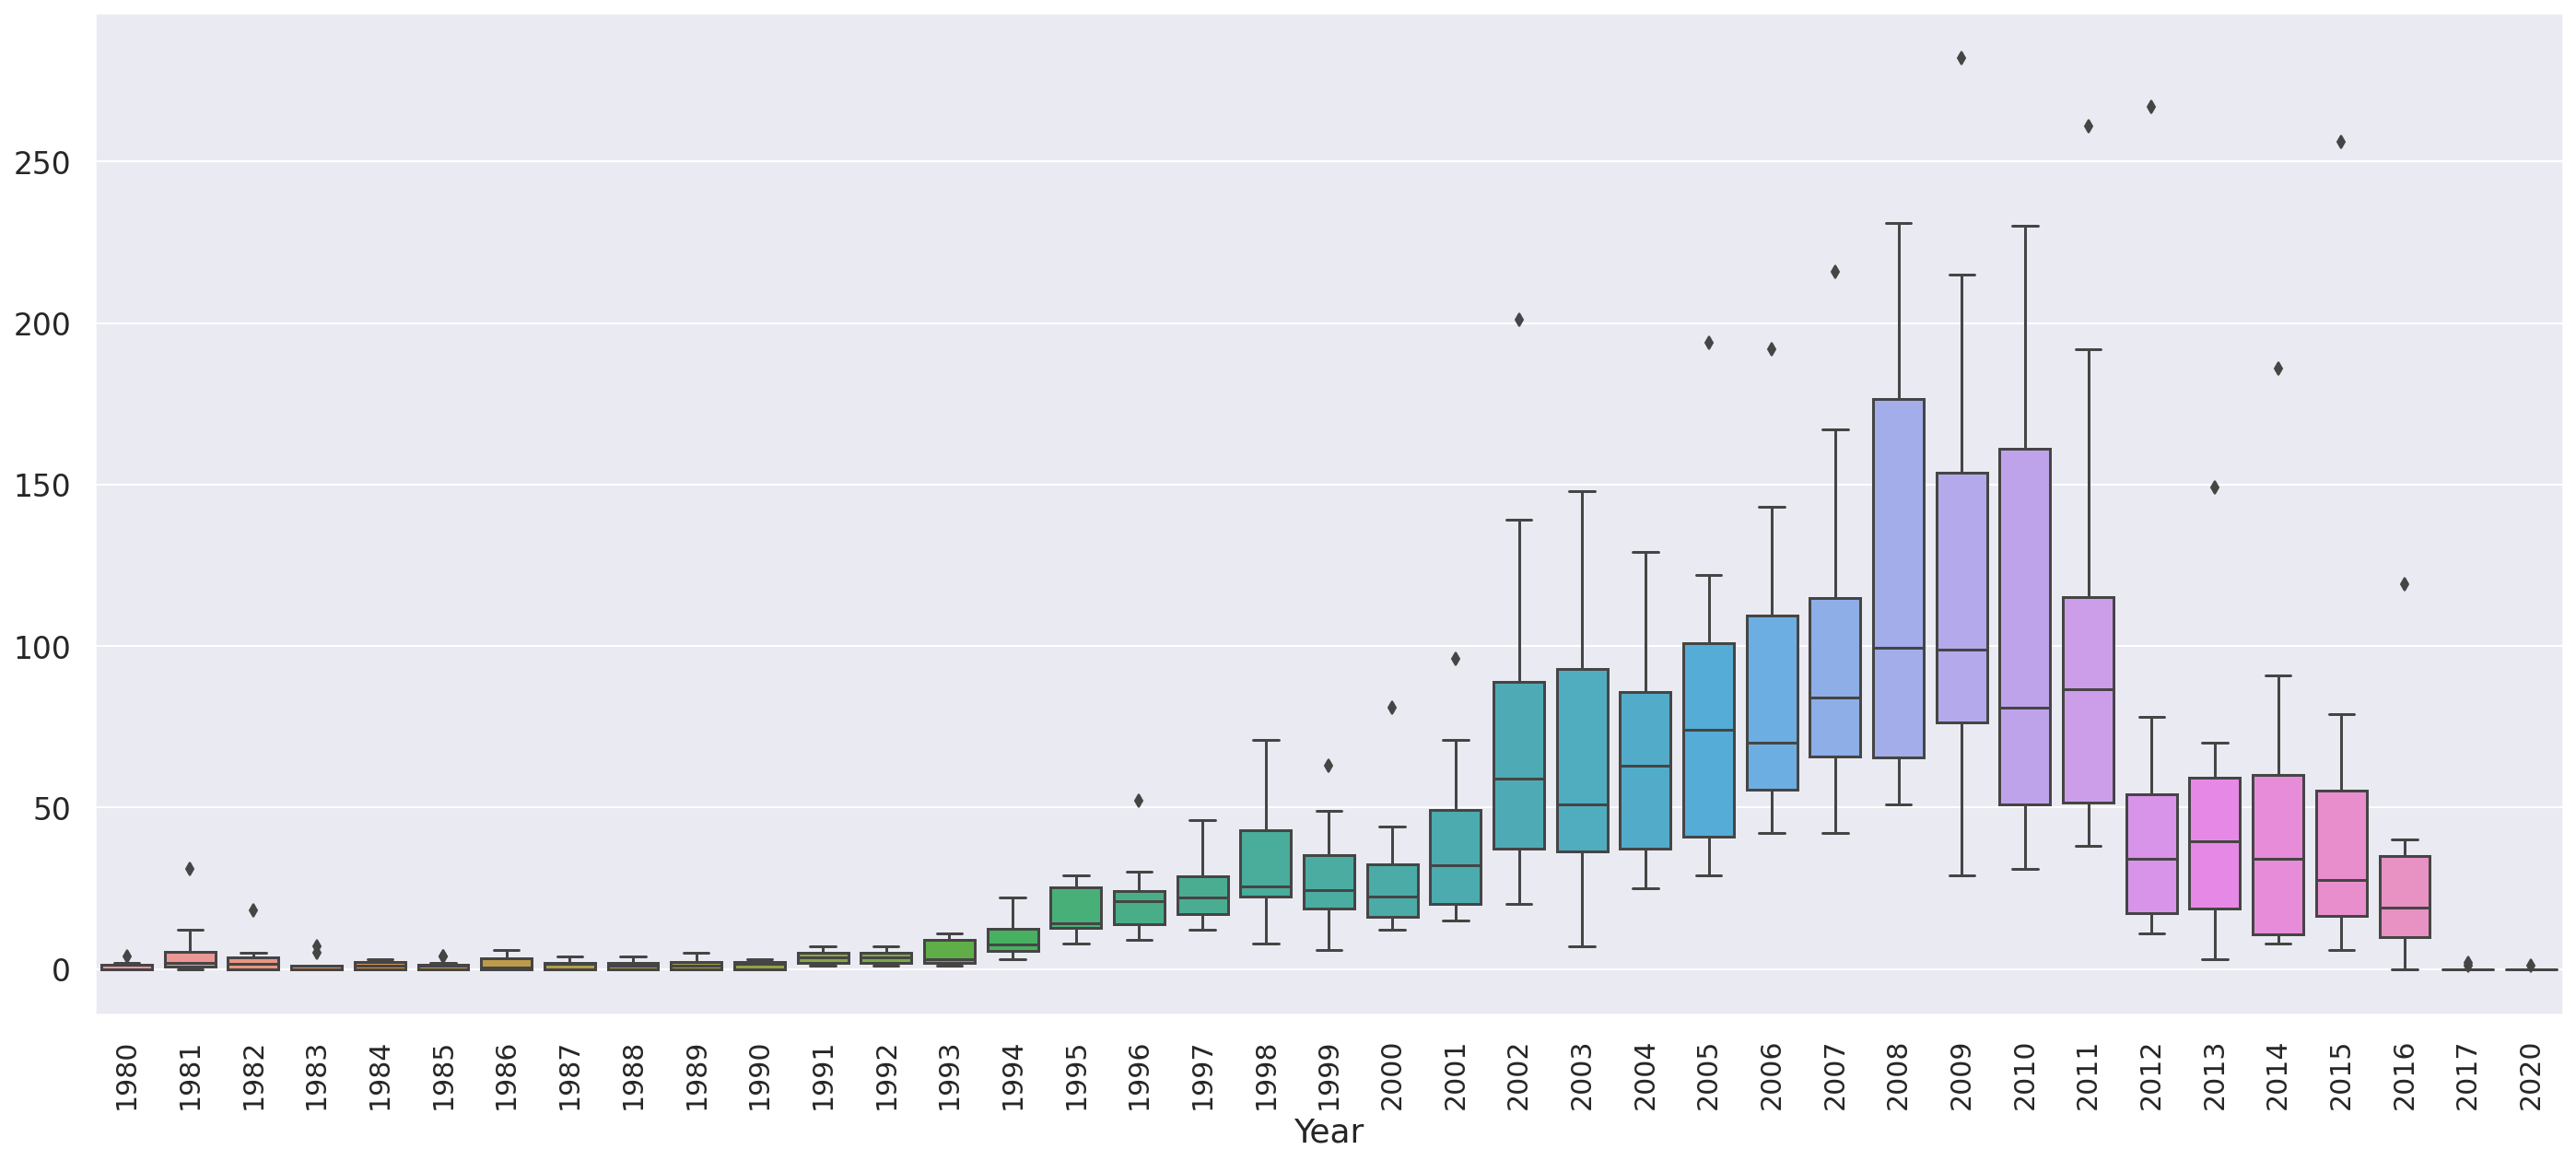

In [ ]:
f, ax = plt.subplots(1,1, figsize = (24,10))
ax = sns.boxplot(data=GY)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15, rotation=90)
plt.show();

### (3) 연도별 매출액이 높았던 게임 장르 TOP3

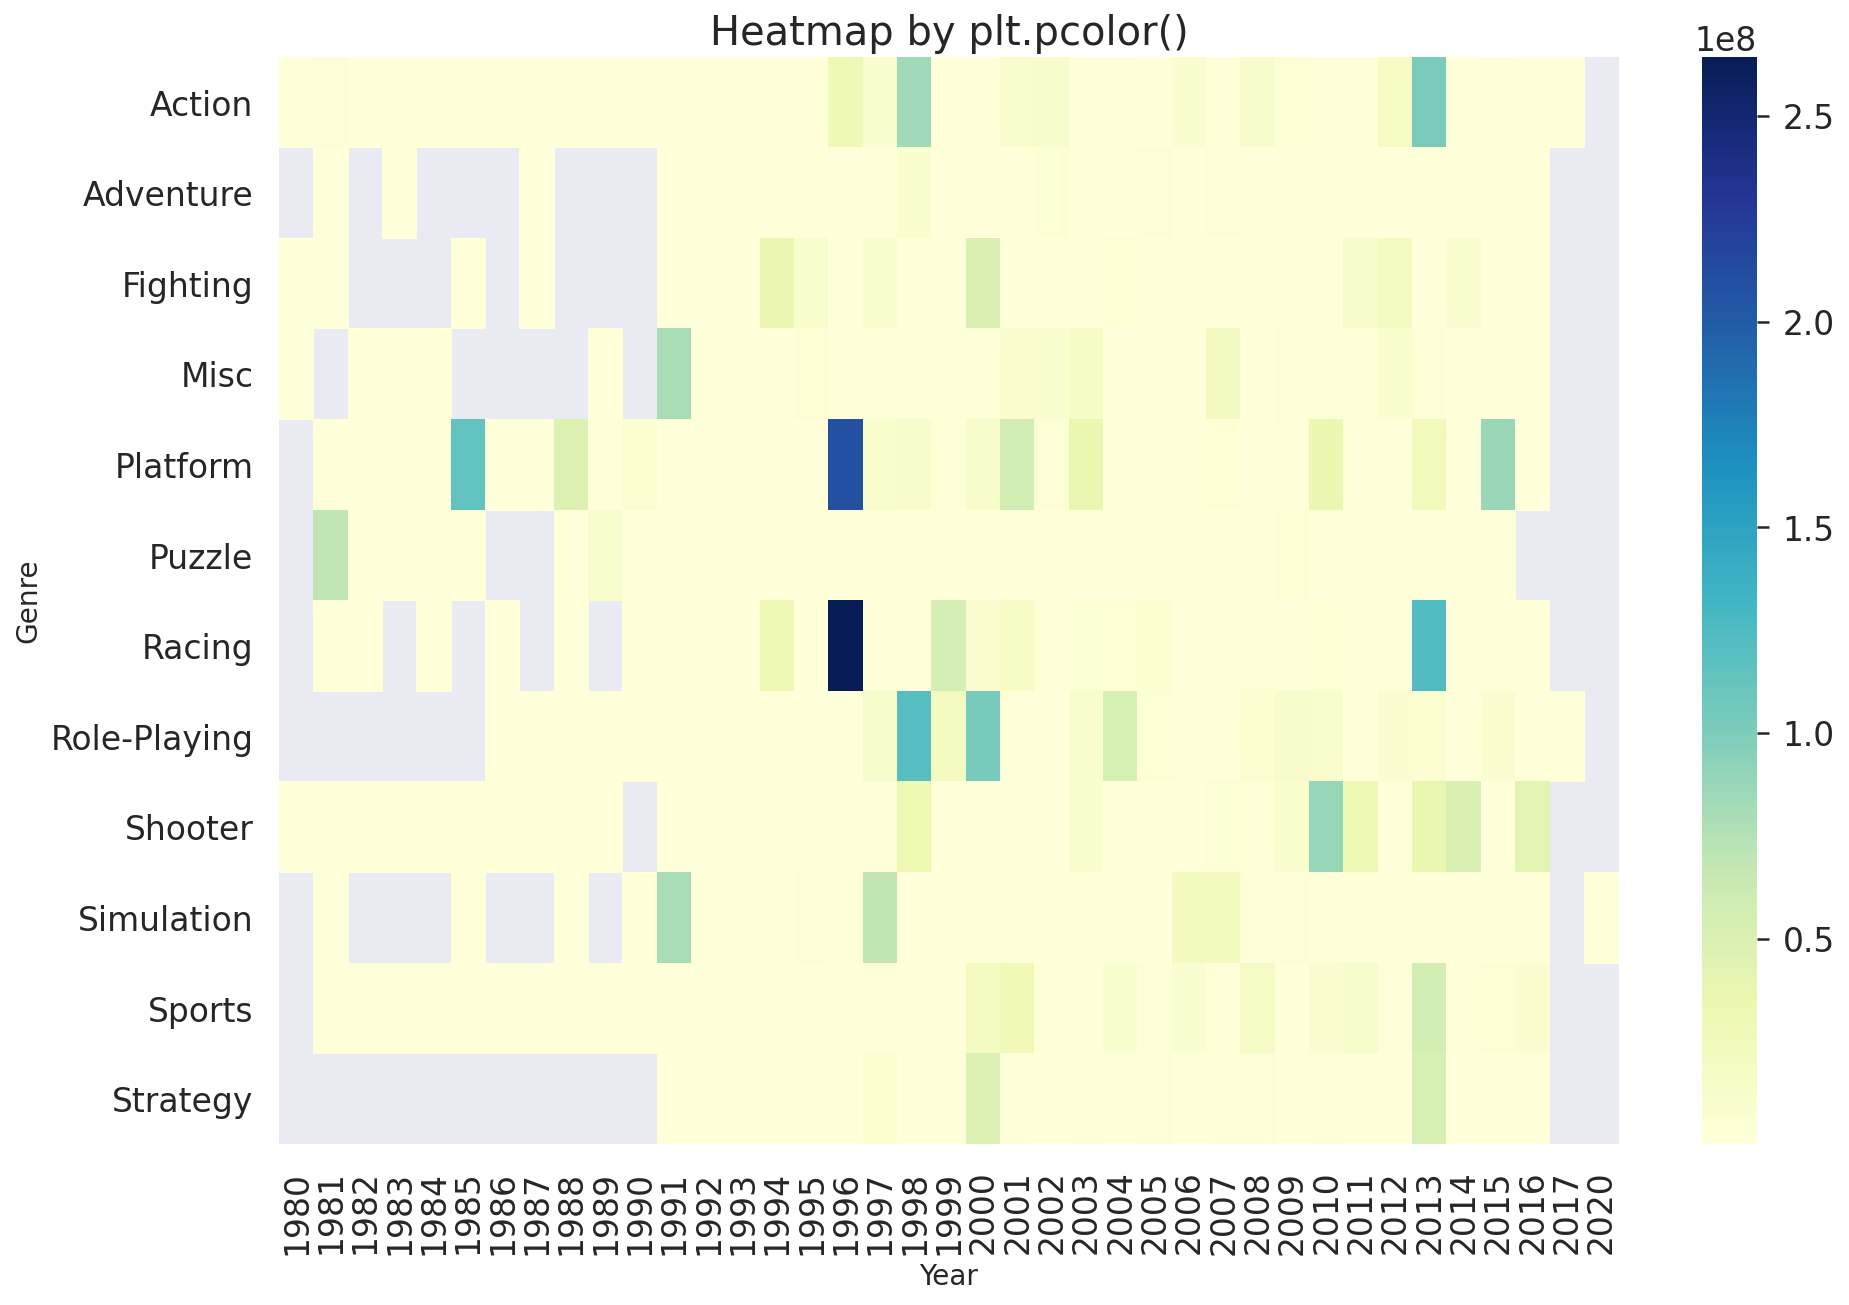

In [ ]:
YG = pd.pivot_table(df, index = 'Genre', columns='Year', values = 'Total')
YG

plt.rcParams['figure.figsize'] = [15, 10] # 
sns.heatmap(YG, cmap='YlGnBu')

plt.xticks(np.arange(0.5, len(YG.columns), 1), YG.columns)
plt.yticks(np.arange(0.5, len(YG.index), 1), YG.index)
plt.title('Heatmap by plt.pcolor()', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Genre', fontsize=14)

plt.show();

In [ ]:
Year = pd.pivot_table(df, index = 'Year', columns='Genre', values='Total')
Year

Genre       Action  Adventure    Fighting  ...  Simulation      Sports    Strategy
Year                                       ...                                    
1980        424.50        nan      773.00  ...         nan         nan         nan
1981    3549057.10    1303.00      476.00  ...      446.00      247.17         nan
1982        366.28        nan         nan  ...         nan      533.00         nan
1983        413.71     406.00         nan  ...         nan     3200.00         nan
1984       1850.00        nan         nan  ...         nan     3085.00         nan
1985       1764.50        nan     1059.00  ...       46.00     1960.00         nan
1986       2293.00        nan         nan  ...         nan  1001863.00         nan
1987        559.50    4380.00     2710.00  ...         nan      934.25         nan
1988        873.00        nan         nan  ...       36.00     1803.00         nan
1989       2326.50        nan         nan  ...         nan     1906.67         nan
1990       2130.00        nan         nan  ...     1130.00      709.33         nan
1991       1357.40    2623.00      399.00  ... 80000999.50      352.00      244.00
1992       3840.00    3066.00     2179.14  ...     2143.00      745.00      128.00
1993     500307.67      79.00      803.09  ...      199.00      361.67      412.50
1994        394.25    1691.75 35000357.36  ...      395.43  2727659.91      602.50
1995        452.00      63.15 11724644.03  ...  3786014.36   103729.90      473.14
1996   29048736.81     428.71      706.33  ...  3077796.15  2173472.17   500723.00
1997    8710562.29     360.57  8571845.82  ... 68947810.79  1087612.65  6333701.05
1998   83674244.41 9720366.00      849.51  ...     1267.12   563992.79    86276.71
1999     786424.90     405.42   125600.75  ...      577.65   524296.89      715.58
2000     137138.98     191.00 50000652.86  ...      229.87 20494357.21 46875490.50
2001   11912676.32     452.05   167675.56  ...  1072129.96 27813043.40  1650381.05
2002   13310033.83 5476510.50    52217.14  ...   150564.55  2985474.82      510.17
2003    2966693.91     181.67   833847.46  ...      609.77   178788.30  2703000.89
2004    2892147.64     226.44  5128710.44  ...      518.44  9350160.96   312727.69
2005     531392.10 4047822.95      462.14  ...     1301.42  2098851.01  3448461.72
2006    8333749.66  422703.20   946836.48  ... 23034839.66  8623359.76   204655.50
2007    2574611.26 3845567.49      478.60  ... 23367290.88  2587489.22  1969933.76
2008   12944315.69  119239.64   351502.91  ...  1301246.29 17322256.65  3196322.71
2009    4879966.28 1141018.19   926525.87  ...  3889183.71   842034.24    92598.69
2010    1361435.16  346559.69      451.57  ...   407759.75  7530273.31  2000321.70
2011    2333859.77   27425.35 13400434.82  ...    47882.10 13153162.65      192.29
2012   19251424.09   52742.77 19758932.86  ...      747.11  1132662.28      229.40
2013  102168644.01  550117.37      515.55  ...      487.56 56415883.45 53158337.00
2014     425266.99  666793.76  8696479.09  ...      509.09  2364486.04      129.12
2015    1750327.07  490723.87   952897.90  ...   200378.80  4887765.58      113.76
2016     664063.10  176619.47   214564.36  ...   333385.33  7368961.55   300058.90
2017         19.00        nan         nan  ...         nan         nan         nan
2020           nan        nan         nan  ...     3293.00         nan         nan

[39 rows x 12 columns]

In [ ]:
Year = Year.fillna(0) #-1은 nan값
Year = Year.apply(np.argsort, axis=1)
Year_rank = Year.columns[Year.values[:,::-1]]

In [ ]:
Year[['1순위','2순위','3순위']] = pd.DataFrame(Year_rank[:,:3], index = Year.index)
Year = Year[['1순위','2순위','3순위']]
Year = Year.T
Year[2017][2] = '-'
# Year[2020][1:] = '-'
Year

Year       1980     1981      1982  ...          2016          2017        2020
Genre                               ...                                        
1순위     Shooter   Puzzle    Puzzle  ...       Shooter  Role-Playing  Simulation
2순위        Misc   Action  Platform  ...        Sports        Action    Strategy
3순위    Fighting  Shooter      Misc  ...  Role-Playing             -      Sports

[3 rows x 39 columns]

### (4) 연도별 출시된 게임의 개수로 확인하는 게임트렌드
연도별로 게임이 출시된 갯수
- 특정연도에 출시된 게임이 많다면 해당 연도에 게임에 대한 인기가 높았을 것이다/
- 특정연도에 출시된 게임이 적다면 해당 연도에 게임에 대한 인기가 낮았을 것이다.

In [ ]:
Y_cnt = pd.DataFrame(df[['Year']].value_counts())
Y_cnt

0
Year      
2009  1465
2008  1458
2010  1259
2011  1220
2007  1202
2006  1024
2005   941
2002   888
2003   796
2004   763
2012   656
2015   615
2014   582
2013   546
2001   482
1998   386
2000   350
2016   344
1999   341
1997   289
1996   263
1995   219
1994   121
1981    63
1993    60
1992    43
1991    41
1982    36
1986    21
1989    17
1983    17
1990    16
1987    16
1988    15
1985    14
1984    14
1980     9
2017     3
2020     1

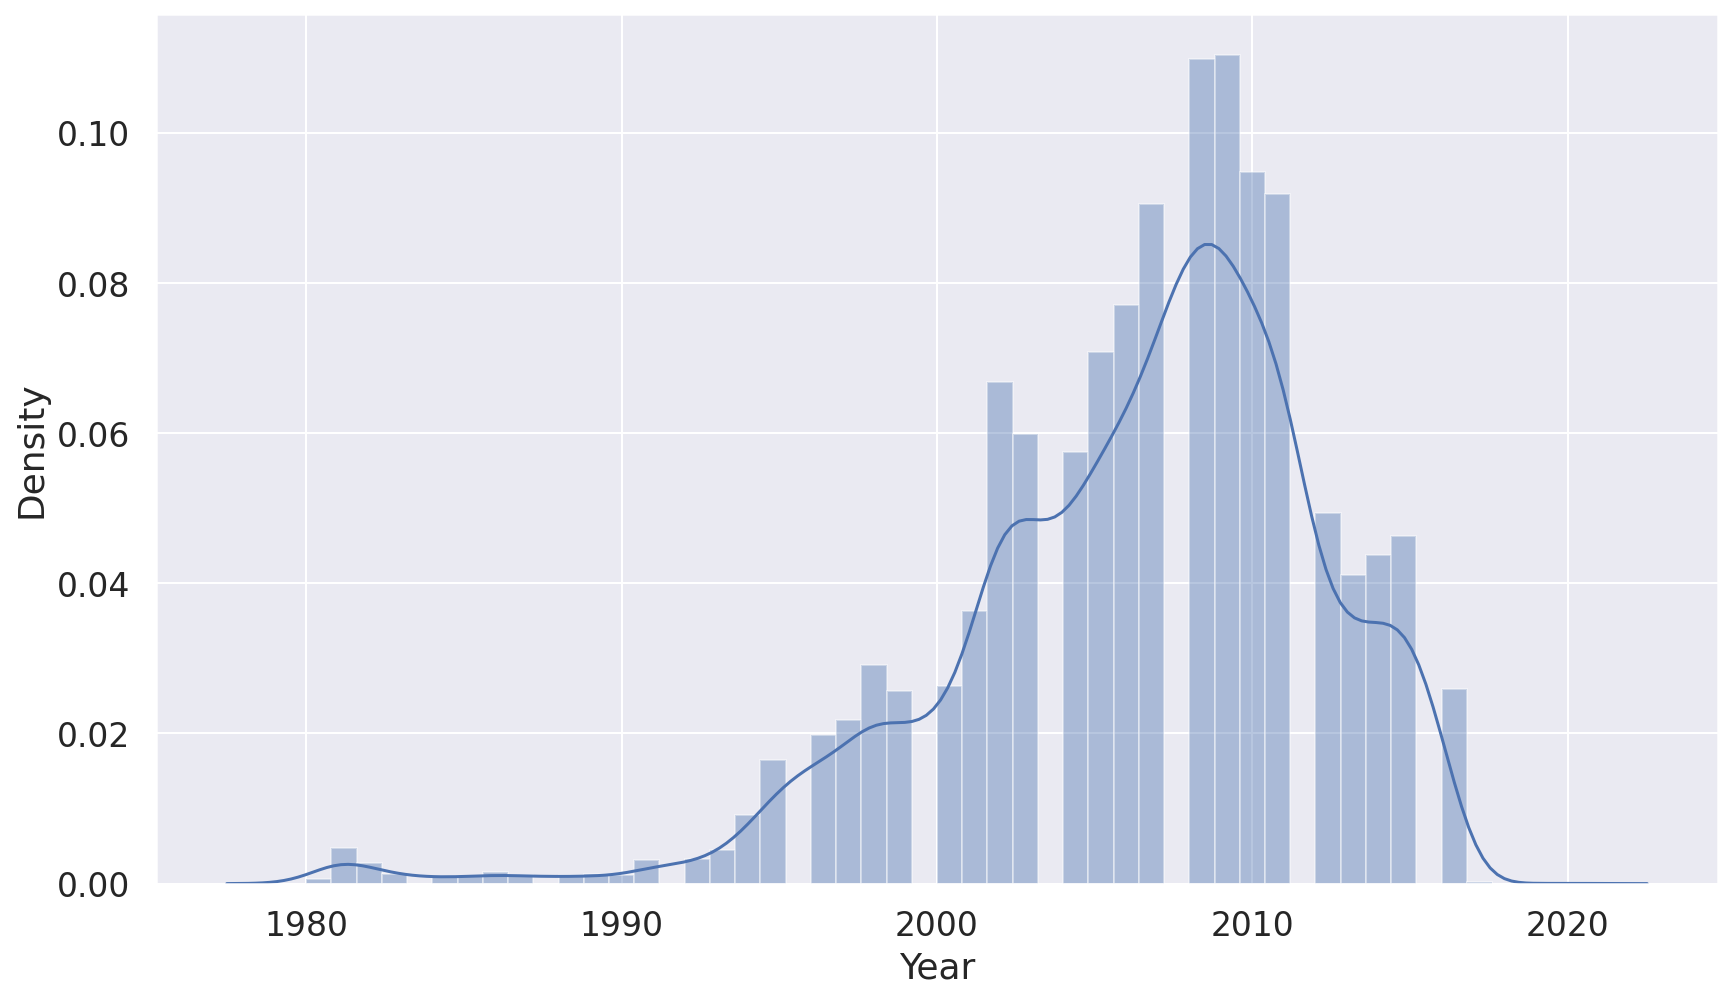

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
sns.distplot(df['Year'], ax=ax)
plt.show();

### (5) 연도별 매출액으로 보는 게임트렌드
- 매출이 높은 연도에는 전반적으로 게임이 인기이 있었다고 생각할 수 있다
- 매출이 낮은 연도에는 전반적으로 게임이 인기가 없었다고 생각할 수 있다

In [ ]:
G_year_sum = df[['NA','EU','JP','Other','Total']].groupby(df['Year']).sum()
G_year_sum

NA            EU            JP         Other          Total
Year                                                                        
1980       10590.00        670.00         27.00       3126.00       14413.00
1981   350042870.00  110002460.00    3003183.00       3495.00   463052008.00
1982       26920.00       1650.00        108.00        352.00       29030.00
1983        7760.00        803.00       8133.00        161.00       16857.00
1984       33292.00       2112.00      14273.00       3712.00       53389.00
1985   460033285.00       4755.00      14566.00        941.00   460053547.00
1986       12521.00       2867.00      19816.00    3001957.00     3037161.00
1987        8463.00       1428.00      11648.00        233.00       21772.00
1988       23879.00       6602.00      15769.00  190000815.00   190047065.00
1989    60045099.00       8452.00      18369.00       1515.00    60073435.00
1990       25469.00       7642.00      14880.00   20001389.00    20049380.00
1991       12841.00       7028.00  240014540.00        821.00   240035230.00
1992       33933.00      11776.00      28931.00       4713.00       79353.00
1993     3015249.00       4785.00      25336.00    3004022.00     6049392.00
1994       28420.00      18153.00 1090032948.00       5458.00  1090084979.00
1995   340024885.00   40015274.00  150045768.00    6006039.00   536091966.00
1996  5700087351.00 3083044480.00  473057321.00    3017026.00  9259206178.00
1997   600094402.00  410048159.00 1523047800.00   93015334.00  2626205695.00
1998  5256131180.00   30068366.00 3120053656.00  223014438.00  8629267640.00
1999  2660123720.00  110062812.00  713055750.00   96013408.00  3579255690.00
2000   880094521.00 1680051617.00 4823038577.00  173014820.00  7556199535.00
2001  3643170550.00 3456094632.00  156052727.00   80023106.00  7335341015.00
2002  2080230258.00 1280119545.00  189061305.00  106037556.00  3655448664.00
2003  4540196860.00 1660106687.00  338044905.00   36033189.00  6574381641.00
2004   990221828.00  690106909.00 3162058366.00  309053821.00  5151440924.00
2005  1080244800.00  490122020.00   69062515.00   76047602.00  1715476937.00
2006  2799275091.00 1163133589.00  513078950.00  545068028.00  5020555658.00
2007  6286312730.00 1208182038.00  125089376.00  169093799.00  7788677943.00
2008  4572350104.00 1862200197.00  361075353.00 1583088517.00  8378714171.00
2009  1656369656.00 3495209048.00   74078036.00  699082810.00  5924739550.00
2010  8692299694.00 1223189121.00 1532078310.00  826072388.00 12273639513.00
2011  3089254292.00 2882176903.00  109062186.00  459063707.00  6539557088.00
2012  2963158855.00 3080119492.00  696057863.00   90044573.00  6829380783.00
2013 19200139218.00 4226125135.00  366050917.00 1100042338.00 24892357608.00
2014   393132186.00 2333126851.00  166049110.00   33043596.00  2925351743.00
2015  1469105372.00  389101044.00  123043513.00  682036226.00  2663286155.00
2016  1659024526.00   36027174.00   29020175.00   40014328.00  1764086203.00
2017           9.00          9.00         50.00          9.00          77.00
2020         270.00       3000.00          3.00         20.00        3293.00

No handles with labels found to put in legend.


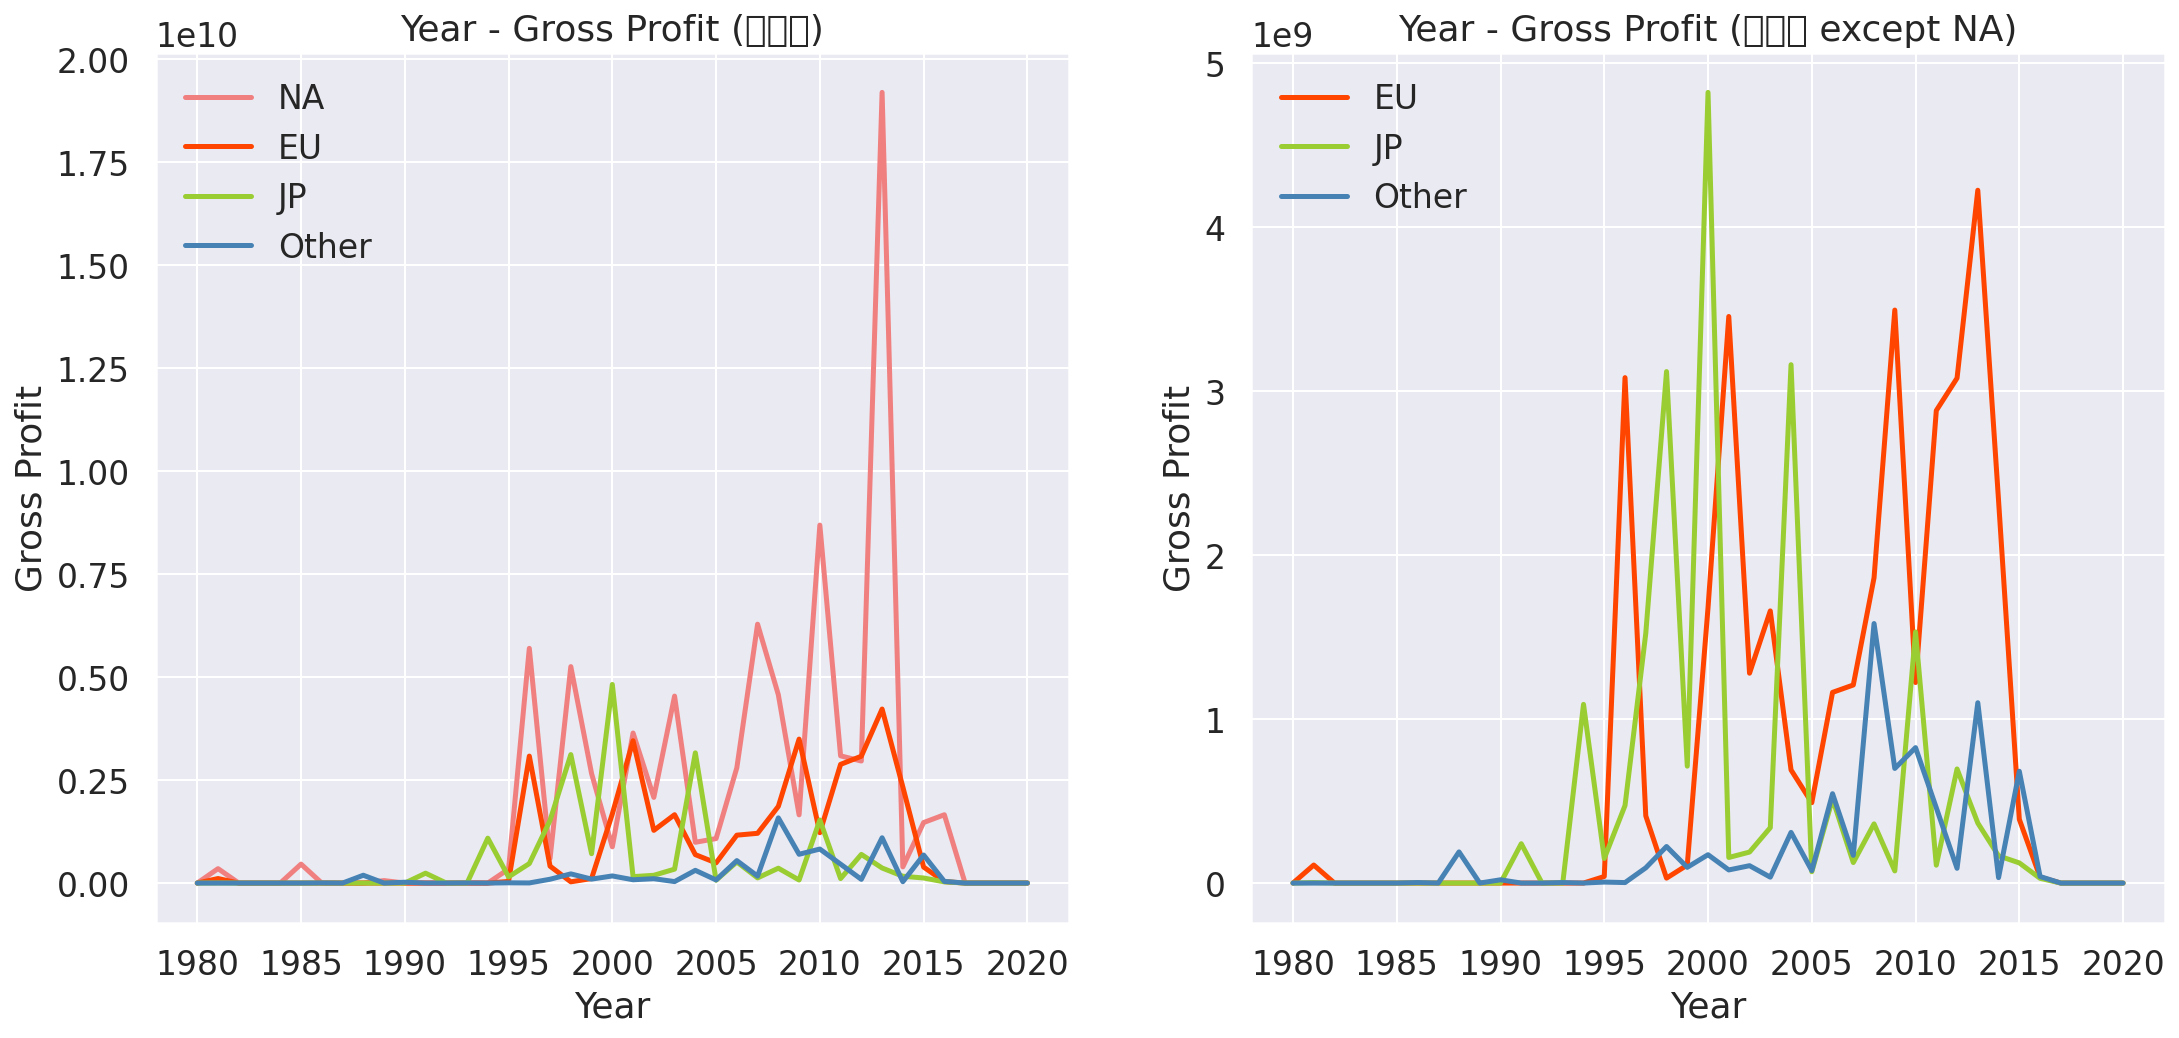

In [ ]:
# 연도에 따른 지역별 매출현황

fig, ax = plt.subplots(1,2, figsize=(18,8))

sns.lineplot(x=G_year_sum.index, y=G_year_sum['NA'], color = 'lightcoral', label='NA',linewidth=2.5, ax=ax[0])
sns.lineplot(x=G_year_sum.index, y=G_year_sum['EU'], color='orangered', label='EU',linewidth=2.5,ax=ax[0])
sns.lineplot(x=G_year_sum.index, y=G_year_sum['JP'], color='yellowgreen', label='JP',linewidth=2.5,ax=ax[0])
sns.lineplot(x=G_year_sum.index, y=G_year_sum['Other'], color='steelblue', label='Other',linewidth=2.5,ax=ax[0])
plt.legend();
ax[0].set_ylabel('Gross Profit');
ax[0].set_title('Year - Gross Profit (지역별)');

sns.lineplot(x=G_year_sum.index, y=G_year_sum['EU'], color='orangered', label='EU',linewidth=2.5,ax=ax[1])
sns.lineplot(x=G_year_sum.index, y=G_year_sum['JP'], color='yellowgreen', label='JP',linewidth=2.5,ax=ax[1])
sns.lineplot(x=G_year_sum.index, y=G_year_sum['Other'], color='steelblue', label='Other',linewidth=2.5,ax=ax[1])
plt.legend();
plt.ylabel('Gross Profit')
ax[1].set_title('Year - Gross Profit (지역별 except NA)')

plt.show();

앞서 pie 차트에서 봤듯이 NA의 매출이 차지하는 비율이 50%이상이였기 때문에 나라별 매출액을 비교한 결과에서도 NA이 가장 크게 나타냈다.

 다른 나라의 매출액을 비교하기 어렵기 때문에 NA를 제외한 나라별 표를 오른쪽과 같이 나타내었다.

- EU에서는 약 1995년 ~ 2015년까지 약 20년동안 4번의 큰 인기를 끌었다
- JP에서는 약 1995년 ~ 2005년까지 약 10년동안 4번의 큰 인기를 끌었다
- 그 외 지역에서는 다른 지역에 비해 매출이 높지 않았다. 다만 2005년 ~2010년 사이에 약간의 인기를 얻었던 것으로 보인다.

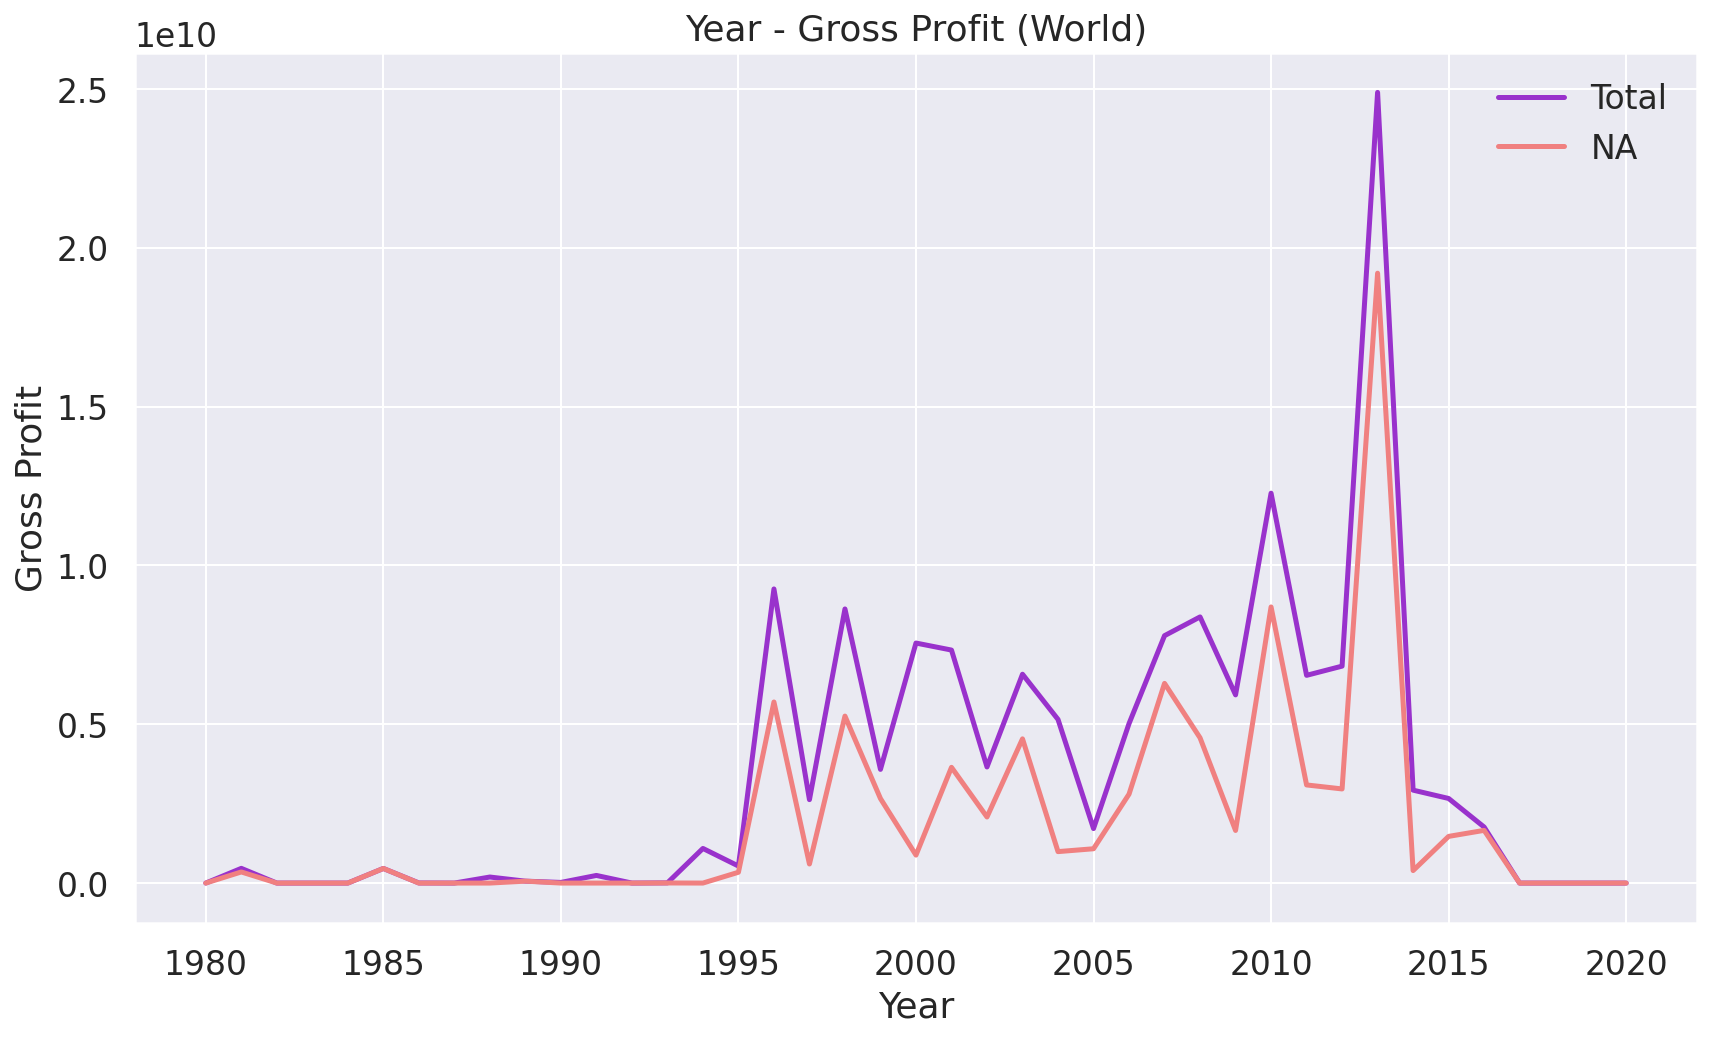

In [ ]:
# 연도에 따른 전세계 매출액 현황
fig, ax = plt.subplots(1,1, figsize=(14,8))
sns.lineplot(x=G_year_sum.index, y=G_year_sum['Total'], color = 'darkorchid', label='Total',linewidth=2.5)
sns.lineplot(x=G_year_sum.index, y=G_year_sum['NA'], color = 'lightcoral', label='NA',linewidth=2.5)
plt.legend()
plt.title('Year - Gross Profit (World)')
plt.ylabel('Gross Profit')
plt.show();

전체 매출액의 50%이상을 차지하는 NA가 연도별로 매출액에 얼마나 영향을 주었는지 확인하기 위해 시각화하였다

 전체 매출액의 그래프 선과 NA의 그래프의 선이 비슷한 모양을 가지고 있다.
 따라서 해마다 NA의 매출액이 전체 매출액에 아주 큰 영향을 주고 있다는 것을 알 수 있다.

## 4-3. 매출이 높은 게임에 대한 분석

### (1) 나라별로 매출액이 가장 높은 게임에 대한 3가지 Rank

In [ ]:
big = df.sort_values(by='NA',ascending=False)
big10 = big[['NA','EU','JP','Other','Total']]
big10 = big10.apply(np.argsort, axis =0)
big = pd.concat([big['Name'], big10], axis=1)
big = big.set_index('Name')
big = big.T
big

Name   Grand Theft Auto V  ...  ¡Shin Chan Flipa en colores!
NA                  16595  ...                             0
EU                  16595  ...                          1198
JP                   8297  ...                           244
Other               16595  ...                           455
Total               15572  ...                             0

[5 rows x 16596 columns]

In [ ]:
big_rank = big.columns[big.values[:,::-1]] #Grand Theft Auto V
big[['1순위','2순위','3순위']] = pd.DataFrame(big_rank[:,:3], index = big.index)
big = big[['1순위','2순위','3순위']]
big = big.T
big

NA  ...               Total
Name                      ...                    
1순위   Grand Theft Auto V  ...  Grand Theft Auto V
2순위          Halo: Reach  ...         Halo: Reach
3순위        Mario Kart 64  ...       Mario Kart 64

[3 rows x 5 columns]

### (2) 나라별로 매출액이 가장 높은 게임에 대한 3가지 bar plot

In [ ]:
nana = list(big['NA'])
euna = list(big['EU'])
jpna = list(big['JP'])
otna = list(big['Other'])
tona = list(big['Total'])

In [ ]:
bigna = df['NA'].sort_values(ascending=False)
bigna = pd.DataFrame(bigna[:3]).reset_index()
bigeu = df['EU'].sort_values(ascending=False)
bigeu = pd.DataFrame(bigeu[:3]).reset_index()
bigjp = df['JP'].sort_values(ascending=False)
bigjp = pd.DataFrame(bigjp[:3]).reset_index()
bigot = df['Other'].sort_values(ascending=False)
bigot = pd.DataFrame(bigot[:3]).reset_index()
bigto = df['Total'].sort_values(ascending=False)
bigto = pd.DataFrame(bigto[:3]).reset_index()
bigall = pd.concat([bigna['NA'],bigeu['EU'],bigjp['JP'],bigot['Other'],bigto['Total']], axis=1)
bigall = bigall.rename({0: 'Rank1', 1:'Rank2',2:'Rank3' })
bigall = bigall.T

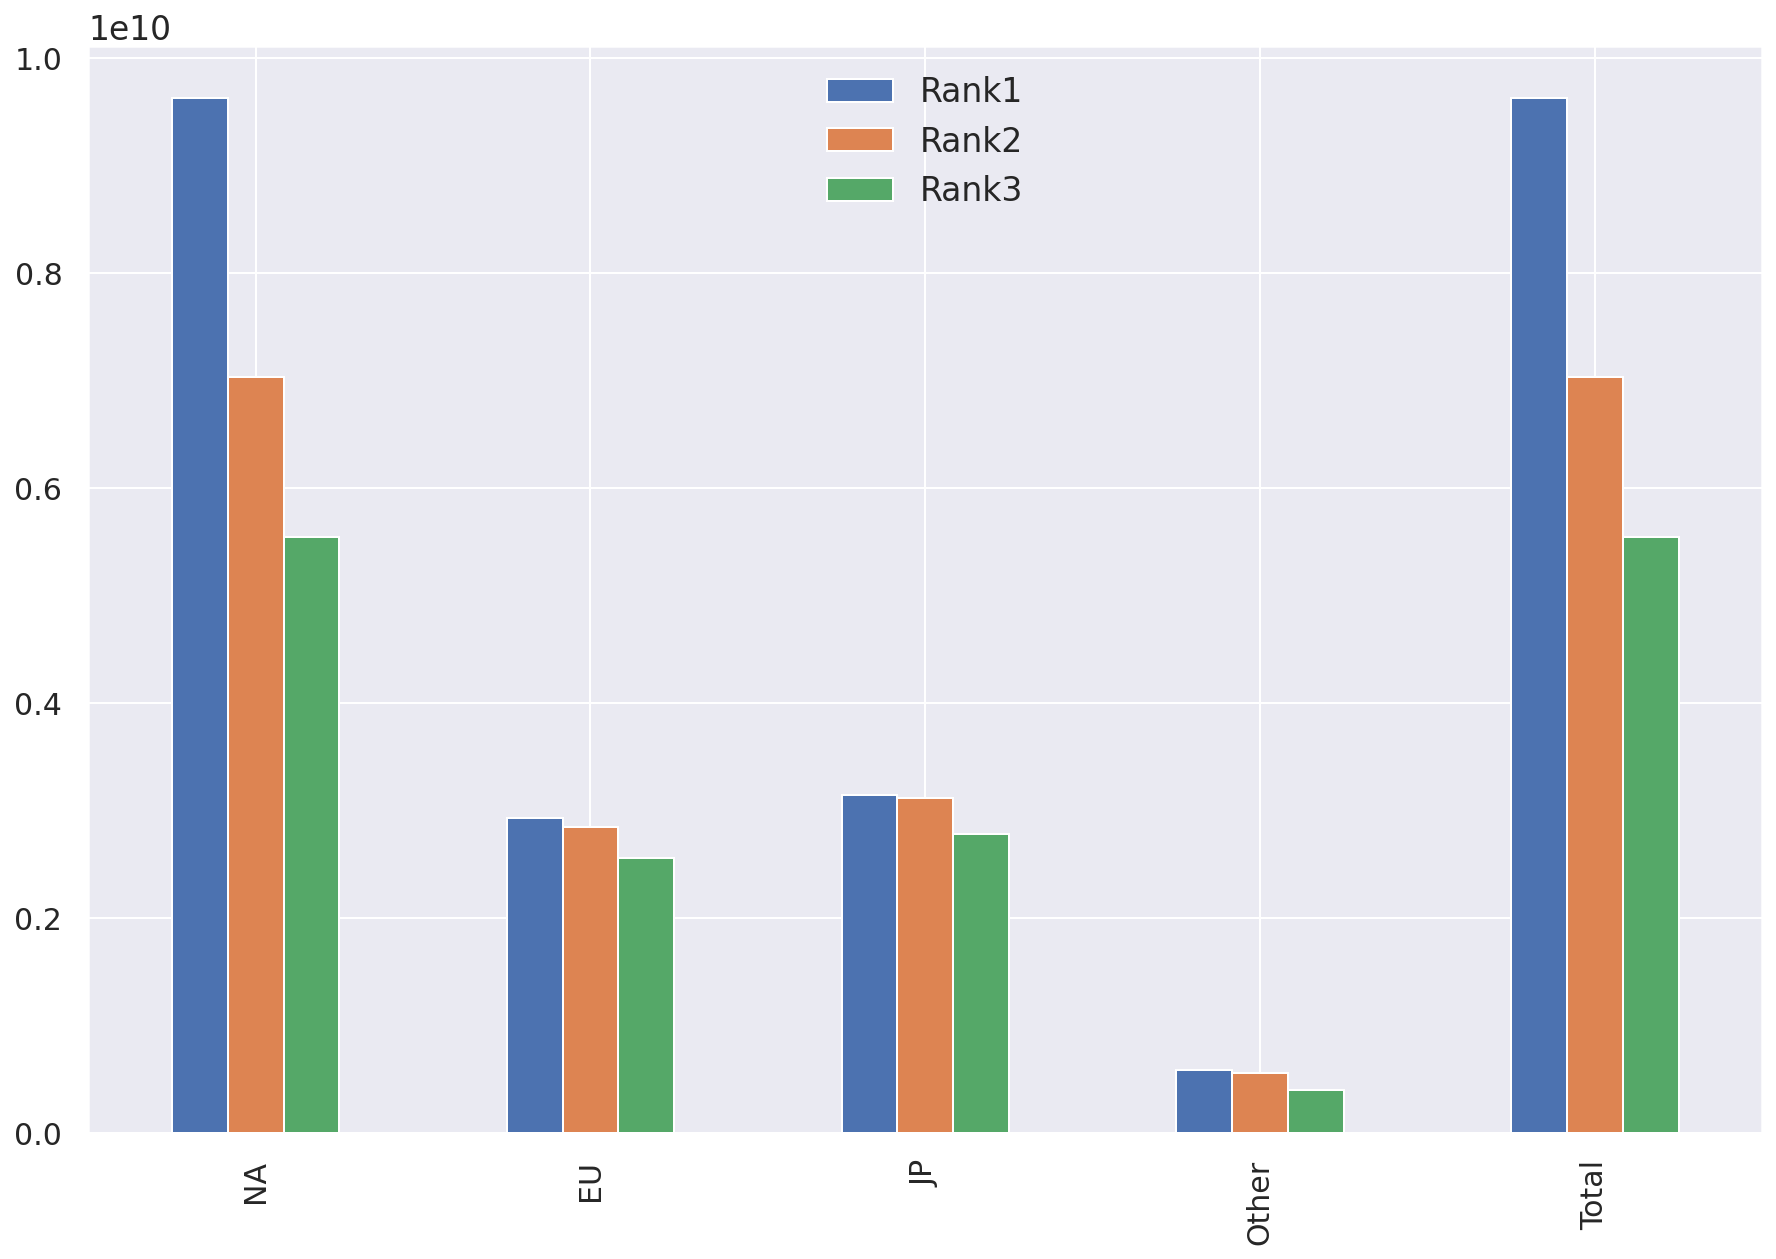

In [ ]:
bigall.plot(kind='bar', fontsize=15);

### (3) 연도별로 가장 높은 매출을 기록한 게임


In [ ]:
yena = pd.pivot_table(df, index = 'Name', columns='Year', values='Total')
yena = yena.fillna(0)
yena = yena.apply(np.argsort, axis=0).T
yena_rank = yena.columns[yena.values[:,::-1]]
yena[['1순위']] = pd.DataFrame(yena_rank[:,:1], index = yena.index)
yena = yena[['1순위']].T
yena

Year       1980  ...                    2020
Name             ...                        
1순위   Asteroids  ...  Imagine: Makeup Artist

[1 rows x 39 columns]

### (4) 게임제작사별로 가장 높은 매출을 기록한 게임


#### Publisher별 게임 출시 개수

In [ ]:
print('578개의 게임제작사에서 제작한 게임의 갯수: \n')
G_Pu_cnt = df['Publisher'].value_counts(sort=True)
G_Pu_cnt = pd.DataFrame(G_Pu_cnt)
G_Pu_cnt

578개의 게임제작사에서 제작한 게임의 갯수: 



Publisher
Electronic Arts                    1408
Activision                          975
Namco Bandai Games                  932
Ubisoft                             921
Konami Digital Entertainment        832
...                                 ...
White Park Bay Software               1
SSI                                   1
TalonSoft                             1
Fuji                                  1
Milestone                             1

[578 rows x 1 columns]

In [ ]:
n = int(G_Pu_cnt[G_Pu_cnt['Publisher']<=5].count())
print('각 게임 제작사에서 5개 이하의 게임을 제작한 회사의 수: ', n)
print('578개의 게임제작사 중에 366개의 회사에서 5개 이하의 게임만을 출시했다')
print('전체의 %.2f%%를 차지하는 회사들은 5개 이하의 게임을 제작한 소규모 회사일 것이다' %((n/578)*100))

각 게임 제작사에서 5개 이하의 게임을 제작한 회사의 수:  366
578개의 게임제작사 중에 366개의 회사에서 5개 이하의 게임만을 출시했다
전체의 63.32%를 차지하는 회사들은 5개 이하의 게임을 제작한 소규모 회사일 것이다


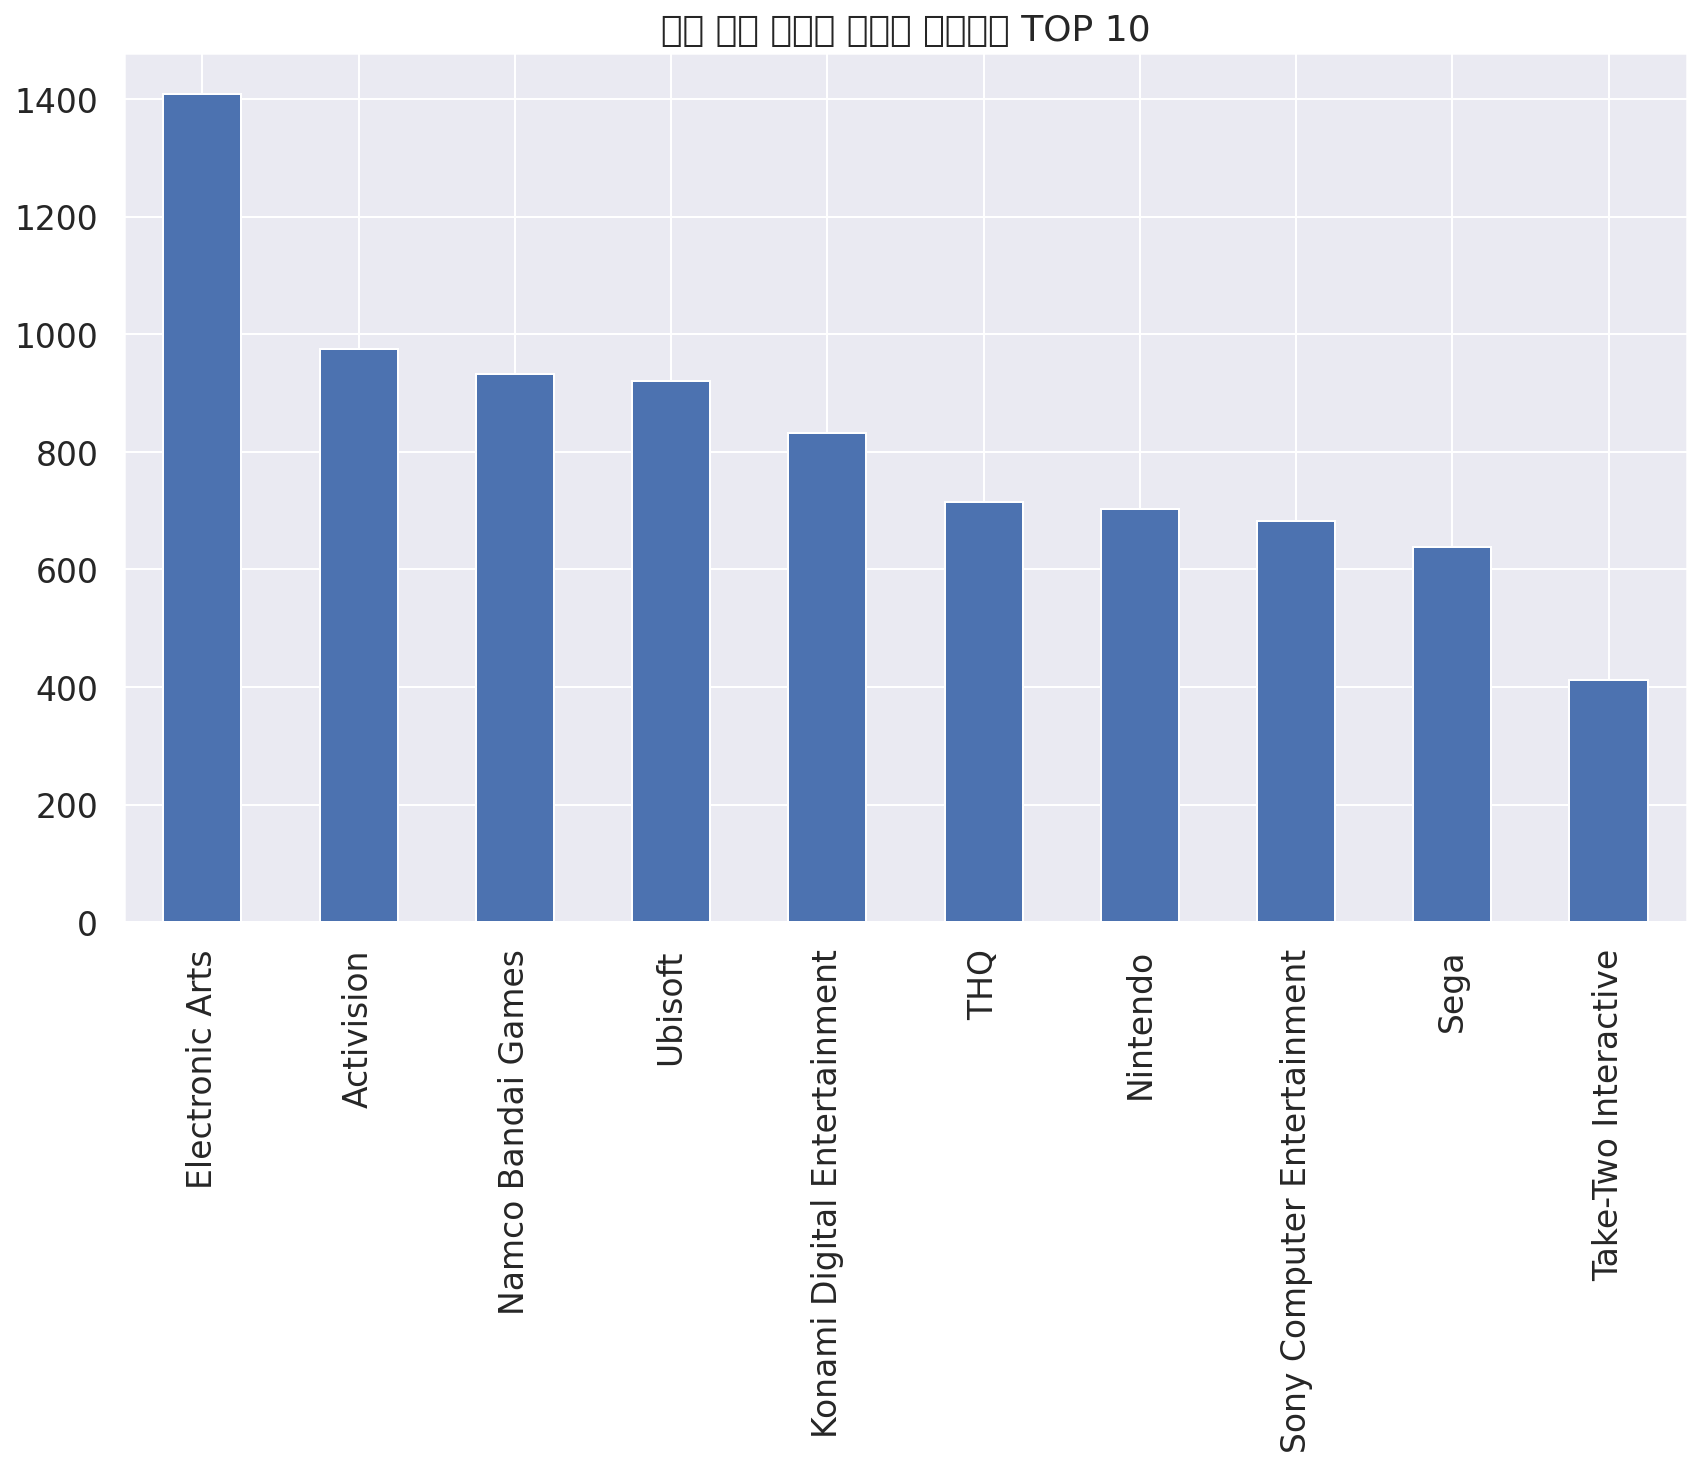

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

G_Pu_cnt['Publisher'][:10].plot(kind='bar')
ax.set_title('가장 많은 게임을 제작한 제작회사 TOP 10')
plt.show();

#### Publisher별 매출액

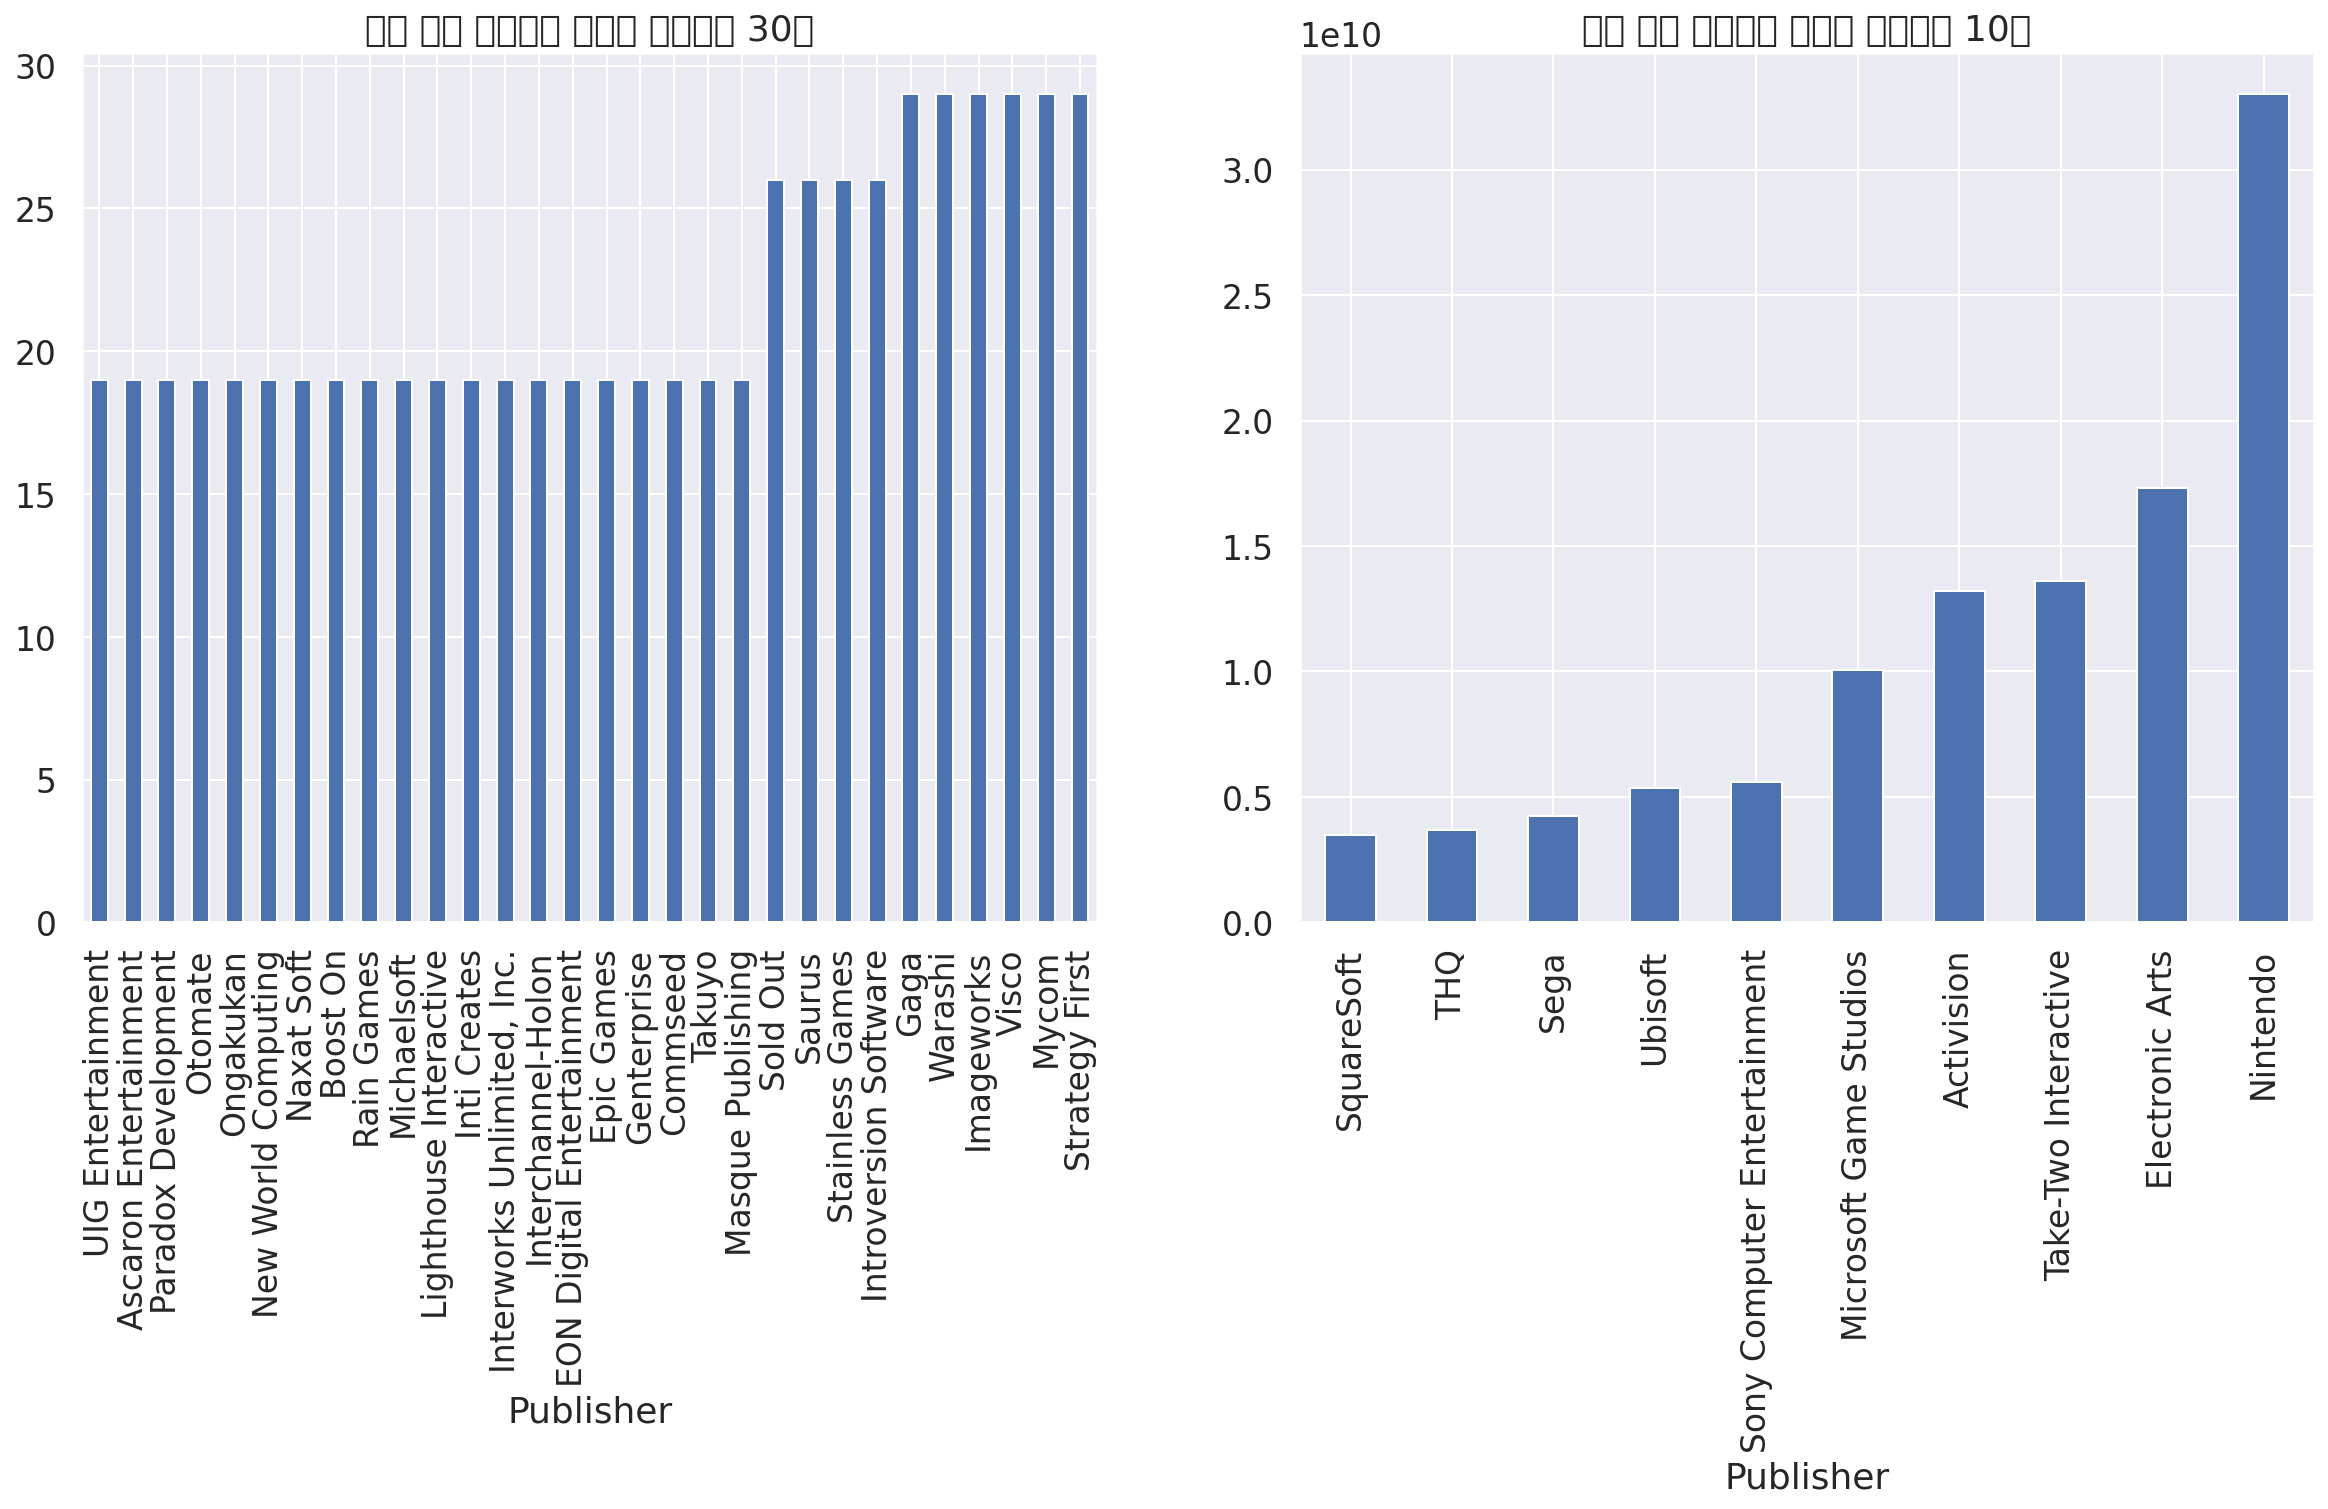

In [ ]:
pu_s1 = list(G_Pu_cnt['Publisher'][:10].index) # 출시 상위
pu_s2 = list(G_Pu_cnt['Publisher'][-400:].index) # 출시 하위

G_Pu_sum = df[['NA','EU','JP','Other','Total']].groupby(df['Publisher']).sum()
G_Pu_sum = G_Pu_sum.sort_values(by='Total',ascending=True)
G_Pu_sum

pu_t1 = list(G_Pu_sum['Total'][:400].index) # 매출액 하위
pu_t2 = list(G_Pu_sum['Total'][-10:].index) # 매출액 상위

fig, ax = plt.subplots(1,2, figsize=(20,8))

G_Pu_sum['Total'][:30].plot(kind='bar', ax=ax[0]);
ax[0].set_title('가장 적은 매출액을 기록한 제작회사 30개');

G_Pu_sum['Total'][-10:].plot(kind='bar', ax=ax[1]);
ax[1].set_title('가장 많은 매출액을 기록한 제작회사 10개');

plt.show();

In [ ]:
cnt1 , cnt2 = 0,0
for i,j in zip(pu_t1,pu_t2):
  if i in pu_s2:
    cnt2+=1
  if j in pu_s1:
    cnt1+=1

print('A: 가장 많은 게임을 제작한 회사 상위 10개는 다음과 같았습니다\n', pu_t2)
print('B: 가장 매출액이 높은 회사 상위 10개는 다음과 같았습니다.\n', pu_s1,'\n')
print('A∩B: 가장 많은 게임을 제작한 10개 중 상위 Top10 매출액을 갖는 회사: %d개' %cnt1)
print('A∩B: ',list(set(pu_s1)&set(pu_t2)),'\n\n')

print('C∩D: 가장 적은 게임을 제작한 회사 400개 중 하위 Top400 매출액을 갖는 회사: %d개' %cnt2)
print('C∩D: ',list(set(pu_s2)&set(pu_t1)),'\n\n')

print('따라서 게임을 많이 제작한 회사일수록 매출이 높다는 것을 알 수 있다.')
print('하지만 게임을 적게 제작한 회사라고 매출이 낮다고는 할 수 없다')
print('왜냐하면 10개 미만의 게임을 제작한 회사 400개 중 매출이 하위 400등안에 든 회사는 10개뿐이기 때문이다.')

A: 가장 많은 게임을 제작한 회사 상위 10개는 다음과 같았습니다
 ['SquareSoft', 'THQ', 'Sega', 'Ubisoft', 'Sony Computer Entertainment', 'Microsoft Game Studios', 'Activision', 'Take-Two Interactive', 'Electronic Arts', 'Nintendo']
B: 가장 매출액이 높은 회사 상위 10개는 다음과 같았습니다.
 ['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', 'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive'] 

A∩B: 가장 많은 게임을 제작한 10개 중 상위 Top10 매출액을 갖는 회사: 8개
A∩B:  ['Electronic Arts', 'Nintendo', 'Sega', 'Activision', 'Ubisoft', 'THQ', 'Sony Computer Entertainment', 'Take-Two Interactive'] 


C∩D: 가장 적은 게임을 제작한 회사 400개 중 하위 Top400 매출액을 갖는 회사: 10개
C∩D:  ['Game Arts', 'Merscom LLC', 'Tommo', 'Daedalic Entertainment', 'ITT Family Games', 'Blast! Entertainment Ltd', "Yuke's", 'Quest', 'Gameloft', 'Shogakukan', 'O3 Entertainment', 'Alawar Entertainment', 'UIG Entertainment', 'New', 'Grand Prix Games', 'PopTop Software', 'Coleco', 'Karin Entertainment', 'Slightly Mad Studios', 'Cr

추후에 Publisher(categorical) 데이터를 numerical로 나눌 때 기준
1. 400개 이상의 게임을 제작한 회사는 대기업
2. 100개 이상 ~ 400개 미만을 제작한 회사는 중견기업
3. 100개 미만을 제작한 회사는 중소기업

In [ ]:
big = int(G_Pu_cnt[G_Pu_cnt['Publisher']>=400].count())
medium =  int(G_Pu_cnt[(G_Pu_cnt['Publisher']<400)&(G_Pu_cnt['Publisher']>=100)].count())
small = int(G_Pu_cnt[G_Pu_cnt['Publisher']<100].count())
print('400개 이상의 게임을 출시한 대기업 회사의 수: ', big)
print('100개 이상 ~ 400개 미만의 게임을 출시한 중견기업 회사의 수: ', medium)
print('100개 미만의 게임을 출시한 소기업 회사의 수: ', small)

400개 이상의 게임을 출시한 대기업 회사의 수:  10
100개 이상 ~ 400개 미만의 게임을 출시한 중견기업 회사의 수:  19
100개 미만의 게임을 출시한 소기업 회사의 수:  549


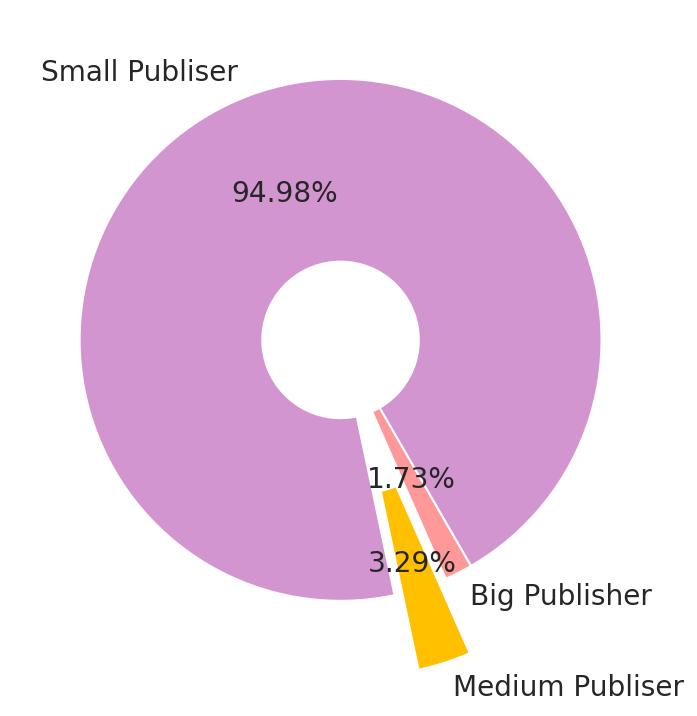

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(14,6))

pu_ratio = [big, medium, small]
labels = ['Big Publisher','Medium Publiser','Small Publiser']
color = ['#ff9999', '#ffc000', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w'}

ax.pie(pu_ratio, labels=labels,explode=(0,0.3,0), colors=color, autopct='%.2f%%', startangle=300, counterclock=False, wedgeprops=wedgeprops, textprops={'fontsize': 14}) # text font size

plt.show();

In [ ]:
Pu_size=G_Pu_sum.sort_values(by='Total',ascending=False)
big_p = (Pu_size['Total'][G_Pu_cnt['Publisher']>=400].sum())
medium_p =  (Pu_size['Total'][(G_Pu_cnt['Publisher']<400)&(G_Pu_cnt['Publisher']>=100)].sum())
small_p = (Pu_size['Total'][G_Pu_cnt['Publisher']<100].sum())
# total = big_p+medium_p+small_p

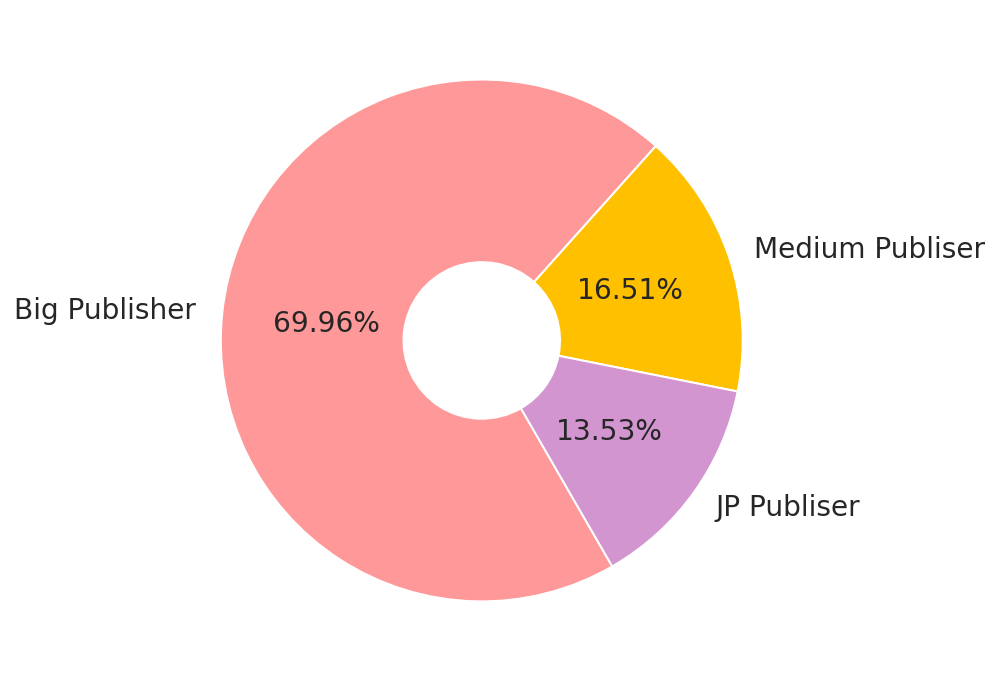

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(14,6))

pu_ratio = [big_p, medium_p, small_p]
labels = ['Big Publisher','Medium Publiser','JP Publiser']
color = ['#ff9999', '#ffc000', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w'}

ax.pie(pu_ratio, labels=labels, colors=color, autopct='%.2f%%', startangle=300, counterclock=False, wedgeprops=wedgeprops, textprops={'fontsize': 14}) # text font size

plt.show();

게임 제작의 수에 따른 회사의 규모
- 대기업은 전체의 2%이내
- 중견기업은 전체의 약 3%
- 소기업은 전체의 약 95%를 차지하고 있다

하지만 매출액은 
- 대기업이 약 70%를 차지하고 있으며
- 중견기업과 소기업은 비슷한 비율로 각각 약 16%, 14%를 차지하고 있다

**따라서, 전체 기업의 2%이내인 대기업이 70%의 매출을 차지하고 있다 **
**즉. 회사의 규모가 큰 몇몇의 회사가 전체 매출의 대부분을 차지하고 있는 사실을 알 수 있다**

### (5) 지원되는 게임플랫폼별로 가장 높은 매출을 기록한 게임


#### Platform별로 지원되는 게임의 개수
- DS 플랫폼의 게임 수가 가장 많다
 
  다양한 게임을 즐기고 싶으면 DS나 PS2 플랫폼을 활용
- 3DO, TG16, PCFX, GG에 지원되는 게임 수는 5개 미만이다

   특정 게임 매니아가 사용할 플랫폼이다

In [ ]:
platform = list(df['Platform'].unique())
print('Platform의 종류: ',platform)

G_plat_cnt= df['Platform'].value_counts()
G_plat_cnt

Platform의 종류:  ['PS', 'PS2', 'PSP', 'PS3', 'X360', 'Wii', 'PC', 'DS', 'N64', '3DS', 'GC', 'XB', 'NES', 'GBA', 'PSV', 'PS4', 'XOne', 'SNES', '2600', 'WiiU', 'SAT', 'GB', 'NG', 'GEN', 'PCFX', 'DC', '3DO', 'WS', 'TG16', 'SCD', 'GG']


DS      2163
PS2     2161
PS3     1328
Wii     1324
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [ ]:
plat_t1 = list(G_plat_cnt[:10].index) # 적은
plat_t2 = list(G_plat_cnt[-10:].index)

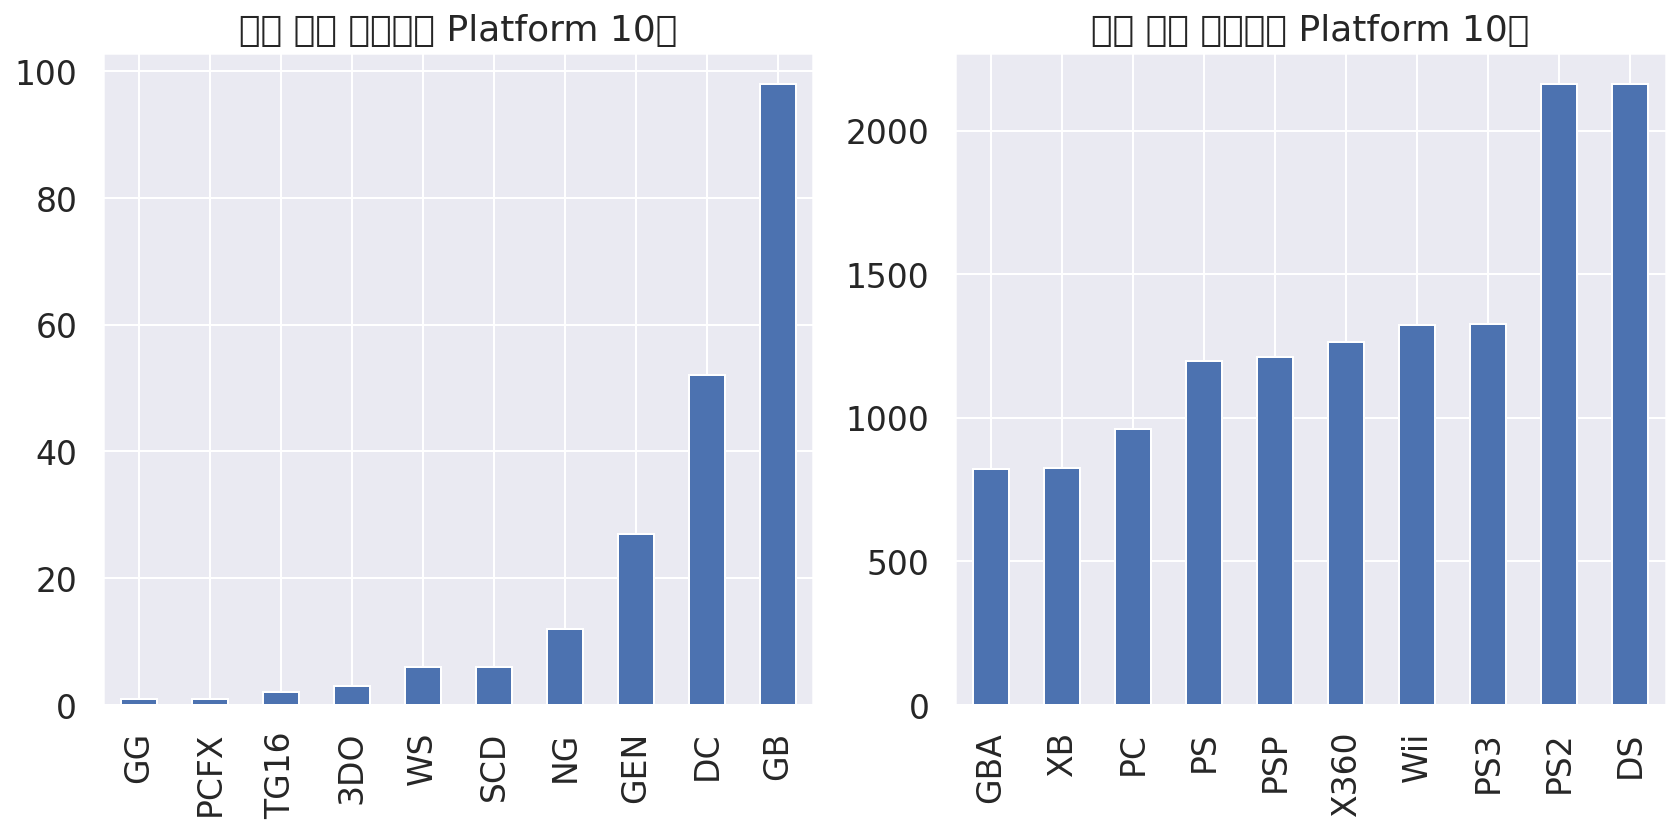

In [ ]:
# Null data가 없기 때문에 시각화하여 봄

fig, ax = plt.subplots(1,2, figsize=(14,6))
G_plat_cnt = G_plat_cnt.sort_values(ascending=True)

G_plat_cnt[:10].plot(kind='bar', ax=ax[0]);
ax[0].set_title('가장 적게 지원되는 Platform 10개');

G_plat_cnt[-10:].plot(kind='bar', ax=ax[1]);
ax[1].set_title('가장 많이 지원되는 Platform 10개');
plt.show();

#### Platform별로 매출액
- NA
- EU
- JP
- Other
- Total (NA+EU+JP+Other)


각 지역별 매출 상위 10개, 매출 하위 10개 bar-그래프
```
Na_p = G_plat_sum.sort_values(by='NA',ascending=True)
EU_p = G_plat_sum.sort_values(by='EU',ascending=True)
JP_p = G_plat_sum.sort_values(by='JP',ascending=True)
Other_p = G_plat_sum.sort_values(by='Other',ascending=True)

fig, ax = plt.subplots(4,2, figsize = (15,20))

Na_p['NA'][:10].plot(kind='bar', ax=ax[0][0]);
ax[0][0].set_title('NA지역: 가장 적게 출시한 Platform 10개');
Na_p['NA'][-10:].plot(kind='bar', ax=ax[0][1]);
ax[0][1].set_title('NA지역: 가장 많이 출시한 Platform 10개');

EU_p['EU'][:10].plot(kind='bar', ax=ax[1][0]);
ax[1][0].set_title('EU지역: 가장 적게 출시한 Platform 10개');
EU_p['EU'][-10:].plot(kind='bar', ax=ax[1][1]);
ax[1][1].set_title('EU지역: 가장 많이 출시한 Platform 10개');

JP_p['JP'][:10].plot(kind='bar', ax=ax[2][0]);
ax[2][0].set_title('JP지역: 가장 적게 출시한 Platform 10개');
JP_p['JP'][-10:].plot(kind='bar', ax=ax[2][1]);
ax[2][1].set_title('JP지역: 가장 많이 출시한 Platform 10개');

Other_p['Other'][:10].plot(kind='bar', ax=ax[3][0]);
ax[3][0].set_title('Other지역: 가장 적게 출시한 Platform 10개');
Other_p['Other'][-10:].plot(kind='bar', ax=ax[3][1]);
ax[3][1].set_title('Other지역: 가장 많이 출시한 Platform 10개');
```



In [ ]:
G_plat_sum = df[['NA','EU','JP','Other','Total']].groupby(df['Platform']).sum()
G_plat_sum = G_plat_sum.sort_values(by='Total',ascending=True)
G_plat_sum

NA            EU  ...         Other          Total
Platform                               ...                             
PCFX               3.00          3.00  ...          3.00          39.00
GG                 3.00          3.00  ...          3.00          49.00
3DO                9.00          9.00  ...          9.00         127.00
TG16               6.00          6.00  ...          6.00         178.00
WS                18.00         18.00  ...         18.00        1474.00
NG                36.00         36.00  ...         36.00        1548.00
SCD             1015.00        375.00  ...         65.00        1905.00
DC              5568.00    3001825.00  ...       3405.00     3019364.00
SNES         3067809.00    3025631.00  ...      12799.00   246222561.00
GEN            19318.00       5568.00  ...    3000935.00   263028243.00
2600       350090250.00  110005366.00  ...       7114.00   463106123.00
NES        520125489.00      21252.00  ...  213008202.00   733253599.00
PSV        606016416.00   89020045.00  ...   59015168.00   817072736.00
GC         790132736.00  510038395.00  ...   46012091.00  1382215158.00
SAT        343006881.00       1050.00  ...    3012565.00  1416051686.00
WiiU      1180037212.00  670023626.00  ...    3006561.00  1859080417.00
PC         858112108.00 1020138861.00  ...  389040677.00  2276315660.00
XB        1220185479.00 1110060020.00  ...   55018877.00  2400283105.00
PSP       1342121508.00  536079339.00  ...  176056138.00  2677340490.00
GB            114476.00      47976.00  ...      11338.00  3190255723.00
XOne      1880081367.00 1530044159.00  ...   10012051.00  3420141487.00
PS4       3653093420.00  423123514.00  ...  700045894.00  4832283477.00
3DS       5723079897.00  473061839.00  ...  220013253.00  6629255594.00
DS        5185399409.00 1515221203.00  ...  205081340.00  8188895421.00
Wii       5529508706.00 1966283118.00  ...  496084077.00  8863977502.00
GBA       4980185767.00  833080780.00  ...   36015278.00  9011340003.00
PS2       5653582723.00 4766360078.00  ... 1335208815.00 12612318027.00
PS3       4019392222.00 6819346959.00  ... 1430147331.00 12903982703.00
N64      10250128869.00 3140038043.00  ...   43004931.00 14493205669.00
PS        5323331814.00 2720211522.00  ...  458047097.00 14893738231.00
X360     22013582415.00 6700274666.00  ... 1763093311.00 30574974382.00

[31 rows x 5 columns]

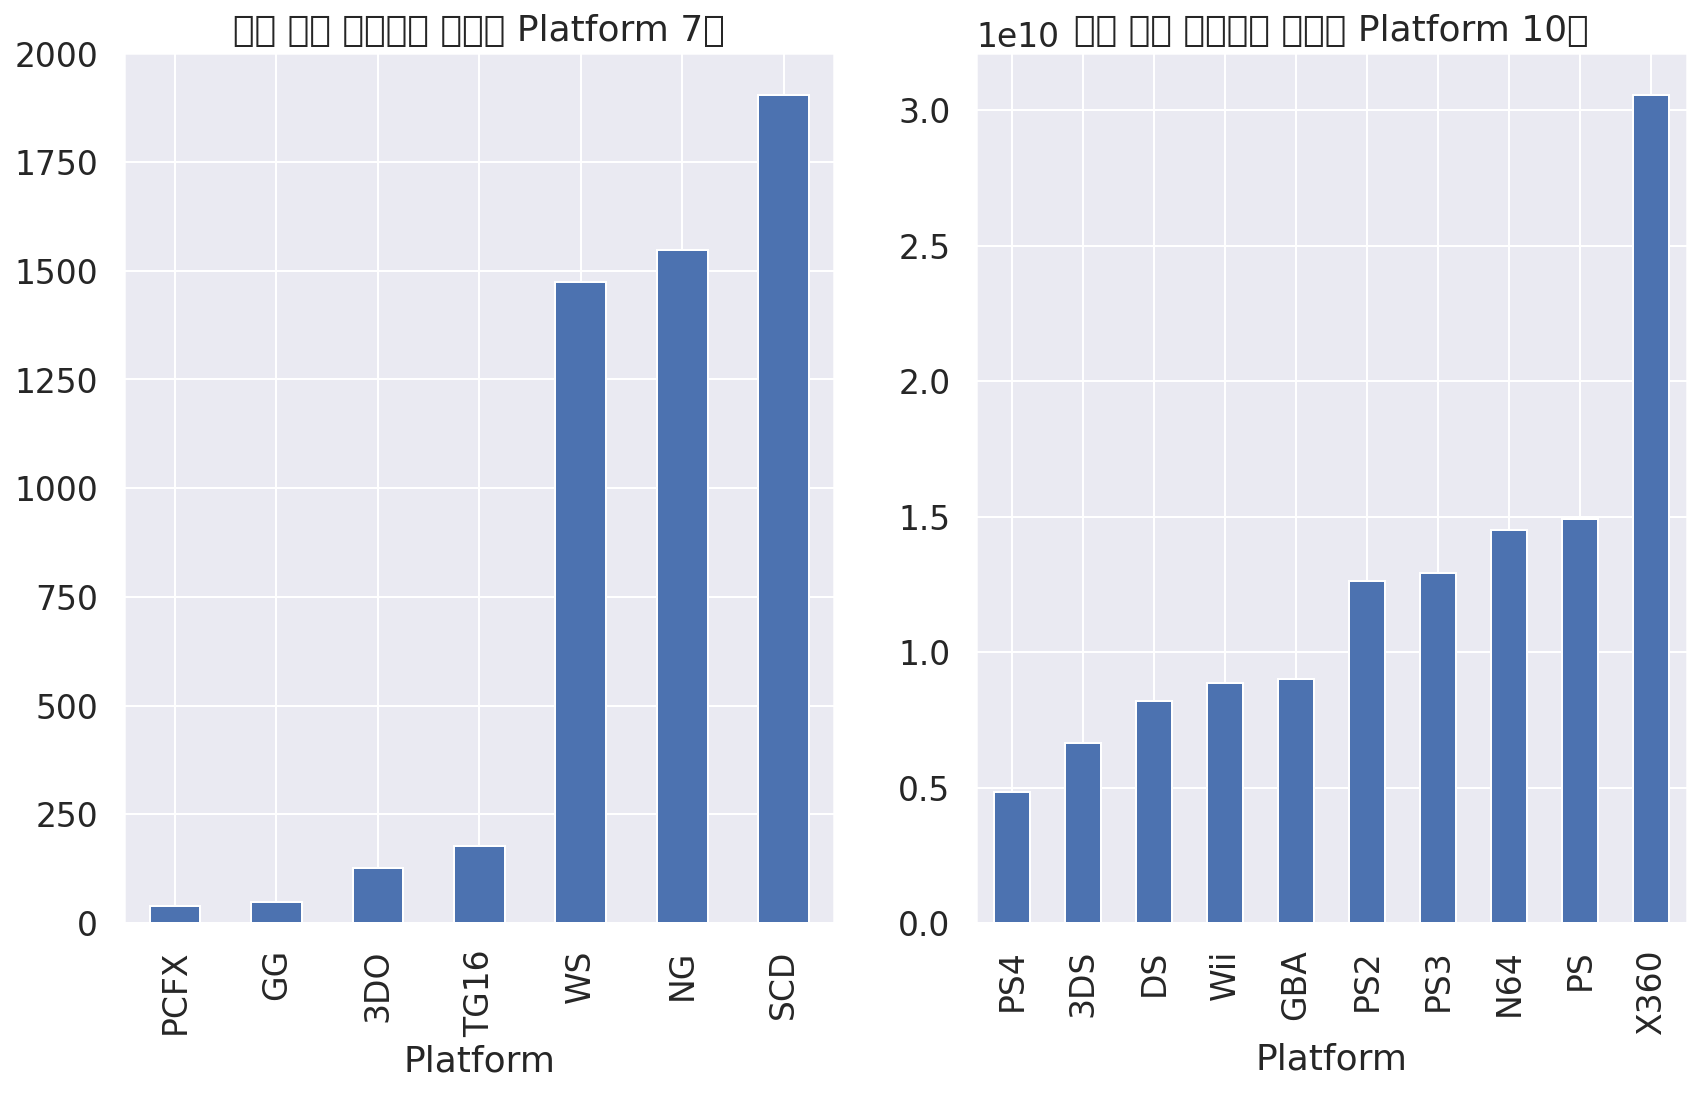

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,8))

# 하위 7번째와 8번째 그리고 8번째와 9번째의 차이가 크게나므로 비교를 쉽게 돕기위해 7개까지만 출력
G_plat_sum['Total'][:7].plot(kind='bar', ax=ax[0]);
ax[0].set_title('가장 적은 매출액을 기록한 Platform 7개');

G_plat_sum['Total'][-10:].plot(kind='bar', ax=ax[1]);
ax[1].set_title('가장 많은 매출액을 기록한 Platform 10개');

plt.show();

In [ ]:
plat_s1 = list(G_plat_sum[:10].index) # 매출액 하위
plat_s2 = list(G_plat_sum[-10:].index) # 매출액 상위

comm1, comm2 = [], []
cnt1 , cnt2 = 0,0
for i,j in zip(plat_t1,plat_t2):
  if i in plat_s1:
    comm1.append(i)
    cnt1+=1
  if j in plat_s2:
    comm2.append(j)
    cnt2+=1

print('A: 가장 많은 게임을 지원하는 플랫폼 상위 10개는 다음과 같았습니다\n', plat_t2)
print('B: 가장 매출액이 높았던 플랫폼 상위 10개는 다음과 같았습니다.\n', plat_s2,'\n')
print('A∩B: 가장 많은 게임이 지원되는 플랫폼 10개 중 상위 Top10 매출액을 갖는 Platform: %d개' %cnt2)
print('A∩B: ',list(set(plat_s2)&set(plat_t2)),'\n\n')

print('C: 가장 적은 게임을 지원하는 플랫폼 하위 10개는 다음과 같았습니다\n', plat_t1)
print('D: 가장 매출액이 적었던 플랫폼 하위 10개는 다음과 같았습니다.\n', plat_s1,'\n')
print('C∩D: 가장 적은 게임이 지원되는 플랫폼 10개 중 하위 Top10 매출액을 갖는 Platform: %d개' %cnt1)
print('C∩D: ',list(set(plat_s1)&set(plat_t1)),'\n\n')

print('따라서 게임이 많이 지원되는 플랫폼일수록 소비자들에게 인기있다')
print('마찬가지로 게임을 적게 지원하는 플랫폼일수록 소비자들에게 인기가 없다')
print('즉, 플랫폼에 지원되는 게임의 수에 따라 매출액에 영향을 미친다')

A: 가장 많은 게임을 지원하는 플랫폼 상위 10개는 다음과 같았습니다
 ['GB', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'PCFX', 'GG']
B: 가장 매출액이 높았던 플랫폼 상위 10개는 다음과 같았습니다.
 ['PS4', '3DS', 'DS', 'Wii', 'GBA', 'PS2', 'PS3', 'N64', 'PS', 'X360'] 

A∩B: 가장 많은 게임이 지원되는 플랫폼 10개 중 상위 Top10 매출액을 갖는 Platform: 0개
A∩B:  [] 


C: 가장 적은 게임을 지원하는 플랫폼 하위 10개는 다음과 같았습니다
 ['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA']
D: 가장 매출액이 적었던 플랫폼 하위 10개는 다음과 같았습니다.
 ['PCFX', 'GG', '3DO', 'TG16', 'WS', 'NG', 'SCD', 'DC', 'SNES', 'GEN'] 

C∩D: 가장 적은 게임이 지원되는 플랫폼 10개 중 하위 Top10 매출액을 갖는 Platform: 0개
C∩D:  [] 


따라서 게임이 많이 지원되는 플랫폼일수록 소비자들에게 인기있다
마찬가지로 게임을 적게 지원하는 플랫폼일수록 소비자들에게 인기가 없다
즉, 플랫폼에 지원되는 게임의 수에 따라 매출액에 영향을 미친다


### (6) 게임장르별로 가장 높은 매출을 기록한 게임

#### 장르별로 출시된 게임의 개수

장르별 게임의 갯수: 
 Action          3355
Sports          2340
Misc            1734
Role-Playing    1483
Shooter         1307
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64


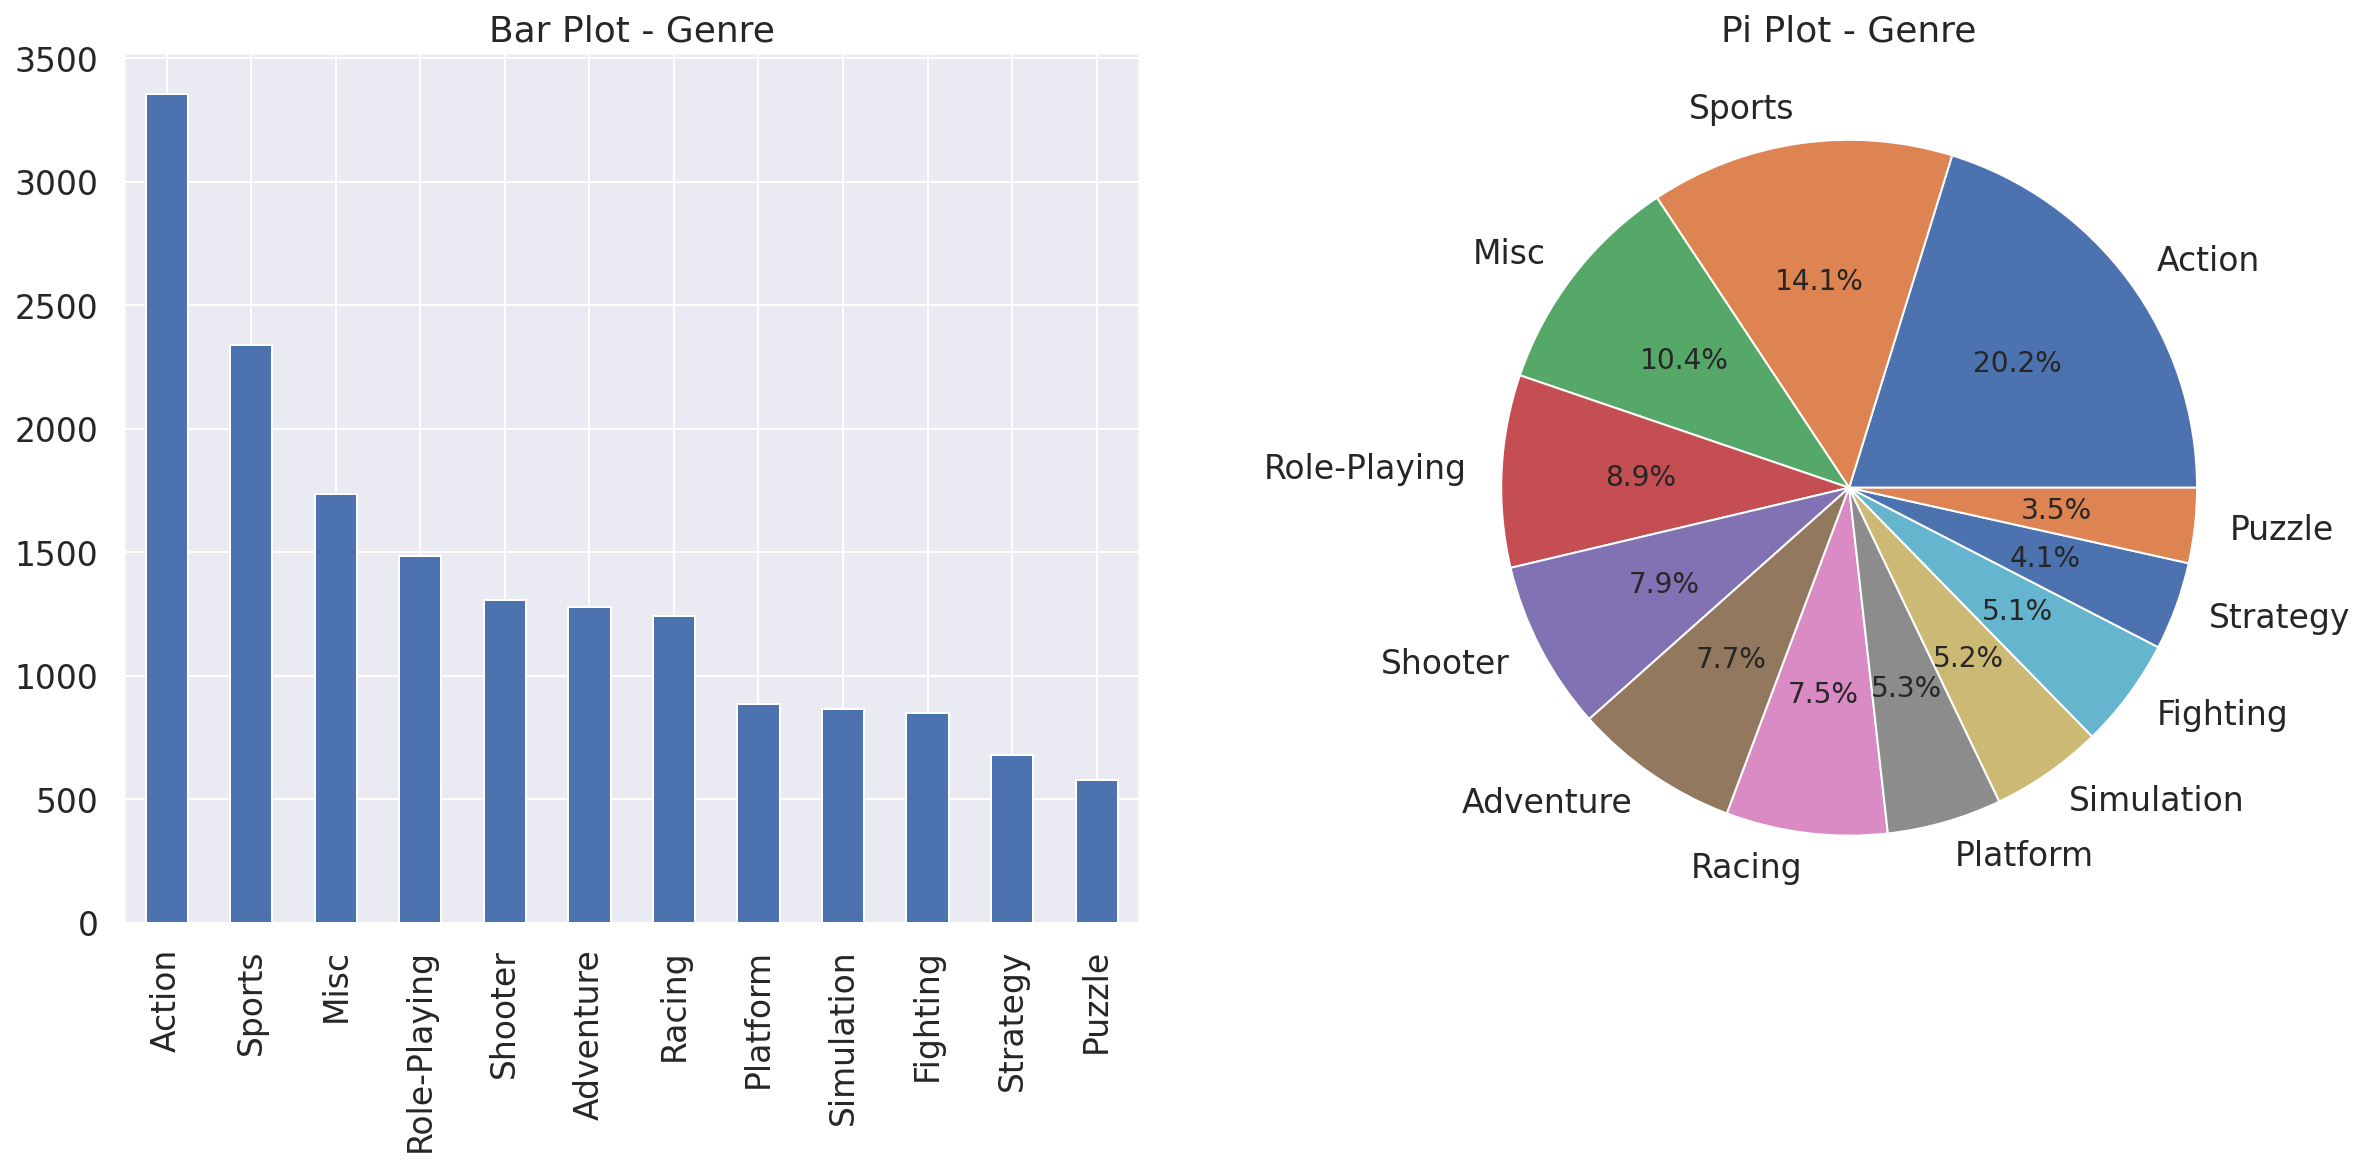

In [ ]:
print('장르별 게임의 갯수: \n',df['Genre'].value_counts())

f, ax = plt.subplots(1, 2, figsize=(20, 8))
df['Genre'].value_counts().plot.bar(ax=ax[0]);
ax[0].set_title('Bar Plot - Genre')
ax[0].set_ylabel('')

df['Genre'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Pi Plot - Genre')
ax[1].set_ylabel('')
plt.show();

- Action 장르의 게임이 가장 많이 출시되었고 그 다음으로 Sports게임이 가장 많이 출시 되었다
- 12개 장르의 게임 중 상위 4개의 장르가 전체의 절반이상을 차지하고 있다.

#### 장르별 게임 매출액

In [ ]:
G_gen_sum = df[['NA','EU','JP','Other','Total']].groupby(df['Genre']).sum()
G_gen_sum = G_gen_sum.sort_values(by='Total', ascending=False)

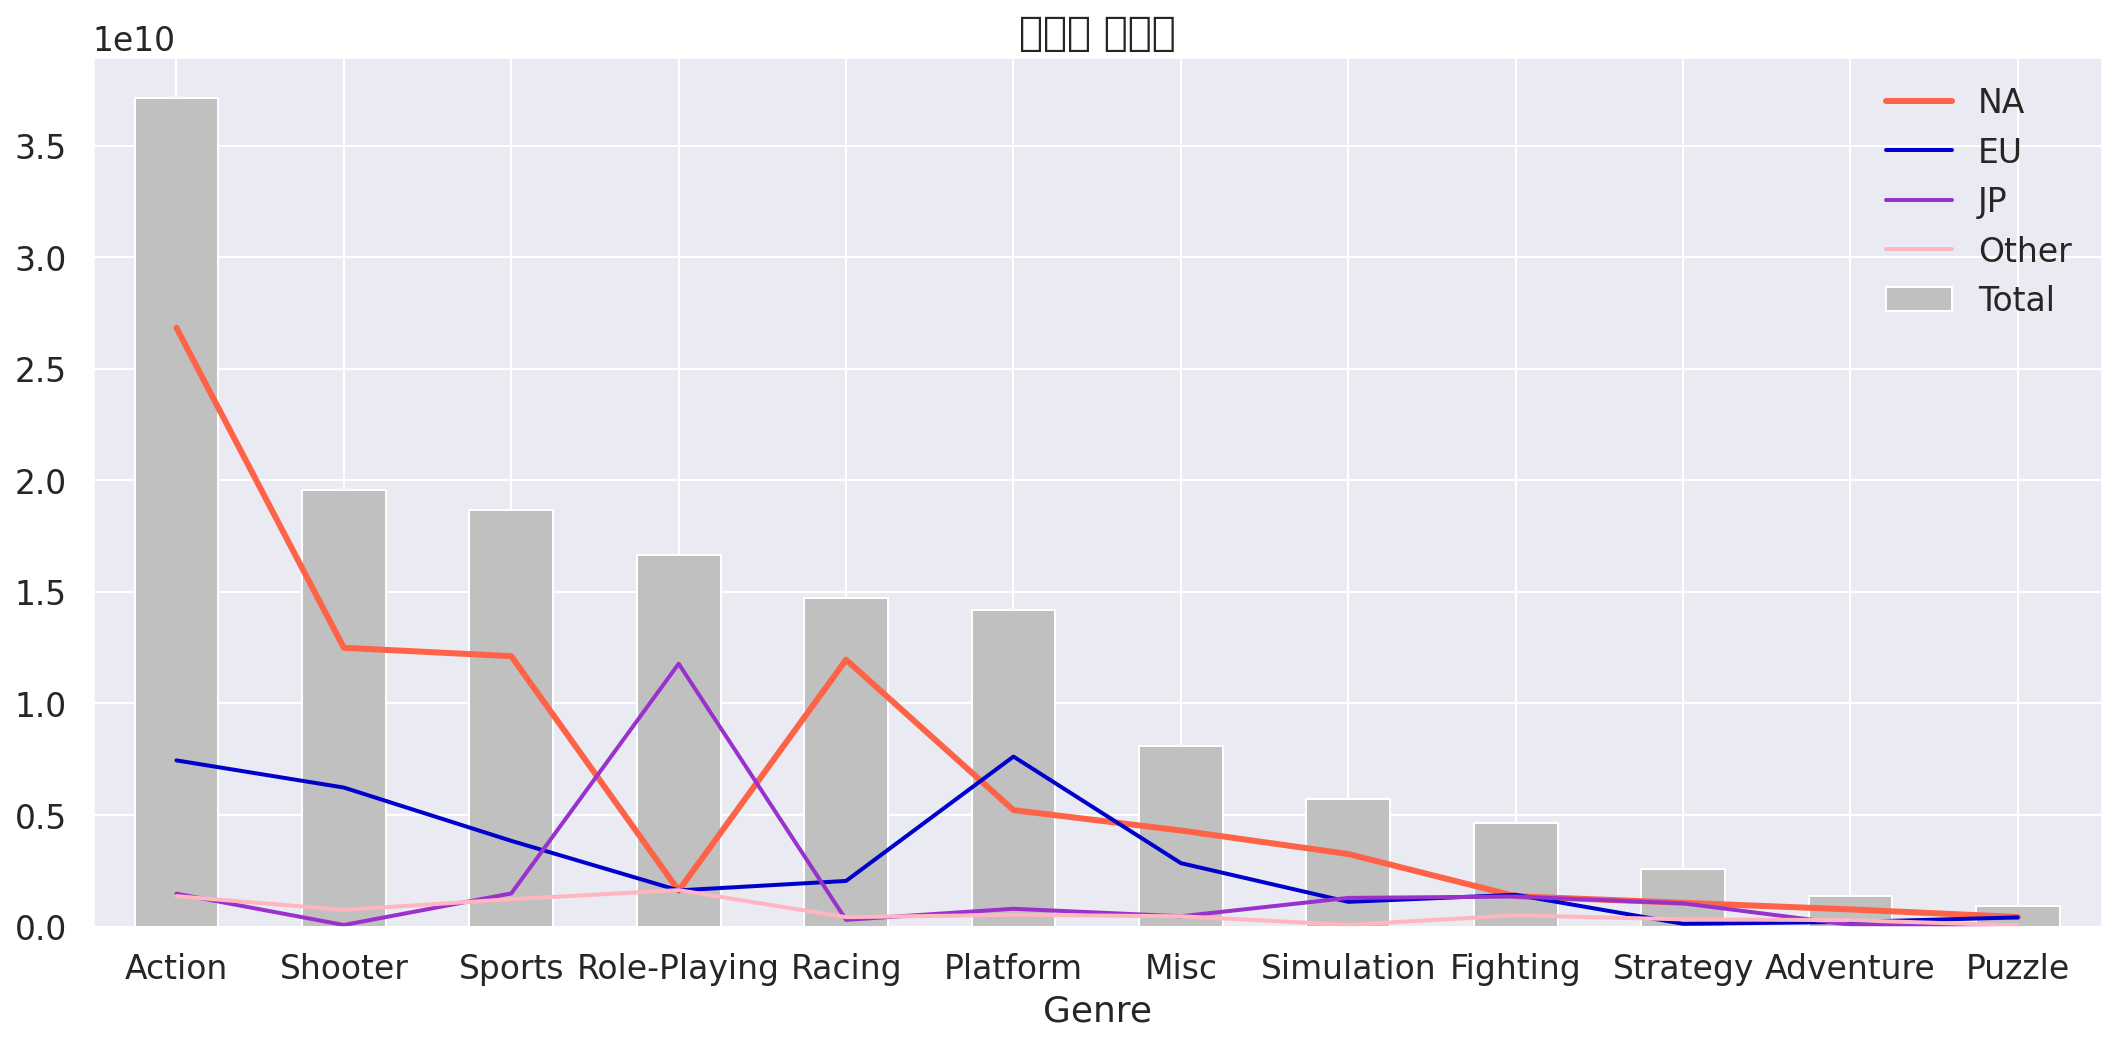

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(18,8))

G_gen_sum['Total'].plot(kind='bar', color='silver');
G_gen_sum['NA'].plot(kind='line', color='tomato', linewidth = 3.);
G_gen_sum['EU'].plot(kind='line', color = 'mediumblue', linewidth = 2.);
G_gen_sum['JP'].plot(kind='line', color = 'darkorchid', linewidth = 2.);
G_gen_sum['Other'].plot(kind='line',color = 'lightpink', linewidth = 2.);
ax.set_title('장르별 매출액', fontsize = 20);
plt.legend()
plt.show();

Role-Playing Game
- 가장 매출이 높은 NA 지역에서 role-playing 게임이 특히 인기가 없었다.
- 대신 JP가 Role-Playing Game의 매출을 눂였다

Platform Game
- NA 지역의 Platform 게임이 매출이 총 매출에 비해 미진했다
- 하지만 EU에서 Platform 게임 매출 성적이 좋았다

# 5. Building Machine Learning Model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
Gpc = df.groupby(['Genre']).sum()
Gpc

Year             NA  ...         Other          Total
Genre                                 ...                             
Action        6736223 26832882799.00  ... 1364227100.00 37121855140.00
Adventure     2570361   769107099.00  ...  289033993.00  1352278767.00
Fighting      1697887  1360222599.00  ...  506040175.00  4638474599.00
Misc          3480605  4306420319.00  ...  463090677.00  8075861215.00
Platform      1771379  5220441478.00  ...  529069826.00 14168855428.00
Puzzle        1158969   430126319.00  ...   53019289.00   902263862.00
Racing        2492015 11959348666.00  ...  423083844.00 14729757341.00
Role-Playing  2976461  1612325806.00  ... 1635072359.00 16649940707.00
Shooter       2621726 12493572910.00  ...  749112035.00 19545051429.00
Simulation    1735717  3252183449.00  ...   79041337.00  5727423284.00
Sports        4692794 12119684868.00  ... 1228144707.00 18677388593.00
Strategy      1363838  1068086637.00  ...  325024046.00  2562212316.00

[12 rows x 6 columns]

In [ ]:
Gpc = Gpc[['NA','EU','JP','Other','Total']]
fea = Gpc.columns
ind = Gpc.index
Gpc_ =Gpc.reset_index()
Gpc

NA            EU  ...         Other          Total
Genre                                      ...                             
Action       26832882799.00 7448539433.00  ... 1364227100.00 37121855140.00
Adventure      769107099.00  208072200.00  ...  289033993.00  1352278767.00
Fighting      1360222599.00 1426112694.00  ...  506040175.00  4638474599.00
Misc          4306420319.00 2844229829.00  ...  463090677.00  8075861215.00
Platform      5220441478.00 7620194464.00  ...  529069826.00 14168855428.00
Puzzle         430126319.00  413057124.00  ...   53019289.00   902263862.00
Racing       11959348666.00 2046238720.00  ...  423083844.00 14729757341.00
Role-Playing  1612325806.00 1622193085.00  ... 1635072359.00 16649940707.00
Shooter      12493572910.00 6230313498.00  ...  749112035.00 19545051429.00
Simulation    3252183449.00 1110122311.00  ...   79041337.00  5727423284.00
Sports       12119684868.00 3843392938.00  ... 1228144707.00 18677388593.00
Strategy      1068086637.00  126048989.00  ...  325024046.00  2562212316.00

[12 rows x 5 columns]

## 5-1. 정규화

In [ ]:
scaler = StandardScaler()
norm_df = scaler.fit_transform(Gpc)
print('Standardized Data:\n')
pd.DataFrame(norm_df, columns=fea, index=ind)

Standardized Data:



NA    EU    JP  Other  Total
Genre                                       
Action        2.67  1.72 -0.07   1.49   2.51
Adventure    -0.80 -1.02 -0.51  -0.71  -1.07
Fighting     -0.72 -0.56 -0.11  -0.27  -0.74
Misc         -0.33 -0.03 -0.39  -0.36  -0.39
Platform     -0.21  1.78 -0.28  -0.22   0.22
Puzzle       -0.85 -0.95 -0.54  -1.20  -1.11
Racing        0.69 -0.33 -0.45  -0.44   0.27
Role-Playing -0.69 -0.49  3.27   2.04   0.46
Shooter       0.76  1.26 -0.52   0.23   0.75
Simulation   -0.47 -0.68 -0.13  -1.14  -0.63
Sports        0.71  0.35 -0.06   1.21   0.67
Strategy     -0.76 -1.05 -0.21  -0.64  -0.94

## 5-2. PCA

In [ ]:
# PCA 주성분
pca = PCA()
PC = pca.fit_transform(norm_df)

print("Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
print("\n2개의 주성분이 전체 분산의 %.3f를 설명한다\n" %sum(pca.explained_variance_ratio_[:2]))
print('PC1은 전체 분산의 %.3f를 설명\n'%pca.explained_variance_ratio_[0])
print('PC2은 전체 분산의 %.3f를 설명\n'%pca.explained_variance_ratio_[1])

# 주성분으로 이루어진 데이터프레임 구성
print('\n Principal Dataframe:\n')
PProjected = pd.DataFrame(data = PC, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])
PProjected

res_PC = pd.concat([PProjected, Gpc_[['Genre']]],axis=1)
res_PC

Eigenvectors: 
 [[ 0.49471286  0.46223446  0.13684254  0.45976294  0.55811347]
 [-0.30438499 -0.29687638  0.78925639  0.44112283 -0.04122121]
 [-0.54302996  0.81047693  0.13185988 -0.07979839 -0.15649534]
 [-0.2059292  -0.03178314 -0.53451647  0.76569172 -0.29084587]
 [-0.57036882 -0.20080014 -0.2350608  -0.03710914  0.76008424]]

 Eigenvalues: 
 [3.44510228e+00 1.60009894e+00 3.25353138e-01 8.39910947e-02
 2.24318949e-33]

2개의 주성분이 전체 분산의 0.925를 설명한다

PC1은 전체 분산의 0.632를 설명

PC2은 전체 분산의 0.293를 설명


 Principal Dataframe:



principal component 1  ...         Genre
0                    4.19  ...        Action
1                   -1.86  ...     Adventure
2                   -1.17  ...      Fighting
3                   -0.61  ...          Misc
4                    0.70  ...      Platform
5                   -2.10  ...        Puzzle
6                    0.08  ...        Racing
7                    1.08  ...  Role-Playing
8                    1.41  ...       Shooter
9                   -1.44  ...    Simulation
10                   1.43  ...        Sports
11                  -1.71  ...      Strategy

[12 rows x 6 columns]

## 5-3. Scatter Plot

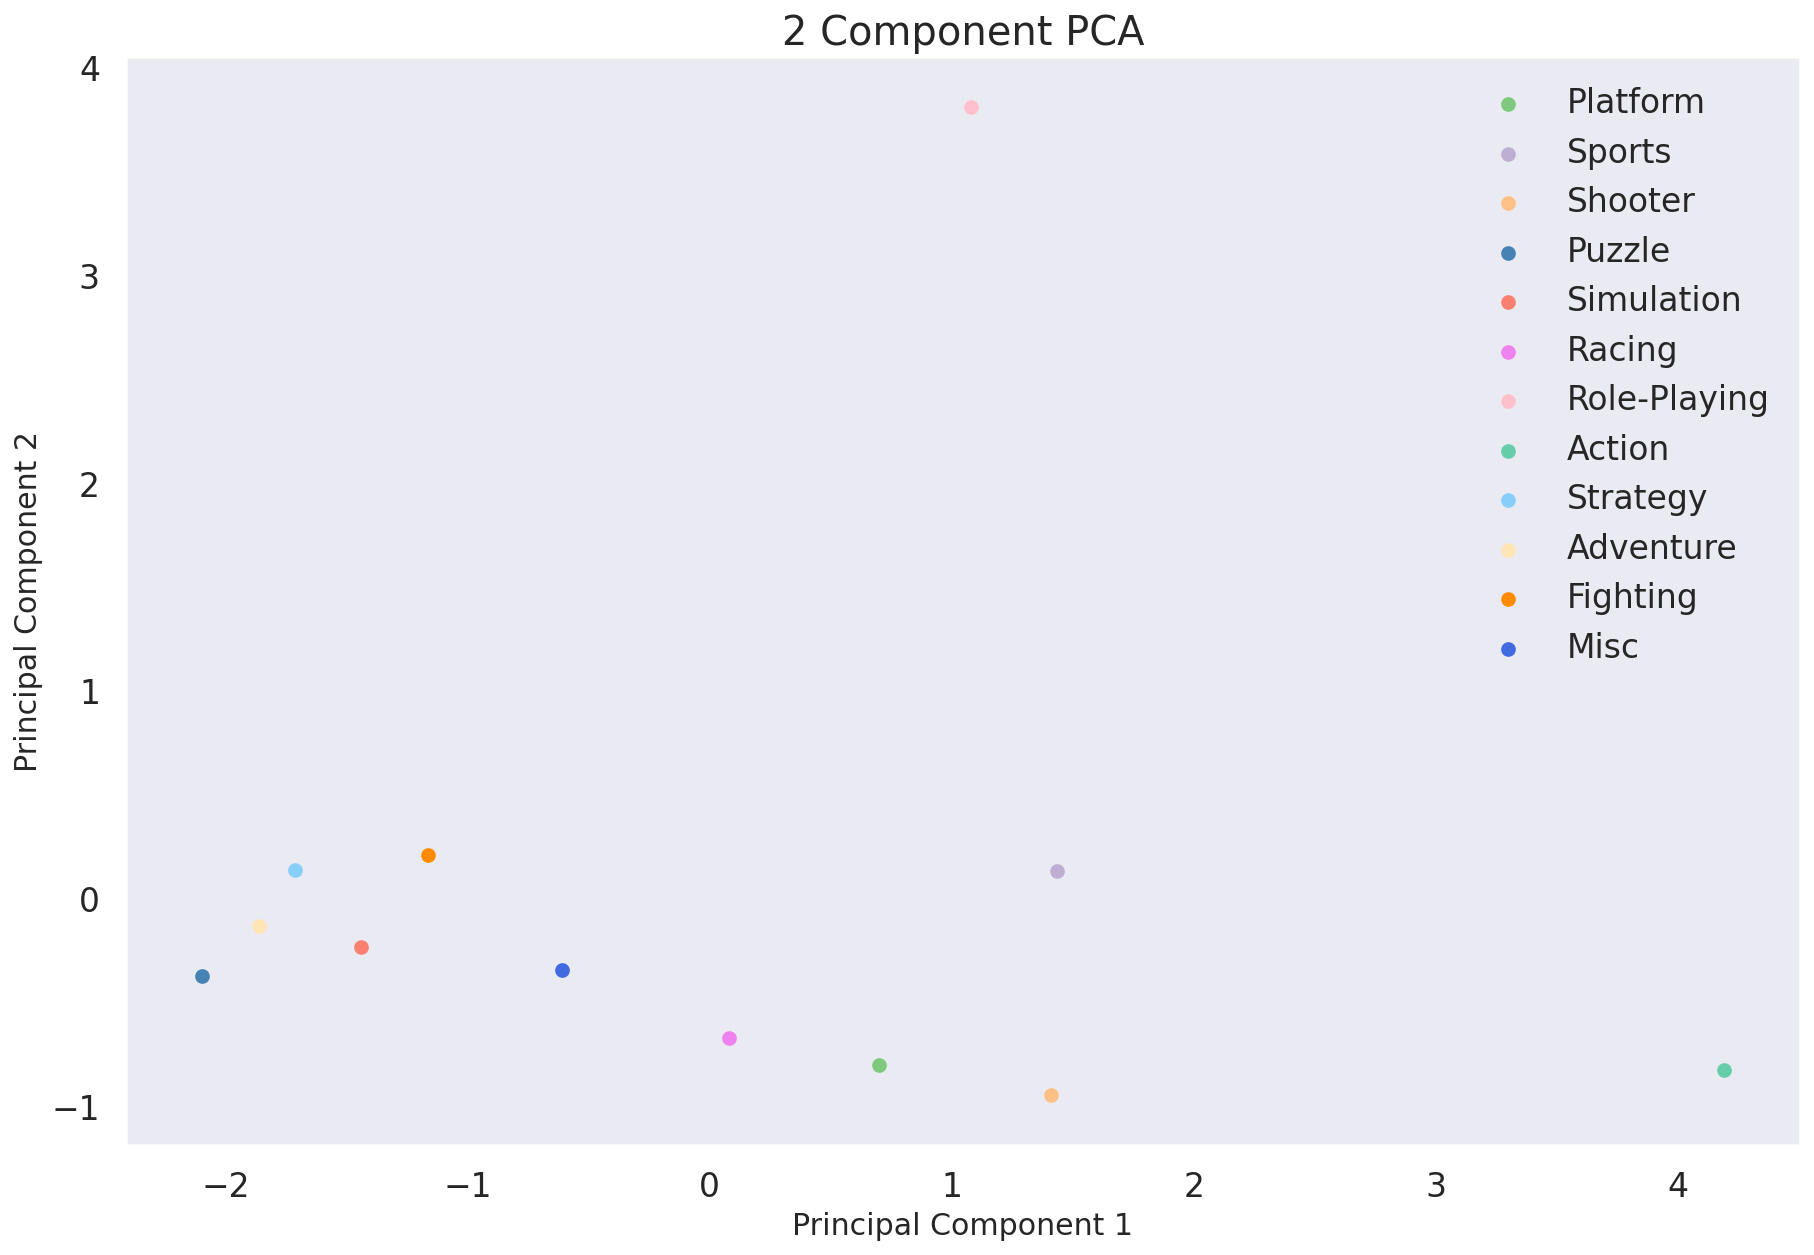

In [ ]:
y = list(set(Gpc.index.tolist()))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

colors = ["#7fc97f","#beaed4","#fdc086","steelblue",'salmon','violet','pink','mediumaquamarine','lightskyblue','moccasin','darkorange','royalblue']
for label, color in zip(y, colors):
  indicesToKeep = res_PC['Genre'] == label
  ax.scatter(res_PC.loc[indicesToKeep, 'principal component 1'], res_PC.loc[indicesToKeep, 'principal component 2'], c = color, s=40)

ax.legend(y)
ax.grid()

## 5-4. K-means Clustering

In [ ]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

def plot_clusters(df, column_header, centroids,i):
  colors = ["darkorange","darkviolet","#7fc97f","#beaed4"]
  name = ['0', '1','2','3']
  
  fig = plt.figure(figsize = (12,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('x', fontsize = 15)
  ax.set_ylabel('y', fontsize = 15)
  ax.set_title('%d-Means Clustering' %i,fontsize = 20)
  
  if i==2:
    ax.plot(centroids.iloc[0]['x'], centroids.iloc[0]['y'], "ok") # 기존 중심점
    ax.plot(centroids.iloc[1]['x'], centroids.iloc[1]['y'], "ok")
  elif i==3:
    ax.plot(centroids.iloc[0]['x'], centroids.iloc[0]['y'], "ok") # 기존 중심점
    ax.plot(centroids.iloc[1]['x'], centroids.iloc[1]['y'], "ok")
    ax.plot(centroids.iloc[2]['x'], centroids.iloc[2]['y'], "ok")
  else:
    ax.plot(centroids.iloc[0]['x'], centroids.iloc[0]['y'], "ok") # 기존 중심점
    ax.plot(centroids.iloc[1]['x'], centroids.iloc[1]['y'], "ok")
    ax.plot(centroids.iloc[2]['x'], centroids.iloc[2]['y'], "ok")
    ax.plot(centroids.iloc[3]['x'], centroids.iloc[3]['y'], "ok")
  grouped = df.groupby(column_header)
  
  for key, group in grouped:
      group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = name[key] , color = colors[key])
      plt.legend()

### (1) Total

In [ ]:
name = df[['Name', 'NA','EU','JP','Other','Total']] # 독립변수
name = name.set_index('Name')

fea = name.columns
ind = name.index
name_ =name.reset_index()

scaler = StandardScaler()
norm_df = scaler.fit_transform(name)
print('Standardized Data:\n')
pd.DataFrame(norm_df, columns=fea, index=ind)

# PCA 주성분
pca = PCA(n_components=2)
PC = pca.fit_transform(norm_df)

print("Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
print("\n2개의 주성분이 전체 분산의 %.3f를 설명한다\n" %sum(pca.explained_variance_ratio_[:2]))
print('PC1은 전체 분산의 %.3f를 설명\n'%pca.explained_variance_ratio_[0])
print('PC2은 전체 분산의 %.3f를 설명\n'%pca.explained_variance_ratio_[1])

# 주성분으로 이루어진 데이터프레임 구성
print('\n Principal Dataframe:\n')
PProjected = pd.DataFrame(data = PC, columns = ['x', 'y'])

PProjected.shape
PProjected.info()

Standardized Data:

Eigenvectors: 
 [[ 0.62114182  0.25571216  0.21445786  0.05499742  0.70694925]
 [ 0.25703682 -0.56623254 -0.24970576  0.74226053 -0.00301977]]

 Eigenvalues: 
 [2.00097298 1.00315332]

2개의 주성분이 전체 분산의 0.601를 설명한다

PC1은 전체 분산의 0.400를 설명

PC2은 전체 분산의 0.201를 설명


 Principal Dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16596 entries, 0 to 16595
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       16596 non-null  float64
 1   y       16596 non-null  float64
dtypes: float64(2)
memory usage: 259.4 KB


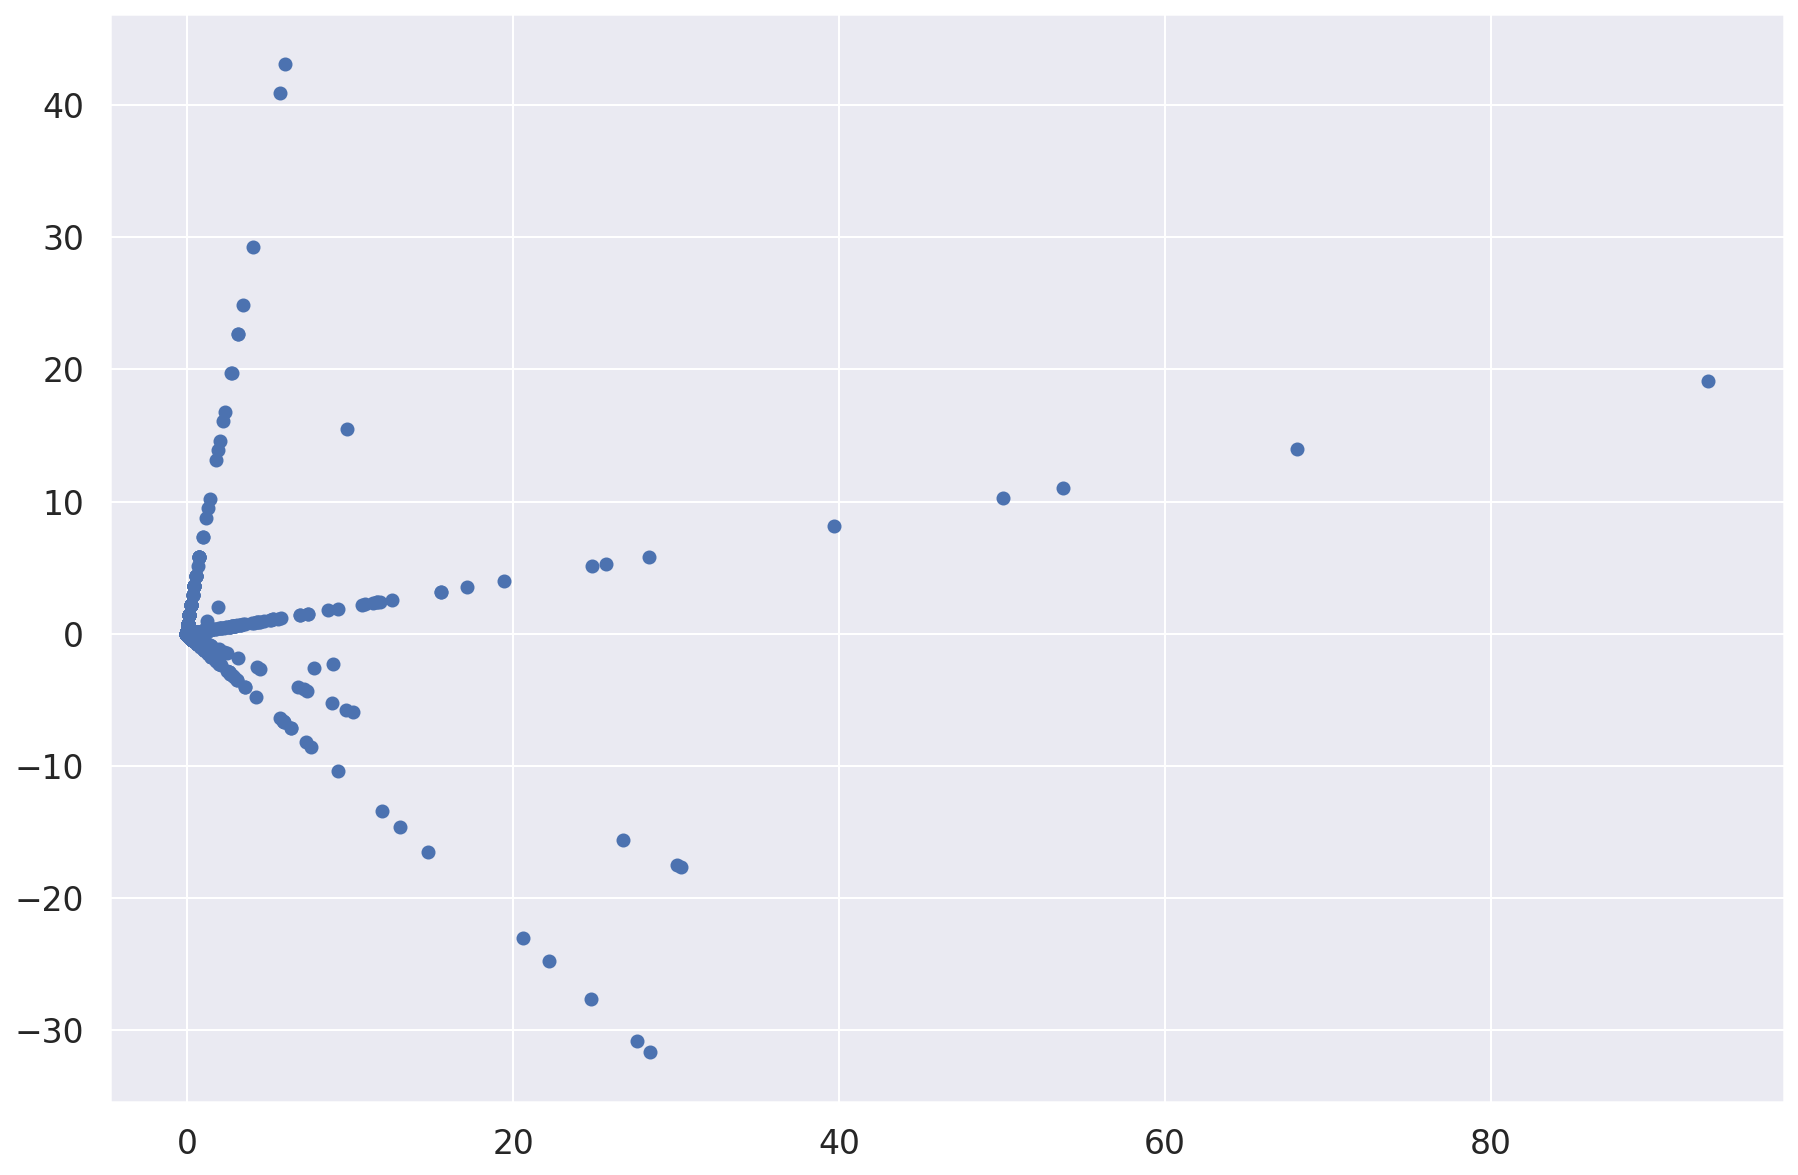

In [ ]:
plt.scatter(PProjected['x'],PProjected['y']);

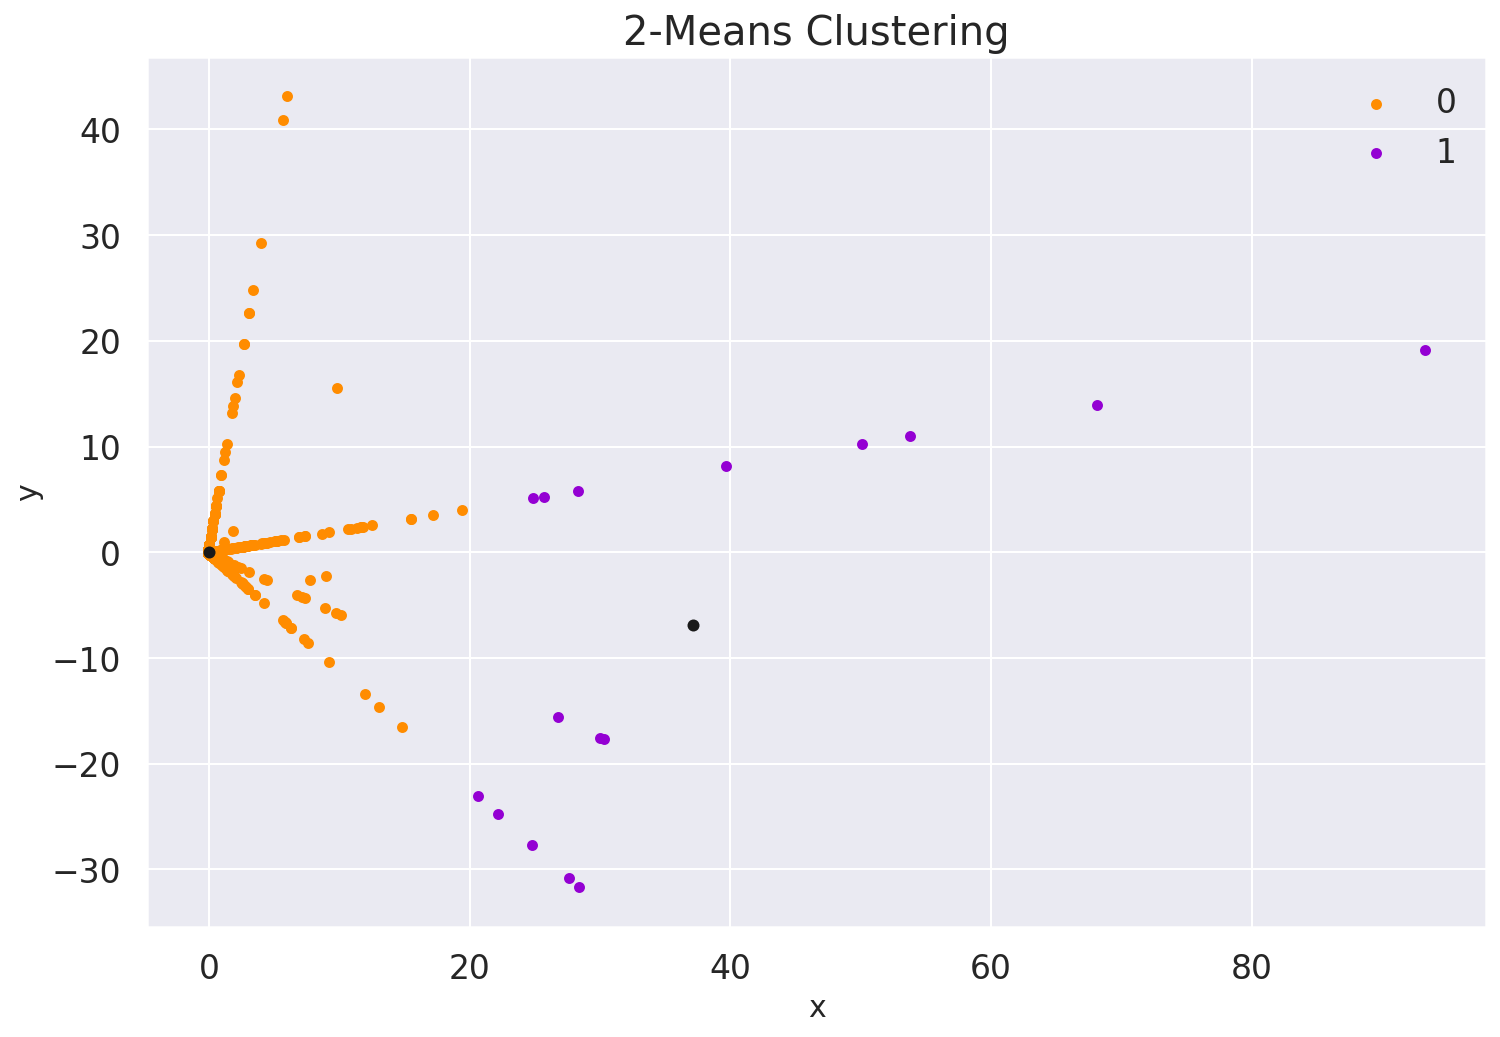

In [ ]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(PProjected)
labels_2 = kmeans_2.labels_
PProjected['clusters_2'] = labels_2
PProjected

centroids_2 = get_centroids(PProjected, 'clusters_2')
plot_clusters(PProjected, 'clusters_2', centroids_2, 2)

### (2) Platform

In [ ]:
# name = df[['Name', 'NA','EU','JP','Other','Total']]
name = df.groupby(['Platform']).sum()
name

Year             NA  ...         Other          Total
Platform                          ...                             
2600       263605   350090250.00  ...       7114.00   463106123.00
3DO          5984           9.00  ...          9.00         127.00
3DS       1024630  5723079897.00  ...  220013253.00  6629255594.00
DC         103997        5568.00  ...       3405.00     3019364.00
DS        4343733  5185399409.00  ...  205081340.00  8188895421.00
GB         195608      114476.00  ...      11338.00  3190255723.00
GBA       1646626  4980185767.00  ...   36015278.00  9011340003.00
GC        1113871   790132736.00  ...   46012091.00  1382215158.00
GEN         53812       19318.00  ...    3000935.00   263028243.00
GG           1992           3.00  ...          3.00          49.00
N64        637533 10250128869.00  ...   43004931.00 14493205669.00
NES        194741   520125489.00  ...  213008202.00   733253599.00
NG          23934          36.00  ...         36.00        1548.00
PC        1928460   858112108.00  ...  389040677.00  2276315660.00
PCFX         1996           3.00  ...          3.00          39.00
PS        2389613  5323331814.00  ...  458047097.00 14893738231.00
PS2       4331818  5653582723.00  ... 1335208815.00 12612318027.00
PS3       2670372  4019392222.00  ... 1430147331.00 12903982703.00
PS4        677042  3653093420.00  ...  700045894.00  4832283477.00
PSP       2436536  1342121508.00  ...  176056138.00  2677340490.00
PSV        831797   606016416.00  ...   59015168.00   817072736.00
SAT        345313   343006881.00  ...    3012565.00  1416051686.00
SCD         11963        1015.00  ...         65.00        1905.00
SNES       476529     3067809.00  ...      12799.00   246222561.00
TG16         3990           6.00  ...          6.00         178.00
WS          12000          18.00  ...         18.00        1474.00
Wii       2659868  5529508706.00  ...  496084077.00  8863977502.00
WiiU       287944  1180037212.00  ...    3006561.00  1859080417.00
X360      2542535 22013582415.00  ... 1763093311.00 30574974382.00
XB        1650983  1220185479.00  ...   55018877.00  2400283105.00
XOne       429150  1880081367.00  ...   10012051.00  3420141487.00

[31 rows x 6 columns]

In [ ]:
# name = name.set_index('Platform')
fea = name.columns
ind = name.index
name_ =name.reset_index()

scaler = StandardScaler()
norm_df = scaler.fit_transform(name)
print('Standardized Data:\n')
pd.DataFrame(norm_df, columns=fea, index=ind)

# PCA 주성분
pca = PCA(n_components=2)
PC = pca.fit_transform(norm_df)

print("Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
print("\n2개의 주성분이 전체 분산의 %.3f를 설명한다\n" %sum(pca.explained_variance_ratio_[:2]))
print('PC1은 전체 분산의 %.3f를 설명\n'%pca.explained_variance_ratio_[0])
print('PC2은 전체 분산의 %.3f를 설명\n'%pca.explained_variance_ratio_[1])

# 주성분으로 이루어진 데이터프레임 구성
print('\n Principal Dataframe:\n')
PProjected = pd.DataFrame(data = PC, columns = ['x', 'y'])
PProjected

pl2 = PProjected

Standardized Data:

Eigenvectors: 
 [[ 0.38043877  0.43697373  0.46409146  0.15832318  0.44215479  0.47788318]
 [ 0.15823976 -0.11661741 -0.14145004  0.93251224 -0.26276893  0.05220982]]

 Eigenvalues: 
 [4.22639888 1.03890128]

2개의 주성분이 전체 분산의 0.849를 설명한다

PC1은 전체 분산의 0.682를 설명

PC2은 전체 분산의 0.168를 설명


 Principal Dataframe:



In [ ]:
PProjected.shape
PProjected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       31 non-null     float64
 1   y       31 non-null     float64
dtypes: float64(2)
memory usage: 624.0 bytes


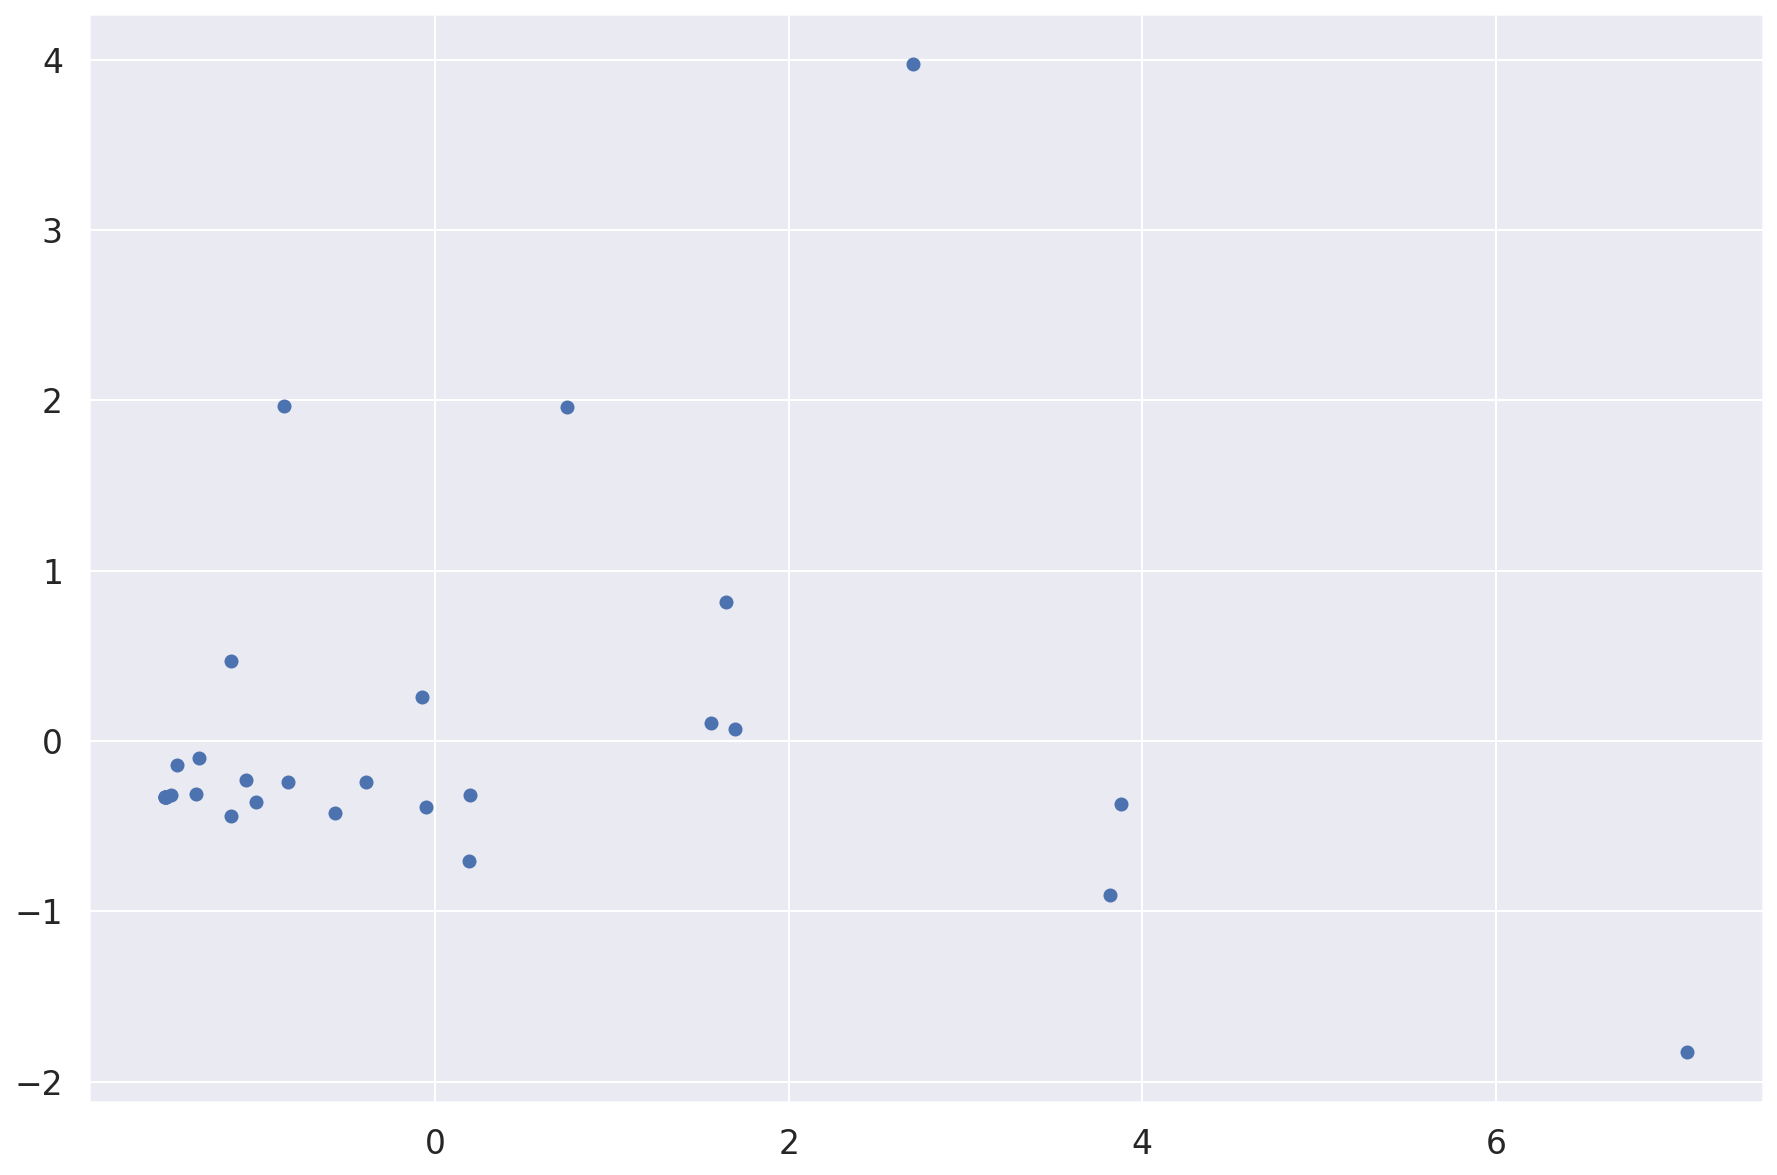

In [ ]:
plt.scatter(PProjected['x'],PProjected['y']);

In [ ]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(PProjected)
labels_2 = kmeans_2.labels_
PProjected['clusters_2'] = labels_2
PProjected

x     y  clusters_2
0  -1.35 -0.31           0
1  -1.53 -0.33           0
2   0.19 -0.32           0
3  -1.50 -0.32           0
4   1.64  0.82           1
5  -0.86  1.97           0
6   0.74  1.96           0
7  -0.83 -0.24           0
8  -1.46 -0.14           0
9  -1.53 -0.33           0
10  1.70  0.07           1
11 -1.16 -0.44           0
12 -1.52 -0.33           0
13 -0.05 -0.39           0
14 -1.53 -0.33           0
15  2.71  3.98           1
16  3.88 -0.37           1
17  3.81 -0.91           1
18  0.19 -0.70           0
19 -0.08  0.26           0
20 -1.07 -0.23           0
21 -1.16  0.47           0
22 -1.53 -0.33           0
23 -1.34 -0.10           0
24 -1.53 -0.33           0
25 -1.53 -0.33           0
26  1.56  0.10           1
27 -1.02 -0.36           0
28  7.08 -1.83           1
29 -0.39 -0.24           0
30 -0.57 -0.42           0

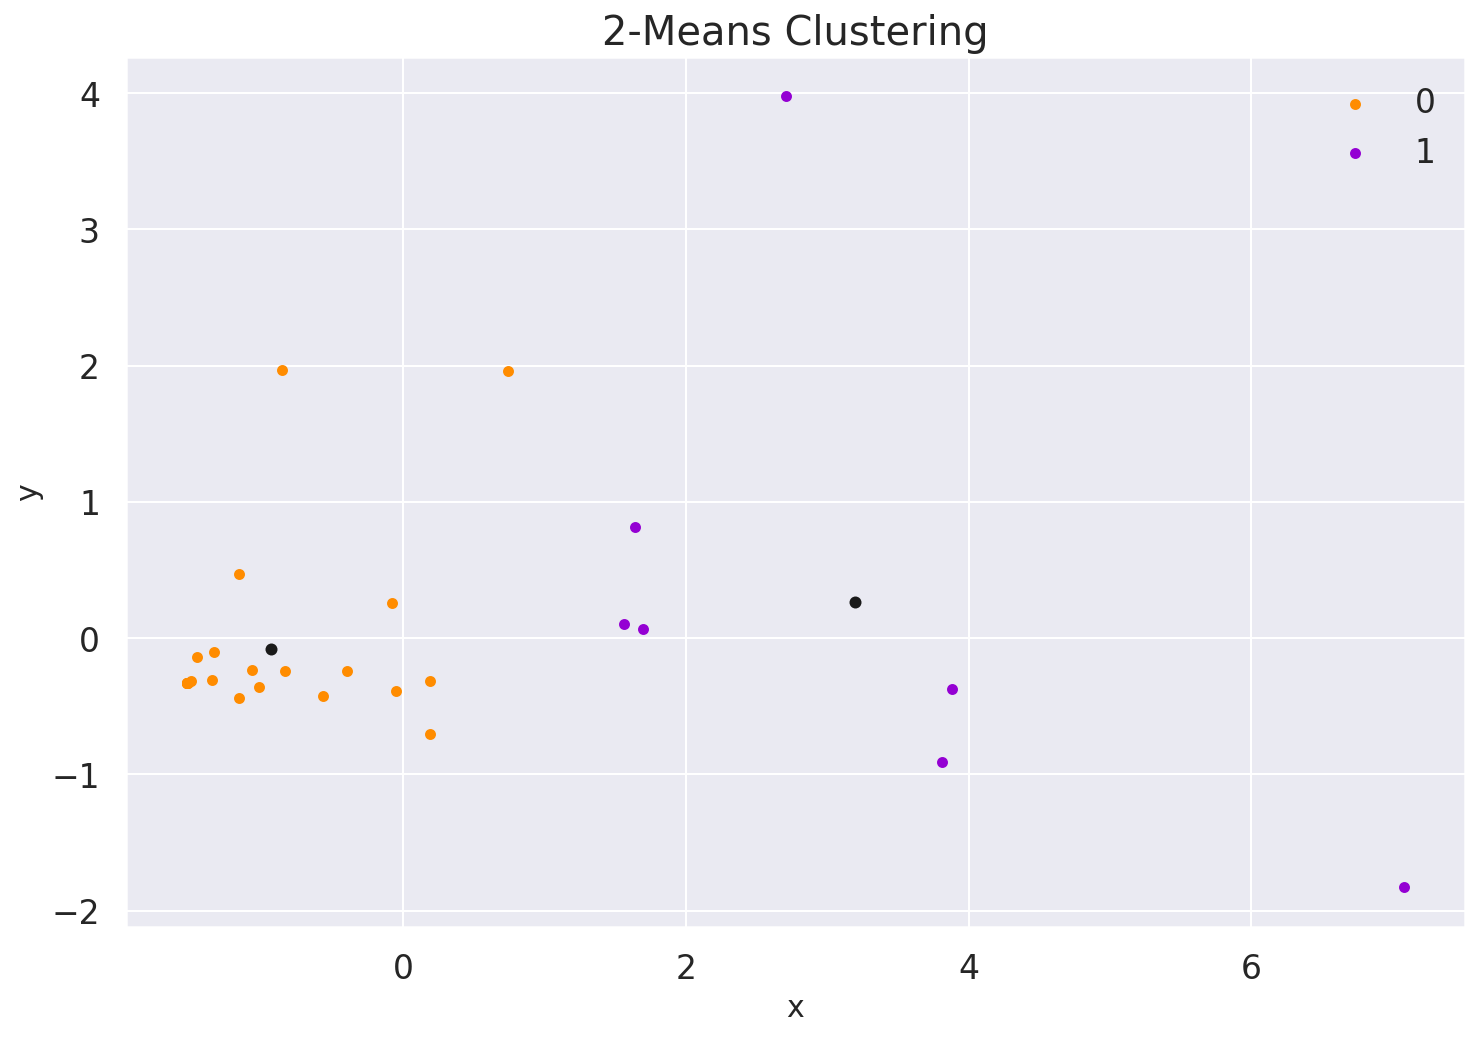

In [ ]:
centroids_2 = get_centroids(PProjected, 'clusters_2')
plot_clusters(PProjected, 'clusters_2', centroids_2, 2)

### (3) Genre

In [ ]:
name = df.groupby(['Genre']).sum()
name

fea = name.columns
ind = name.index
name_ =name.reset_index()

scaler = StandardScaler()
norm_df = scaler.fit_transform(name)
print('Standardized Data:\n')
pd.DataFrame(norm_df, columns=fea, index=ind)

# PCA 주성분
pca = PCA(n_components=2)
PC = pca.fit_transform(norm_df)

print("Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
print("\n2개의 주성분이 전체 분산의 %.3f를 설명한다\n" %sum(pca.explained_variance_ratio_[:2]))
print('PC1은 전체 분산의 %.3f를 설명\n'%pca.explained_variance_ratio_[0])
print('PC2은 전체 분산의 %.3f를 설명\n'%pca.explained_variance_ratio_[1])

# 주성분으로 이루어진 데이터프레임 구성
print('\n Principal Dataframe:\n')
PProjected = pd.DataFrame(data = PC, columns = ['x', 'y'])

PProjected.shape
PProjected.info()

Standardized Data:

Eigenvectors: 
 [[ 0.45469475  0.45454939  0.39497732  0.10802435  0.41229048  0.49897671]
 [-0.02804329 -0.29418837 -0.28162722  0.79326258  0.45090259 -0.02782469]]

 Eigenvalues: 
 [4.27153283 1.6015921 ]

2개의 주성분이 전체 분산의 0.897를 설명한다

PC1은 전체 분산의 0.653를 설명

PC2은 전체 분산의 0.245를 설명


 Principal Dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       12 non-null     float64
 1   y       12 non-null     float64
dtypes: float64(2)
memory usage: 320.0 bytes


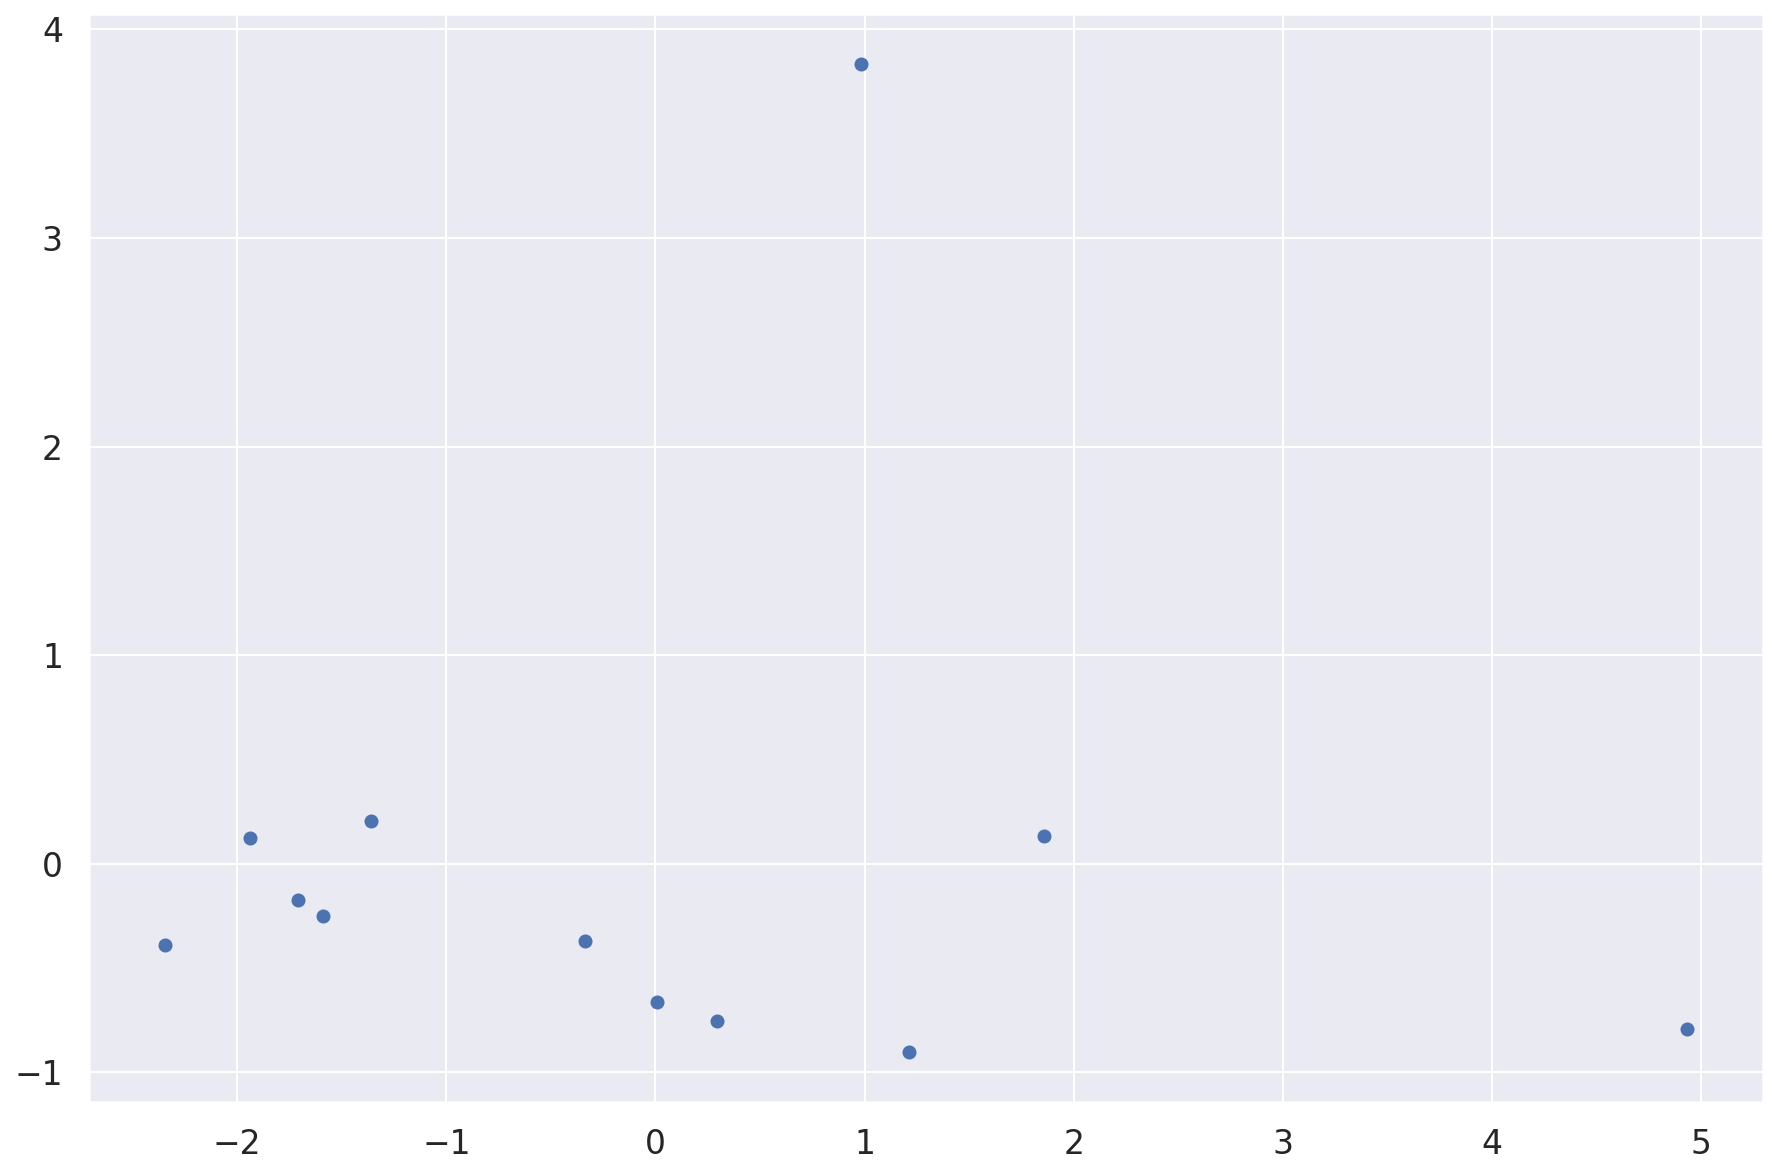

In [ ]:
plt.scatter(PProjected['x'],PProjected['y']);

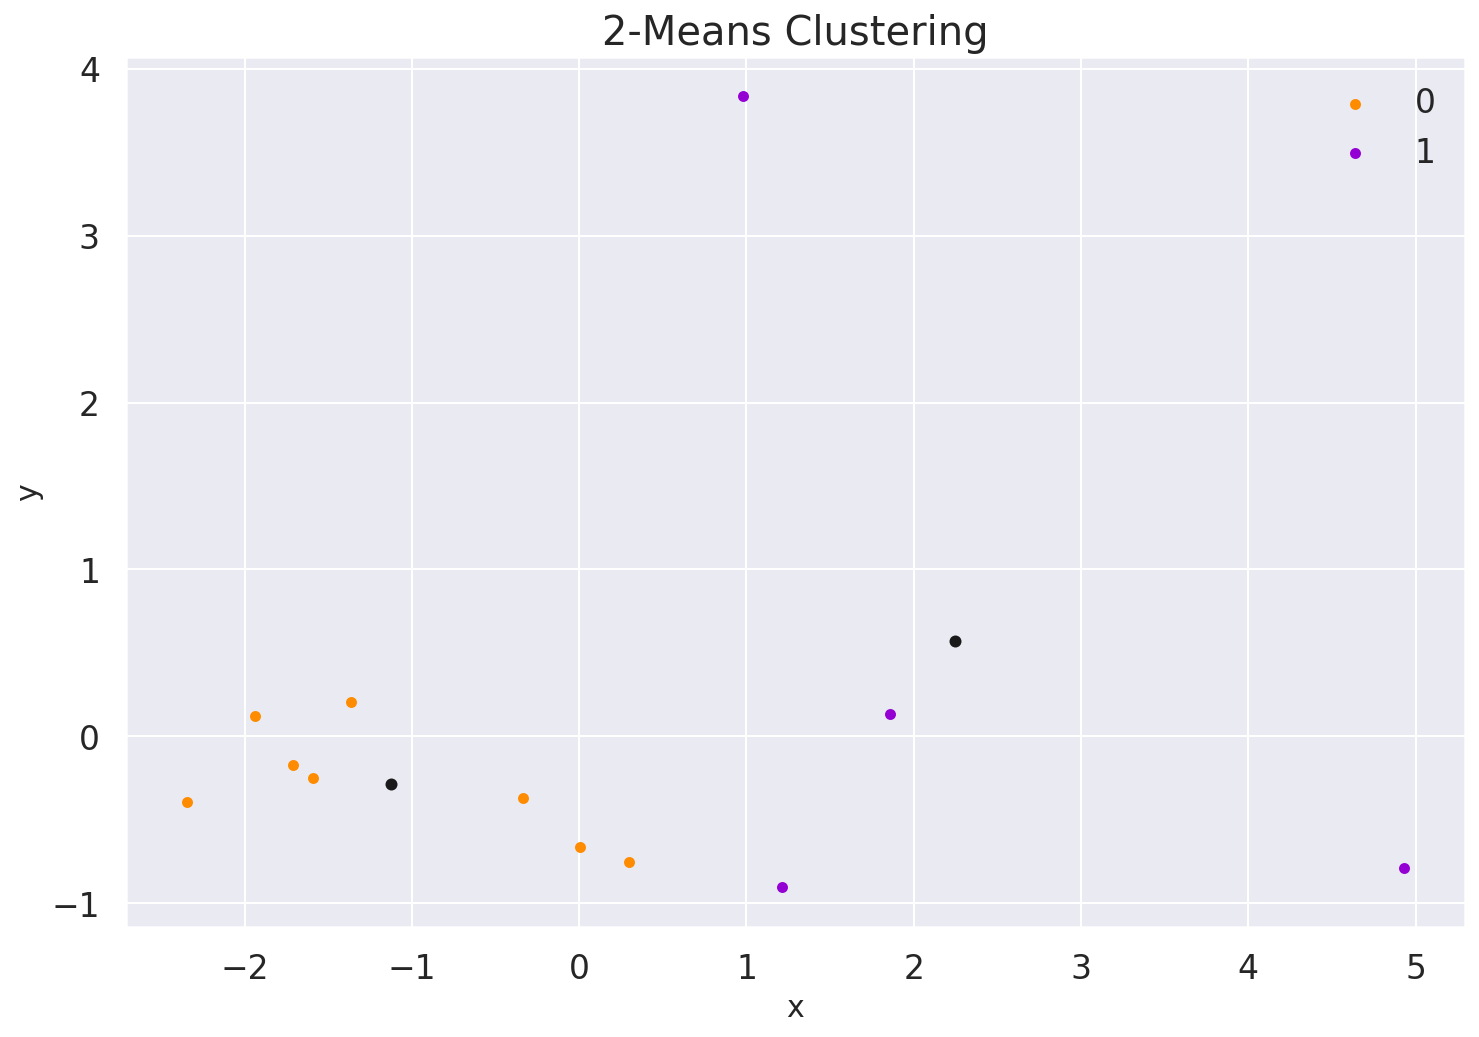

In [ ]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(PProjected)
labels_2 = kmeans_2.labels_
PProjected['clusters_2'] = labels_2

centroids_2 = get_centroids(PProjected, 'clusters_2')
plot_clusters(PProjected, 'clusters_2', centroids_2, 2)

### (4) Year

In [ ]:
name = df.groupby(['Year']).sum()
name

fea = name.columns
ind = name.index
name_ =name.reset_index()

scaler = StandardScaler()
norm_df = scaler.fit_transform(name)
print('Standardized Data:\n')
pd.DataFrame(norm_df, columns=fea, index=ind)

# PCA 주성분
pca = PCA(n_components=2)
PC = pca.fit_transform(norm_df)

print("Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
print("\n2개의 주성분이 전체 분산의 %.3f를 설명한다\n" %sum(pca.explained_variance_ratio_[:2]))
print('PC1은 전체 분산의 %.3f를 설명\n'%pca.explained_variance_ratio_[0])
print('PC2은 전체 분산의 %.3f를 설명\n'%pca.explained_variance_ratio_[1])

# 주성분으로 이루어진 데이터프레임 구성
print('\n Principal Dataframe:\n')
PProjected = pd.DataFrame(data = PC, columns = ['x', 'y'])

PProjected.shape
PProjected.info()

Standardized Data:

Eigenvectors: 
 [[ 0.51864696  0.4587792   0.15550612  0.43366333  0.55523052]
 [-0.11430216 -0.17958116  0.96877884 -0.10750505  0.06779261]]

 Eigenvalues: 
 [3.21383515 1.00666547]

2개의 주성분이 전체 분산의 0.822를 설명한다

PC1은 전체 분산의 0.626를 설명

PC2은 전체 분산의 0.196를 설명


 Principal Dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       39 non-null     float64
 1   y       39 non-null     float64
dtypes: float64(2)
memory usage: 752.0 bytes


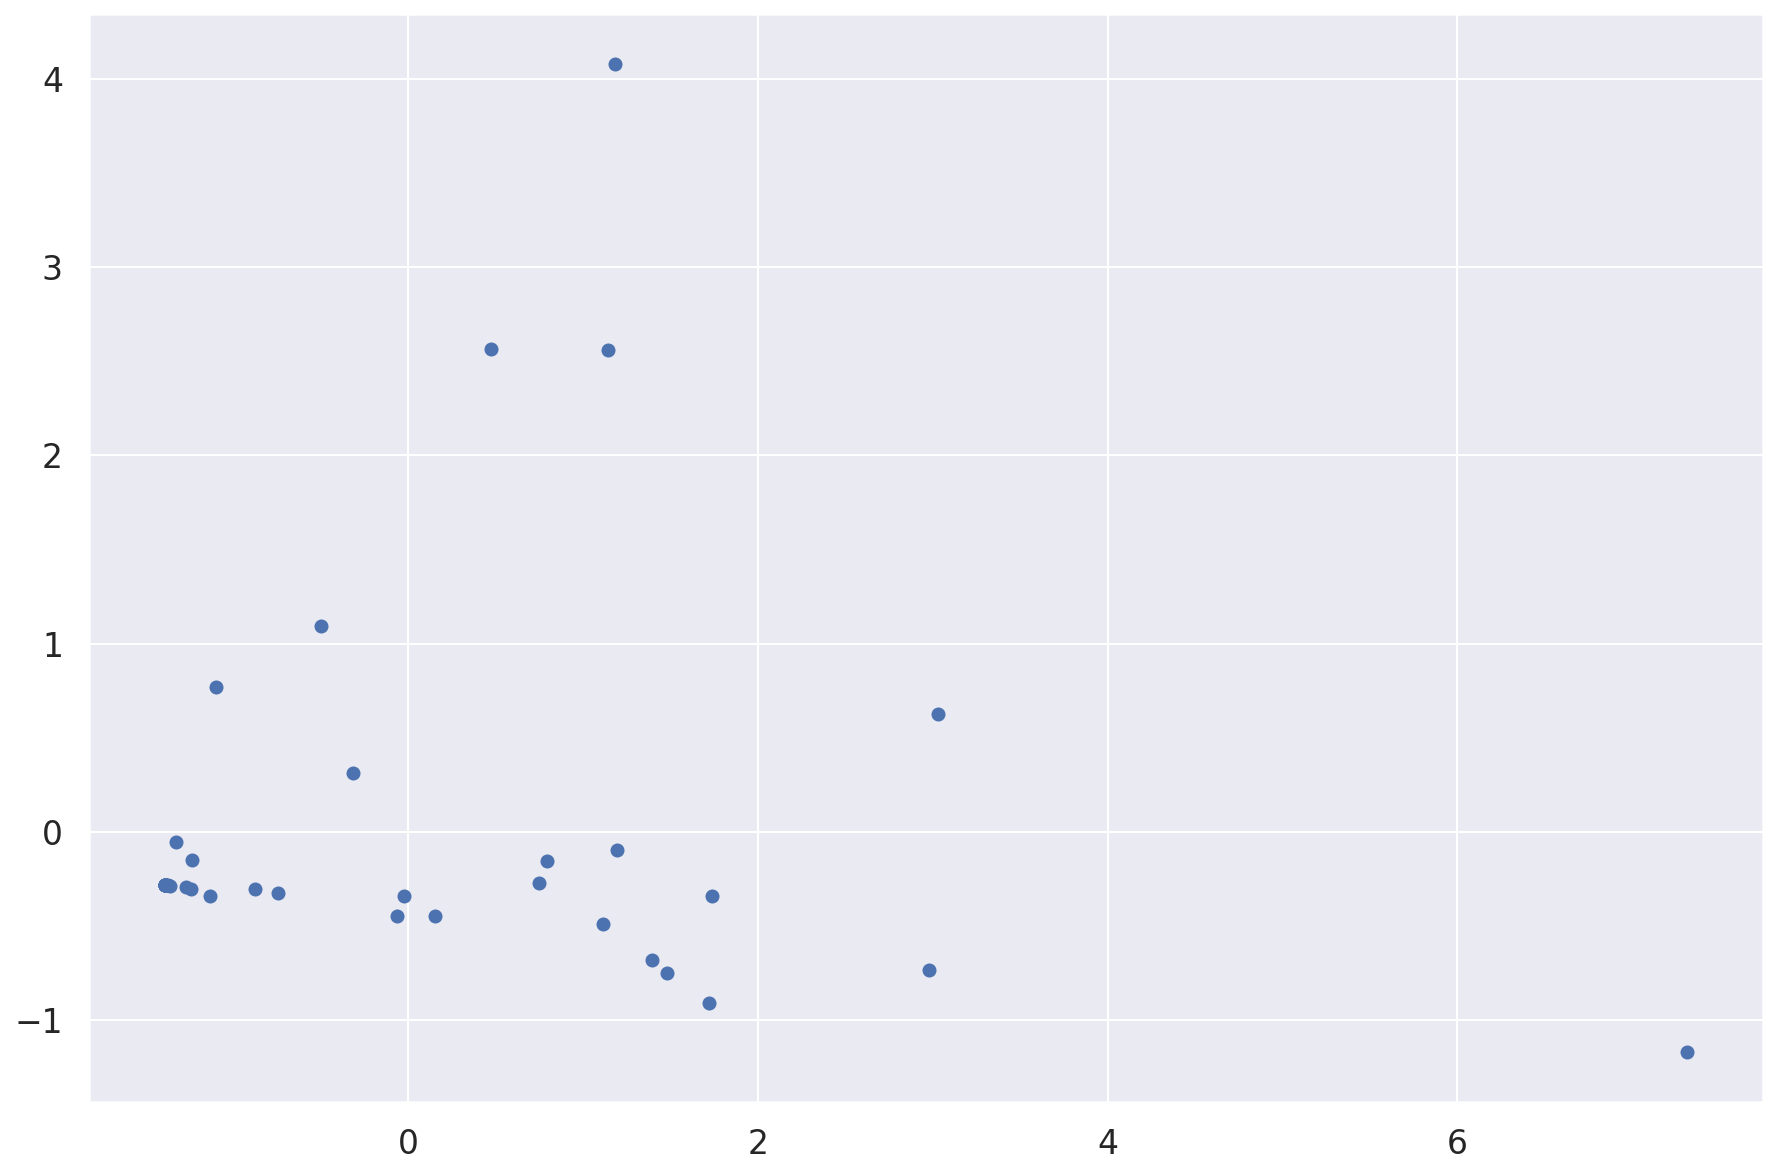

In [ ]:
plt.scatter(PProjected['x'],PProjected['y']);

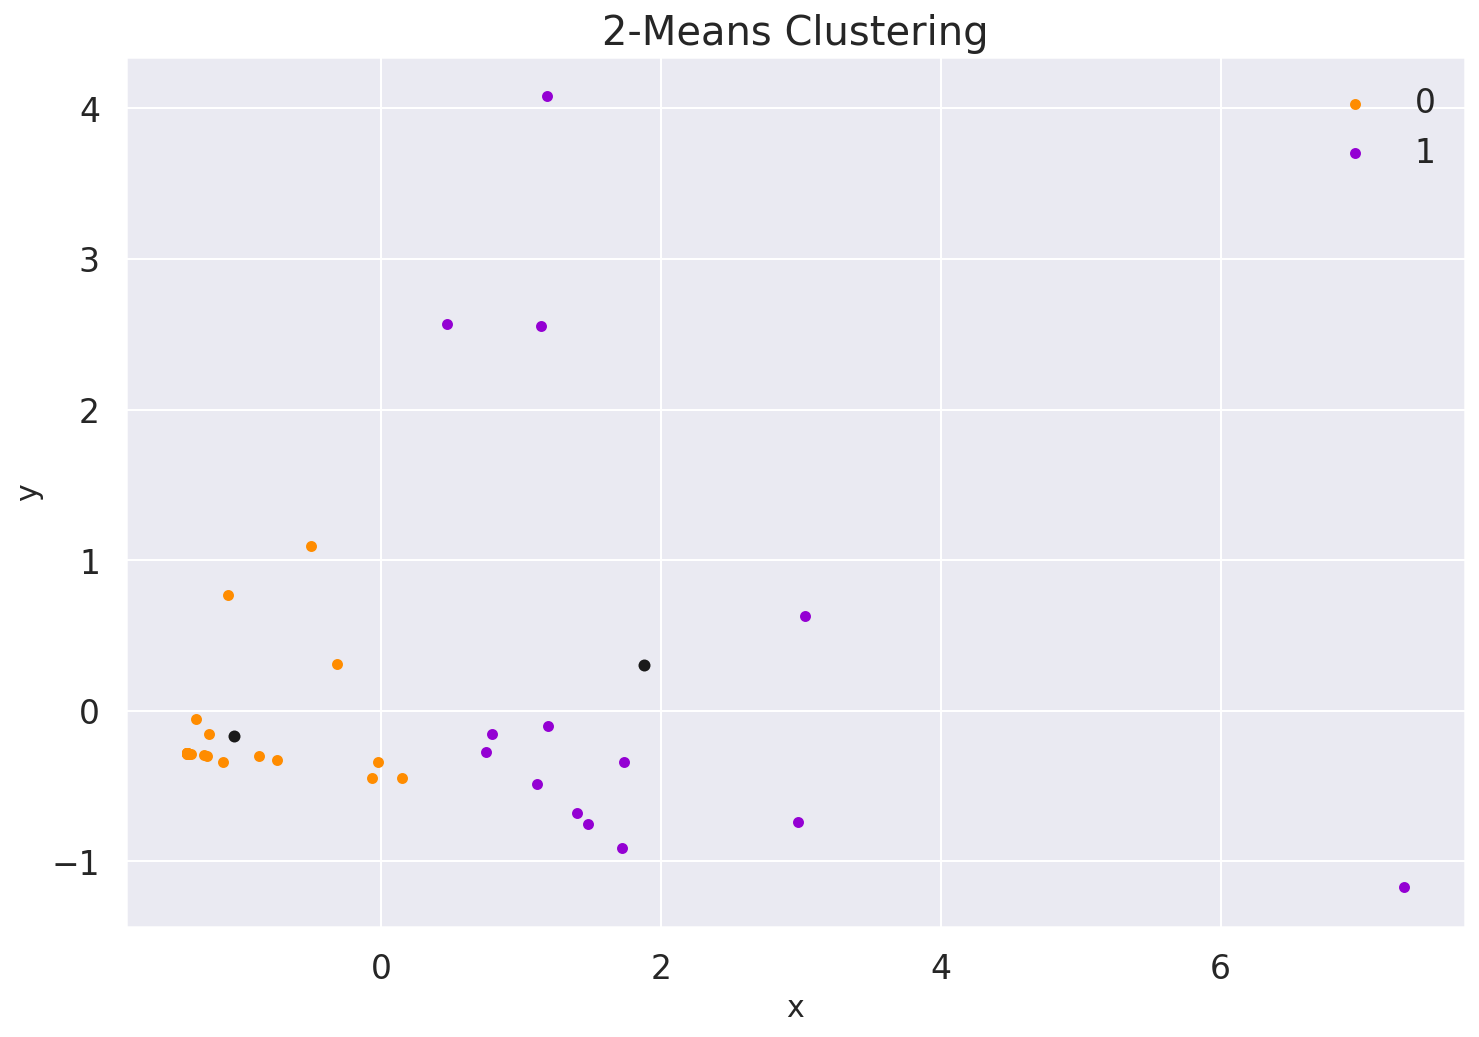

In [ ]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(PProjected)
labels_2 = kmeans_2.labels_
PProjected['clusters_2'] = labels_2
PProjected

centroids_2 = get_centroids(PProjected, 'clusters_2')
plot_clusters(PProjected, 'clusters_2', centroids_2, 2)

### (5) Publisher

In [ ]:
name = df.groupby(['Publisher']).sum()
name

fea = name.columns
ind = name.index
name_ =name.reset_index()

scaler = StandardScaler()
norm_df = scaler.fit_transform(name)
print('Standardized Data:\n')
pd.DataFrame(norm_df, columns=fea, index=ind)

# PCA 주성분
pca = PCA(n_components=2)
PC = pca.fit_transform(norm_df)

print("Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
print("\n2개의 주성분이 전체 분산의 %.3f를 설명한다\n" %sum(pca.explained_variance_ratio_[:2]))
print('PC1은 전체 분산의 %.3f를 설명\n'%pca.explained_variance_ratio_[0])
print('PC2은 전체 분산의 %.3f를 설명\n'%pca.explained_variance_ratio_[1])

# 주성분으로 이루어진 데이터프레임 구성
print('\n Principal Dataframe:\n')
PProjected = pd.DataFrame(data = PC, columns = ['x', 'y'])

PProjected.shape
PProjected.info()

Standardized Data:

Eigenvectors: 
 [[ 0.41627678  0.42865011  0.42842755  0.29731011  0.39068384  0.46732792]
 [-0.33344676  0.31119843 -0.28787896  0.66198205 -0.46166293  0.24029481]]

 Eigenvalues: 
 [4.19126274 1.15609021]

2개의 주성분이 전체 분산의 0.890를 설명한다

PC1은 전체 분산의 0.697를 설명

PC2은 전체 분산의 0.192를 설명


 Principal Dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       578 non-null    float64
 1   y       578 non-null    float64
dtypes: float64(2)
memory usage: 9.2 KB


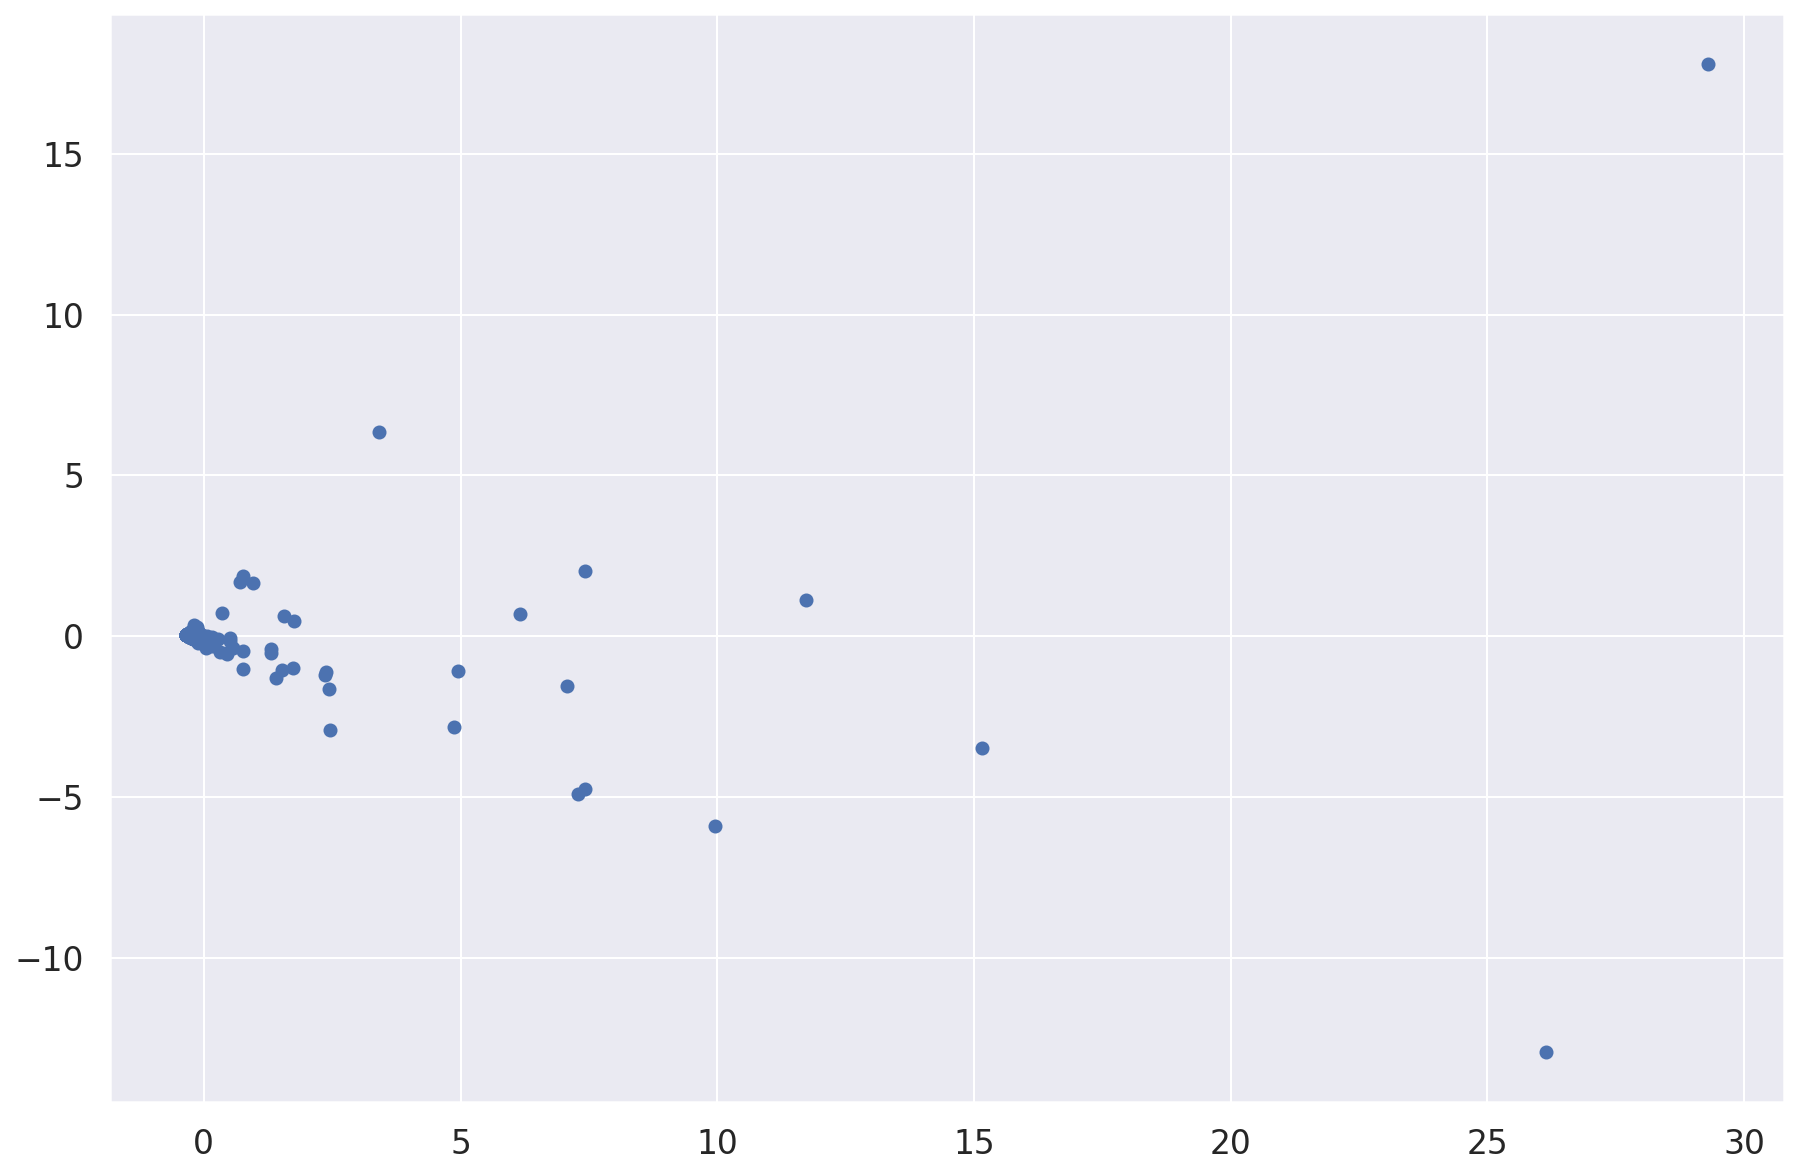

In [ ]:
plt.scatter(PProjected['x'],PProjected['y']);

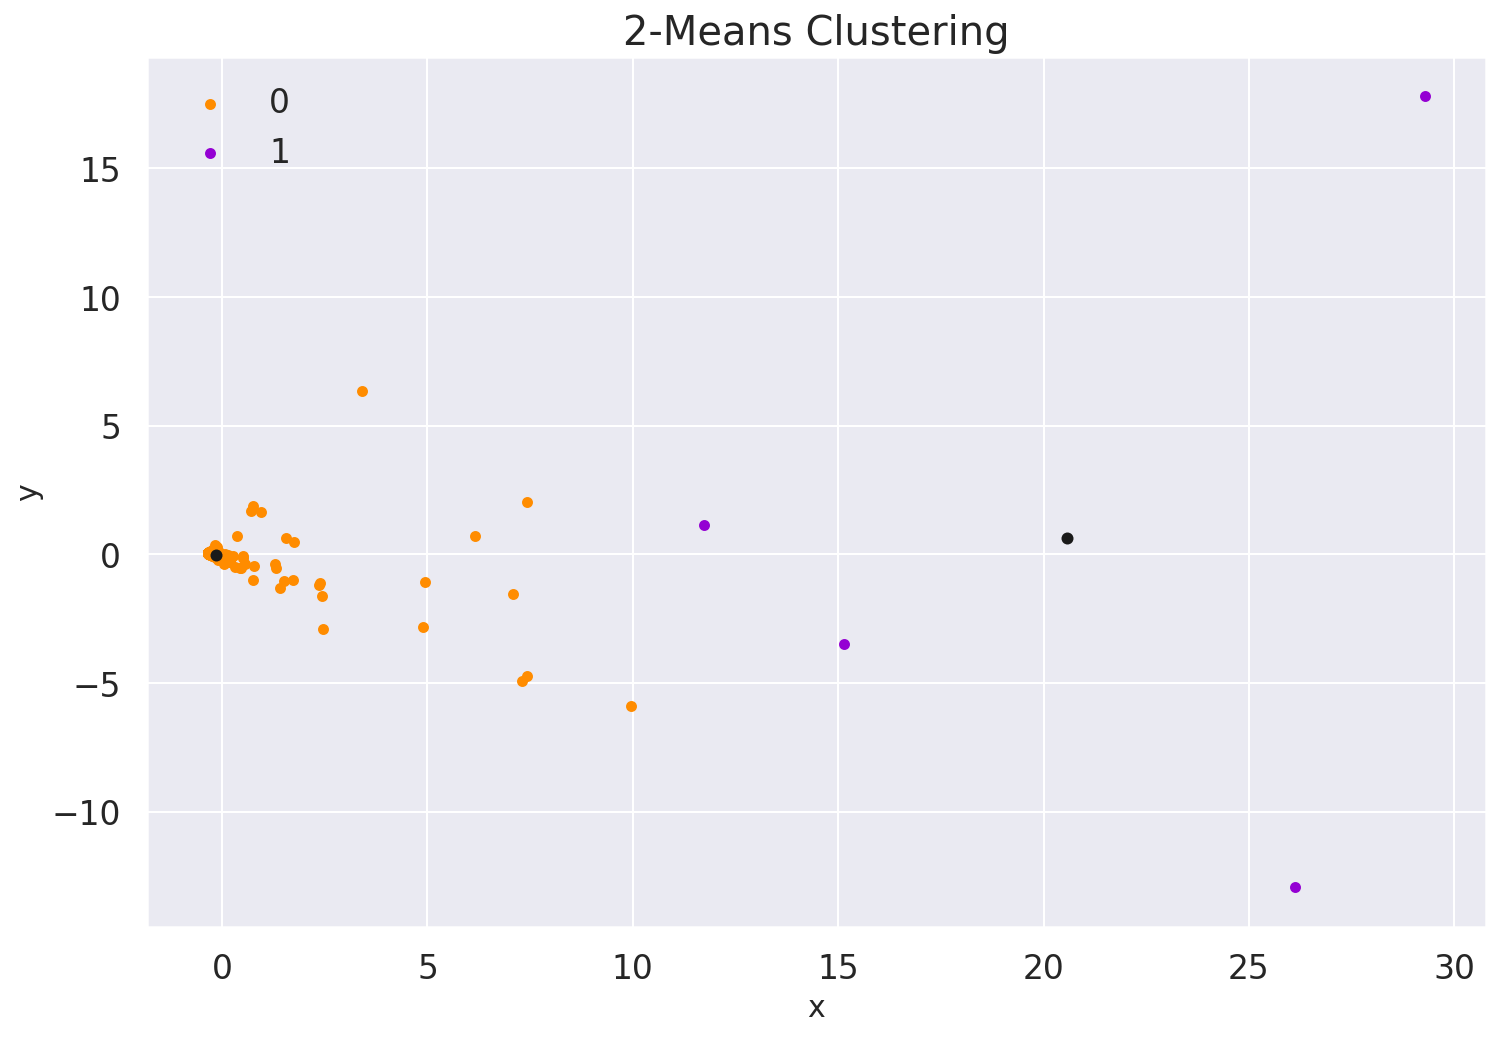

In [ ]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(PProjected)
labels_2 = kmeans_2.labels_
PProjected['clusters_2'] = labels_2
PProjected

centroids_2 = get_centroids(PProjected, 'clusters_2')
plot_clusters(PProjected, 'clusters_2', centroids_2, 2)

## 5-5. Hierarchical Clustering - Platform

In [ ]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import DBSCAN

In [ ]:
PC2 = pl2[['x','y']]
PC2

x     y
0  -1.35 -0.31
1  -1.53 -0.33
2   0.19 -0.32
3  -1.50 -0.32
4   1.64  0.82
5  -0.86  1.97
6   0.74  1.96
7  -0.83 -0.24
8  -1.46 -0.14
9  -1.53 -0.33
10  1.70  0.07
11 -1.16 -0.44
12 -1.52 -0.33
13 -0.05 -0.39
14 -1.53 -0.33
15  2.71  3.98
16  3.88 -0.37
17  3.81 -0.91
18  0.19 -0.70
19 -0.08  0.26
20 -1.07 -0.23
21 -1.16  0.47
22 -1.53 -0.33
23 -1.34 -0.10
24 -1.53 -0.33
25 -1.53 -0.33
26  1.56  0.10
27 -1.02 -0.36
28  7.08 -1.83
29 -0.39 -0.24
30 -0.57 -0.42

In [ ]:
linkage_pc = ward(PC2) 
linkage_pc

array([[9.00000000e+00, 1.40000000e+01, 1.32056112e-06, 2.00000000e+00],
       [2.20000000e+01, 2.50000000e+01, 1.24330788e-05, 2.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 6.60515202e-04, 2.00000000e+00],
       [3.10000000e+01, 3.30000000e+01, 1.40221914e-03, 4.00000000e+00],
       [1.20000000e+01, 3.20000000e+01, 4.57207071e-03, 3.00000000e+00],
       [3.40000000e+01, 3.50000000e+01, 7.65308705e-03, 7.00000000e+00],
       [3.00000000e+00, 3.60000000e+01, 4.28005827e-02, 8.00000000e+00],
       [8.00000000e+00, 2.30000000e+01, 1.30476615e-01, 2.00000000e+00],
       [2.00000000e+01, 2.70000000e+01, 1.38361453e-01, 2.00000000e+00],
       [1.00000000e+01, 2.60000000e+01, 1.38559033e-01, 2.00000000e+00],
       [1.10000000e+01, 3.90000000e+01, 2.10636643e-01, 3.00000000e+00],
       [0.00000000e+00, 3.80000000e+01, 2.24945106e-01, 3.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 2.51674935e-01, 2.00000000e+00],
       [2.00000000e+00, 1.30000000e+01, 2.55627575e

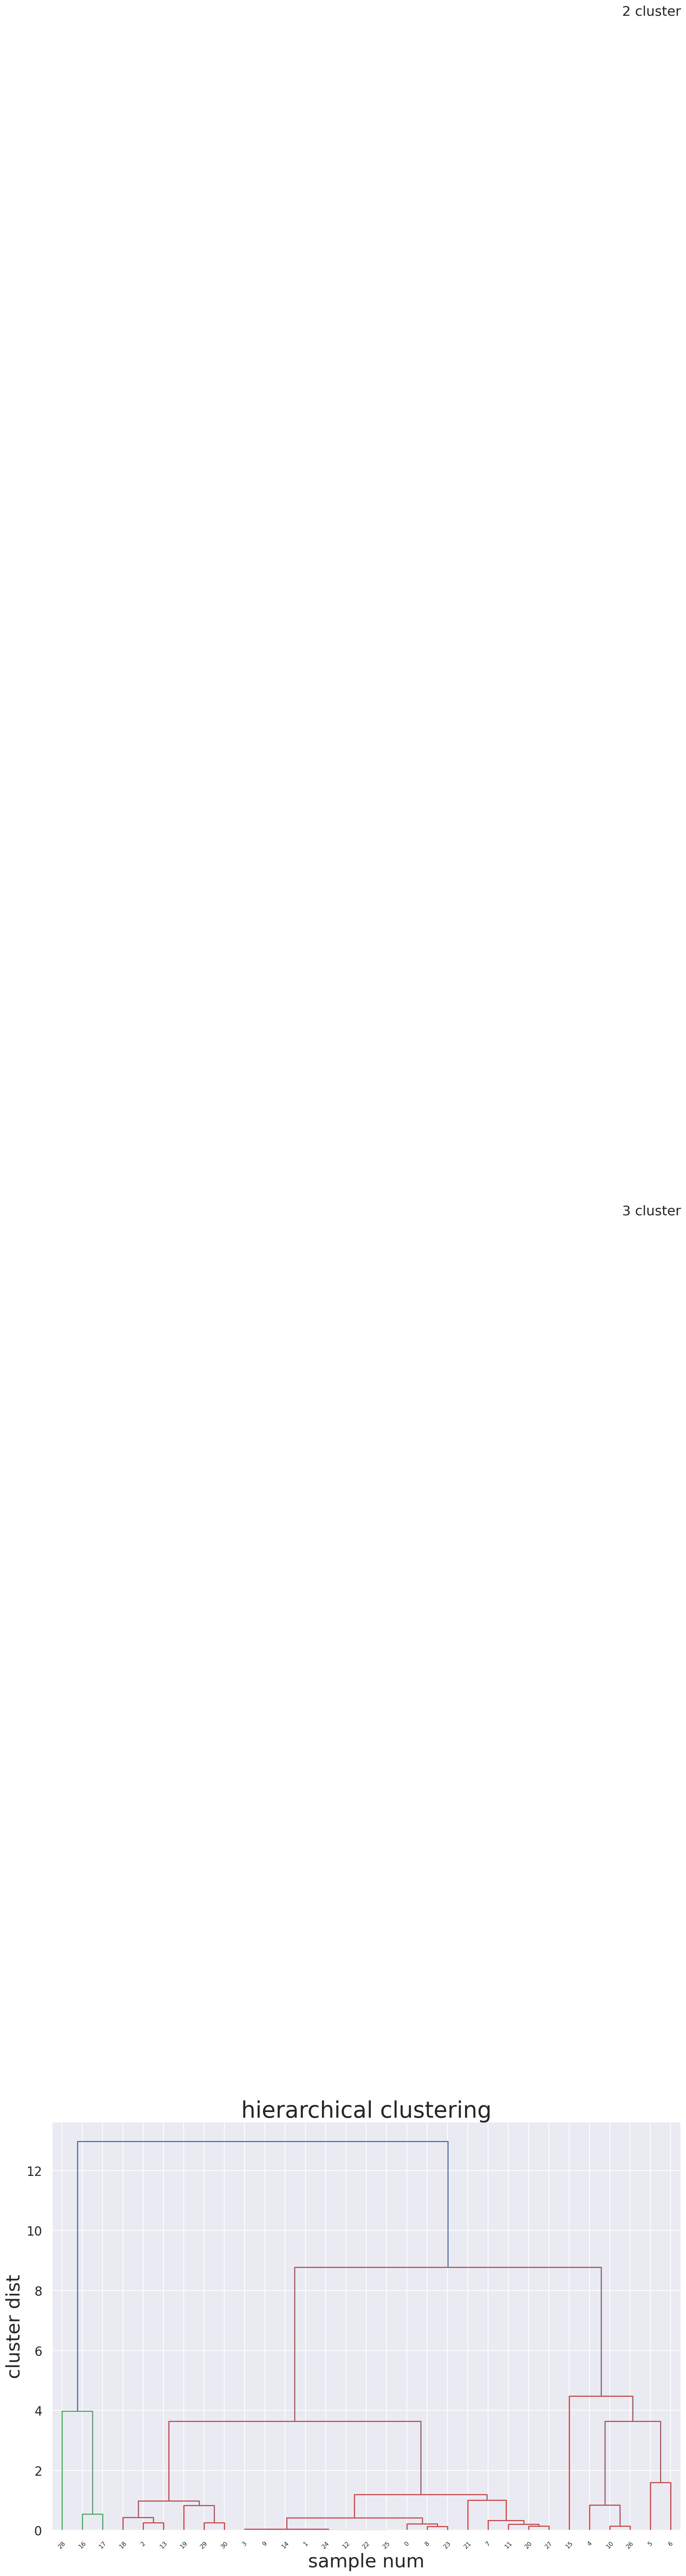

In [ ]:
dendrogram(linkage_pc);

# 두개와 세개의 클러스터를 구분하느 커트라인
plt.rcParams["figure.figsize"] = (15,10)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [80,80], '--', c='k', linewidth=4)
ax.plot(bounds, [40, 40], '--', c='k', linewidth=4)
ax.text(bounds[1], 84, '2 cluster', va='center',ha='right', fontsize=18)
ax.text(bounds[1], 44, '3 cluster', va='center',ha='right', fontsize=18)

plt.title("hierarchical clustering",fontsize=30)
plt.xlabel("sample num", fontdict={'size':25})
plt.ylabel("cluster dist", fontdict={'size':25})
plt.show()